# TCS i ON Rio 125 : Forecasting System Project
### Demand of Products at a Retail Outlet Based on Historical Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading dataset to python environment
data=pd.read_csv('sales train.csv')

In [3]:
# viewing dataset
data.head(10)

date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10
5  2013-01-06      1     1     12
6  2013-01-07      1     1     10
7  2013-01-08      1     1      9
8  2013-01-09      1     1     12
9  2013-01-10      1     1      9

In [4]:
data.tail(10)

date  store  item  sales
912990  2017-12-22     10    50     75
912991  2017-12-23     10    50     70
912992  2017-12-24     10    50     76
912993  2017-12-25     10    50     51
912994  2017-12-26     10    50     41
912995  2017-12-27     10    50     63
912996  2017-12-28     10    50     59
912997  2017-12-29     10    50     74
912998  2017-12-30     10    50     62
912999  2017-12-31     10    50     82

#### Basic analysis of dataset

In [5]:
# displaying the names of columns in dataset
data.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [6]:
# displaying the size
data.shape

(913000, 4)

In [7]:
# displaying basic information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [8]:
#checking null values
data.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

There are no null values in the dataset. It's a clean dataset

In [9]:
# checking for duplicates
data.duplicated().sum()

0

No duplicates in given dataset

In [10]:
# displaying the number of unique values in different columns
data.nunique()

date     1826
store      10
item       50
sales     213
dtype: int64

In [11]:
# basic statistical analysis of dataset
data.describe(include='all')

date          store           item          sales
count       913000  913000.000000  913000.000000  913000.000000
unique        1826            NaN            NaN            NaN
top     2013-01-01            NaN            NaN            NaN
freq           500            NaN            NaN            NaN
mean           NaN       5.500000      25.500000      52.250287
std            NaN       2.872283      14.430878      28.801144
min            NaN       1.000000       1.000000       0.000000
25%            NaN       3.000000      13.000000      30.000000
50%            NaN       5.500000      25.500000      47.000000
75%            NaN       8.000000      38.000000      70.000000
max            NaN      10.000000      50.000000     231.000000

From the results displayed above we can conclude that, in the given dataset there is sales data from 10 stores for 50 different items from 1st January 2013 to 31st December 2017 .

In [12]:
# converting the date column data type to data and time
data['date']=pd.to_datetime(data['date'])

In [13]:
# checking the dtype conversion
data.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [14]:
# creating a datframe that contains the sales details of a single store alone
store_1=data.loc[data['store']==1]
store_1.head()

date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
2 2013-01-03      1     1     14
3 2013-01-04      1     1     13
4 2013-01-05      1     1     10

In [15]:
# to find out the first and last  date
store_1['date'].min(),store_1['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [16]:
# dropping columns all except sales and date
cols=data.columns.drop(['sales','date'])
print(cols)
store_1.drop(cols,axis=1,inplace=True)
store_1.head()

Index(['store', 'item'], dtype='object')


date  sales
0 2013-01-01     13
1 2013-01-02     11
2 2013-01-03     14
3 2013-01-04     13
4 2013-01-05     10

In [17]:
# sorting by date
store_1=store_1.sort_values('date')
store_1

date  sales
0      2013-01-01     13
821700 2013-01-01     30
493020 2013-01-01     49
182600 2013-01-01     37
474760 2013-01-01     14
...           ...    ...
513105 2017-12-31     51
494845 2017-12-31     93
476585 2017-12-31     22
421805 2017-12-31     54
896565 2017-12-31     45

[91300 rows x 2 columns]

In [18]:
# Grouping the sales by  date
store_1=store_1.groupby(['date']).sum().reset_index()
store_1

date  sales
0    2013-01-01   1316
1    2013-01-02   1264
2    2013-01-03   1305
3    2013-01-04   1452
4    2013-01-05   1499
...         ...    ...
1821 2017-12-27   1837
1822 2017-12-28   1951
1823 2017-12-29   2116
1824 2017-12-30   2304
1825 2017-12-31   2388

[1826 rows x 2 columns]

In [19]:
# setting date as Index
store_1=store_1.set_index('date')
store_1.head

<bound method NDFrame.head of             sales
date             
2013-01-01   1316
2013-01-02   1264
2013-01-03   1305
2013-01-04   1452
2013-01-05   1499
...           ...
2017-12-27   1837
2017-12-28   1951
2017-12-29   2116
2017-12-30   2304
2017-12-31   2388

[1826 rows x 1 columns]>

### Vizualization


In [20]:
# finding the mean sales of each month and resampling
y=store_1['sales'].resample('MS').mean()
print(y['2016':])

date
2016-01-01    1759.967742
2016-02-01    1921.448276
2016-03-01    2308.548387
2016-04-01    2718.566667
2016-05-01    2887.161290
2016-06-01    3074.366667
2016-07-01    3323.451613
2016-08-01    2858.903226
2016-09-01    2714.800000
2016-10-01    2530.193548
2016-11-01    2685.933333
2016-12-01    1943.419355
2017-01-01    1809.225806
2017-02-01    2003.500000
2017-03-01    2388.290323
2017-04-01    2844.600000
2017-05-01    2975.741935
2017-06-01    3206.266667
2017-07-01    3425.387097
2017-08-01    2995.354839
2017-09-01    2825.300000
2017-10-01    2597.387097
2017-11-01    2816.666667
2017-12-01    2030.903226
Freq: MS, Name: sales, dtype: float64


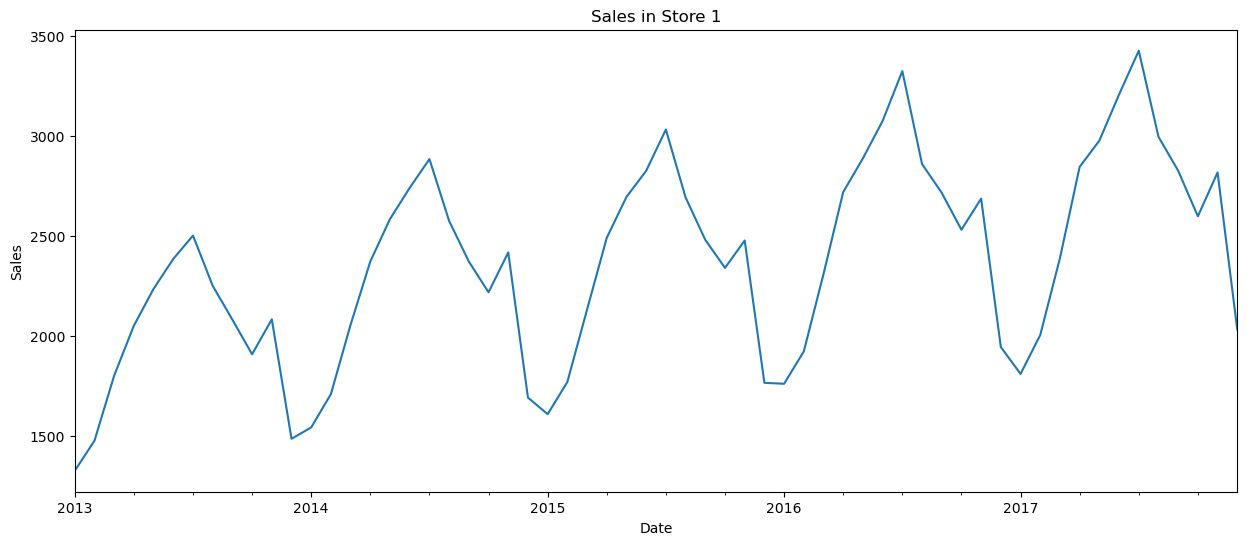

In [21]:
# plotting the results
y.plot(figsize=(15,6))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales in Store 1')
plt.show()

From the above graph it's clear that the sales increases in the first 6 months and then decreases towards the end of every year. After the first 6 months in each year the sales drops for next 3 months and then the sales increases in the first phase of last 3 months. The time series has seasonality. We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

In [22]:
# setting figure size
from pylab import rcParams
rcParams['figure.figsize'] = 18,8

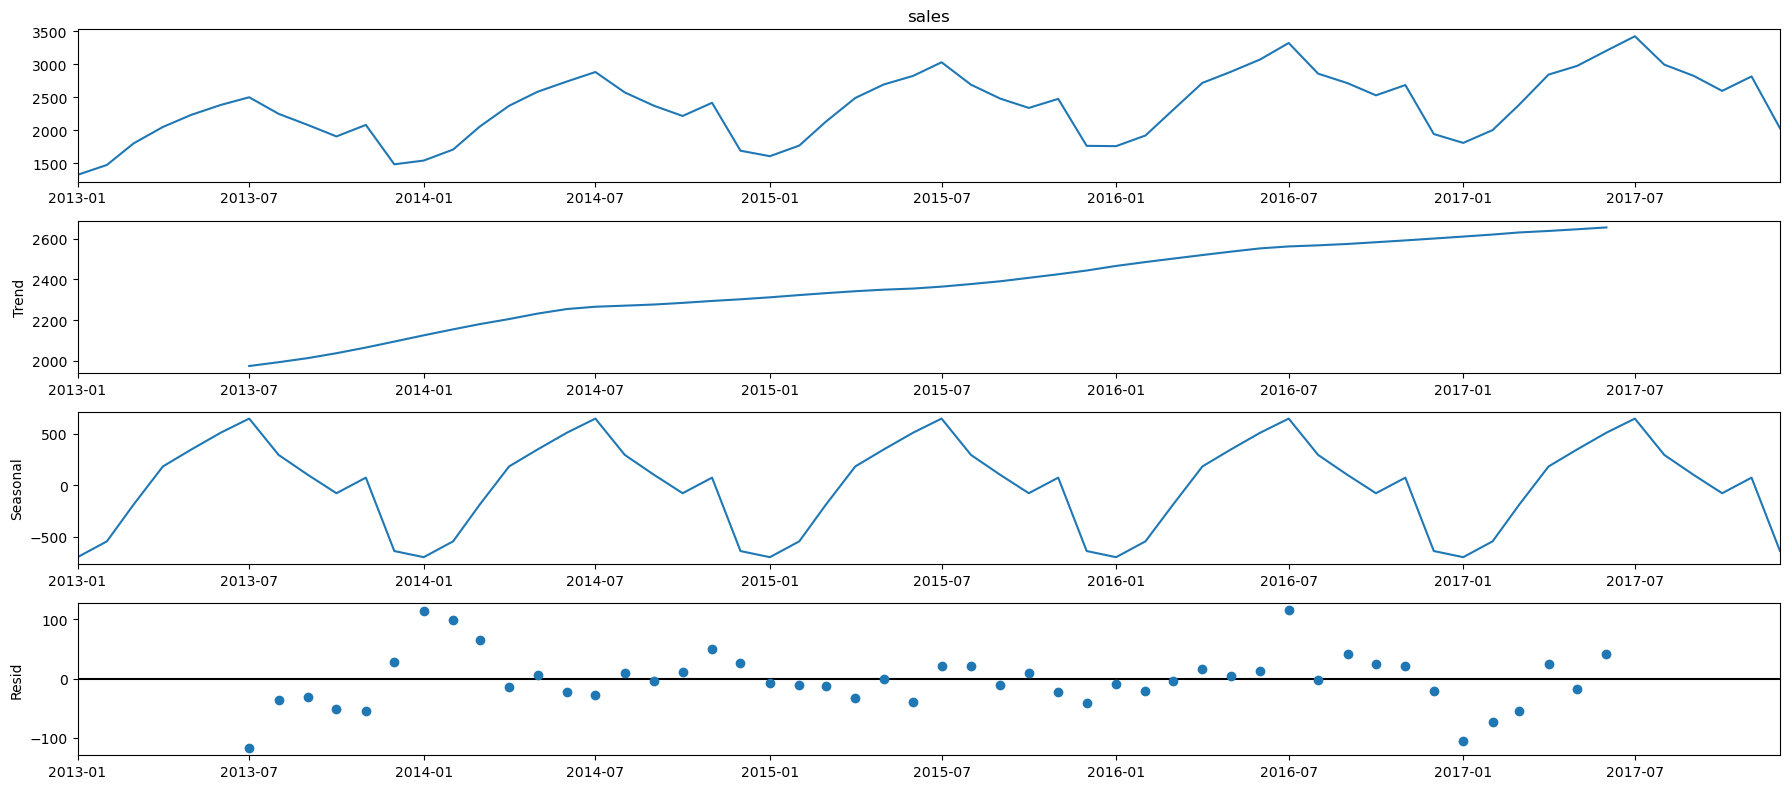

In [23]:
# to see the components of the time series
decomposition=sm.tsa.seasonal_decompose(y,model='additive')
fig=decomposition.plot()
plt.show()

From the above decomposition plot it's clear that there is seasonality in time series.

#### Test to check stationarity

To check whether the time series is stationary or not we can use : i) Rolling Statistics i)) Dickey Fuller test.

In [24]:
store_1 = pd.DataFrame({'date':y.index, 'store1_sales':y.values})
store_1.head()

date  store1_sales
0 2013-01-01   1325.064516
1 2013-02-01   1475.214286
2 2013-03-01   1800.870968
3 2013-04-01   2050.766667
4 2013-05-01   2234.580645

Above is the code for Dickey Fuller test. We can use this block of code to check whether the series is stationary or not for any series. In this project I choose another method to determine the value of d.

#### To determine the values of p and q

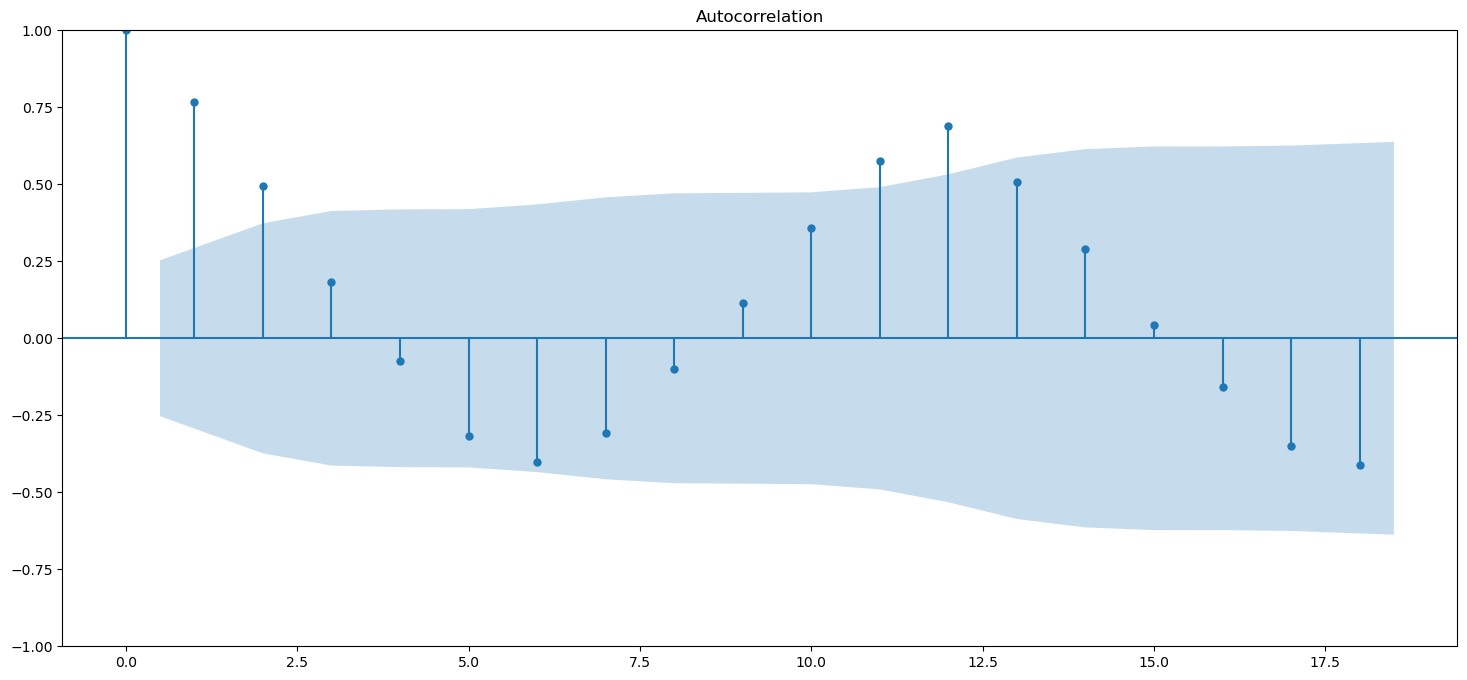

In [25]:
# Plotting Auto correlation function
acf=plot_acf(y.dropna());

From the Autocorrelation plot we can get the value for p

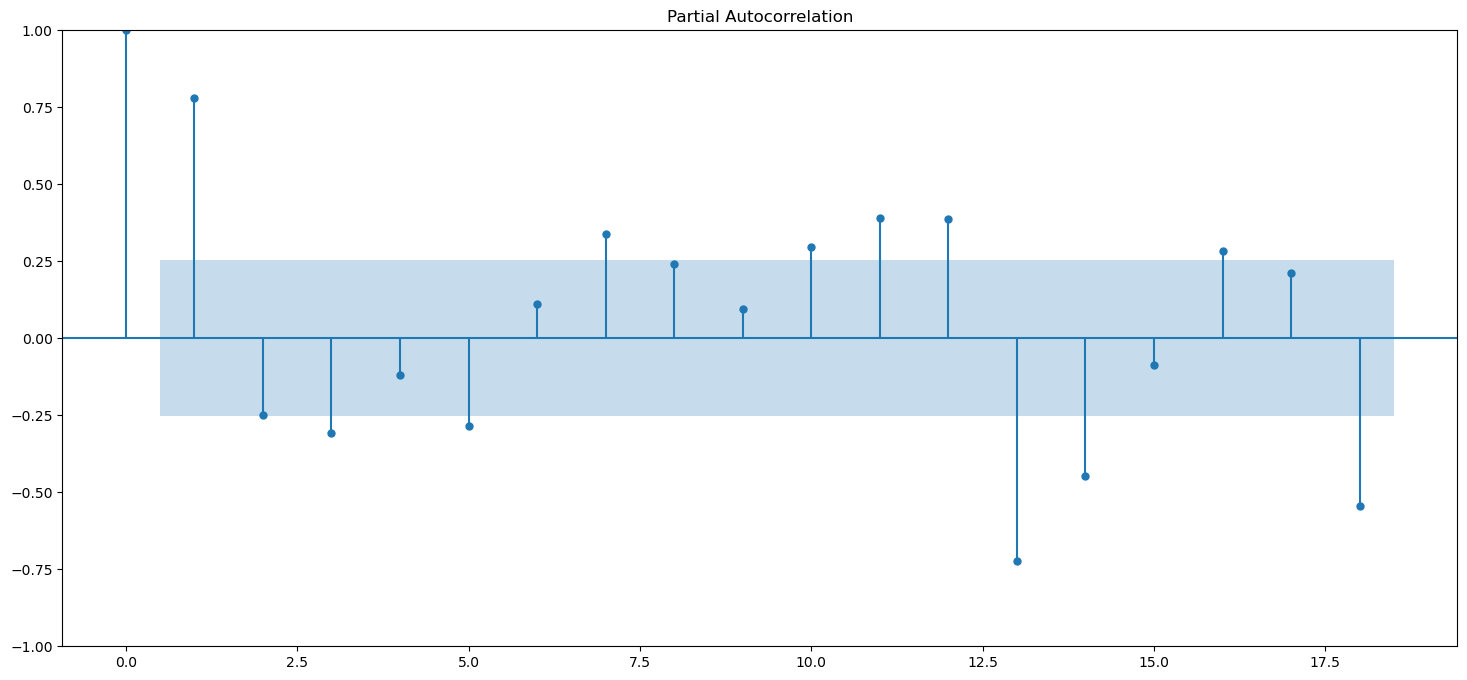

In [26]:
#Plotting Partial auto correlation function
pacf=plot_pacf(y.dropna())

From the Partial Autocorrelation function we can determine the value of q

### Time series forecasting using SARIMA

Here I am using SARIMA for time series forecasting, as the time series have seasonality. SARIMA stands for Seasonal Auto Regressive Integrated Moving Average. It's like ARIMA model but more powerful.

In [27]:
import itertools
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Examples for parameter combinations for Seasonal ARIMA :')
print('SARIMAX: {}x{}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {}x{}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {}x{}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {}x{}'.format(pdq[2],seasonal_pdq[4]))

Examples for parameter combinations for Seasonal ARIMA :
SARIMAX: (0, 0, 1)x(0, 0, 1, 12)
SARIMAX: (0, 0, 1)x(0, 1, 0, 12)
SARIMAX: (0, 1, 0)x(0, 1, 1, 12)
SARIMAX: (0, 1, 0)x(1, 0, 0, 12)


### Compare the time series of all stores

In [28]:
# Displaying the unique values in Store column
i=data['store'].unique()
print("Unique values in stores  column are: ",i)


Unique values in stores  column are:  [ 1  2  3  4  5  6  7  8  9 10]


In [29]:
# creating a datframe that contains the sales details of  store 1  to store 10

store_1=data.loc[data['store']==1]
print(store_1.head())
print(store_1.shape)

store_2=data.loc[data['store']==2]
print(store_2.head())
print(store_2.shape)

store_3=data.loc[data['store']==3]
print(store_3.head())
print(store_3.shape)

store_4=data.loc[data['store']==4]
print(store_4.head())
print(store_4.shape)

store_5=data.loc[data['store']==5]
print(store_5.head())
print(store_5.shape)

store_6=data.loc[data['store']==6]
print(store_6.head())
print(store_6.shape)


store_7=data.loc[data['store']==7]
print(store_7.head())
print(store_7.shape)


store_8=data.loc[data['store']==8]
print(store_8.head())
print(store_8.shape)


store_9=data.loc[data['store']==9]
print(store_9.head())
print(store_9.shape)


store_10=data.loc[data['store']==10]
print(store_10.head())
print(store_10.shape)

        date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
2 2013-01-03      1     1     14
3 2013-01-04      1     1     13
4 2013-01-05      1     1     10
(91300, 4)
           date  store  item  sales
1826 2013-01-01      2     1     12
1827 2013-01-02      2     1     16
1828 2013-01-03      2     1     16
1829 2013-01-04      2     1     20
1830 2013-01-05      2     1     16
(91300, 4)
           date  store  item  sales
3652 2013-01-01      3     1     19
3653 2013-01-02      3     1      8
3654 2013-01-03      3     1     10
3655 2013-01-04      3     1     15
3656 2013-01-05      3     1     22
(91300, 4)
           date  store  item  sales
5478 2013-01-01      4     1     10
5479 2013-01-02      4     1     12
5480 2013-01-03      4     1      8
5481 2013-01-04      4     1     15
5482 2013-01-05      4     1     19
(91300, 4)
           date  store  item  sales
7304 2013-01-01      5     1     11
7305 2013-01-02      5     1      9
73

In [30]:
# dropping columns all except sales and date
cols=data.columns.drop(['sales','date'])

store_1.drop(cols,axis=1,inplace=True)
print(store_1.head())

store_2.drop(cols,axis=1,inplace=True)
print(store_2.head())

store_3.drop(cols,axis=1,inplace=True)
print(store_3.head())

store_4.drop(cols,axis=1,inplace=True)
print(store_4.head())

store_5.drop(cols,axis=1,inplace=True)
print(store_5.head())

store_6.drop(cols,axis=1,inplace=True)
print(store_6.head())

store_7.drop(cols,axis=1,inplace=True)
print(store_7.head())

store_8.drop(cols,axis=1,inplace=True)
print(store_8.head())

store_9.drop(cols,axis=1,inplace=True)
print(store_9.head())

store_10.drop(cols,axis=1,inplace=True)
print(store_10.head())

        date  sales
0 2013-01-01     13
1 2013-01-02     11
2 2013-01-03     14
3 2013-01-04     13
4 2013-01-05     10
           date  sales
1826 2013-01-01     12
1827 2013-01-02     16
1828 2013-01-03     16
1829 2013-01-04     20
1830 2013-01-05     16
           date  sales
3652 2013-01-01     19
3653 2013-01-02      8
3654 2013-01-03     10
3655 2013-01-04     15
3656 2013-01-05     22
           date  sales
5478 2013-01-01     10
5479 2013-01-02     12
5480 2013-01-03      8
5481 2013-01-04     15
5482 2013-01-05     19
           date  sales
7304 2013-01-01     11
7305 2013-01-02      9
7306 2013-01-03     12
7307 2013-01-04      8
7308 2013-01-05     13
           date  sales
9130 2013-01-01     20
9131 2013-01-02      6
9132 2013-01-03     11
9133 2013-01-04      7
9134 2013-01-05     12
            date  sales
10956 2013-01-01      7
10957 2013-01-02      4
10958 2013-01-03      8
10959 2013-01-04      7
10960 2013-01-05      8
            date  sales
12782 2013-01-01     1

In [31]:
# Sorting the values, grouping them with respect to date,resampling and saving the entire sales data of all stores in one dataframe
store_1= store_1.sort_values('date')
store_2= store_2.sort_values('date')
store_3= store_3.sort_values('date')
store_4= store_4.sort_values('date')
store_5= store_5.sort_values('date')
store_6= store_6.sort_values('date')
store_7= store_7.sort_values('date')
store_8= store_8.sort_values('date')
store_9= store_9.sort_values('date')
store_10= store_10.sort_values('date')

store_1= store_1.groupby('date')['sales'].sum().reset_index()
store_2= store_2.groupby('date')['sales'].sum().reset_index()
store_3= store_3.groupby('date')['sales'].sum().reset_index()
store_4= store_4.groupby('date')['sales'].sum().reset_index()
store_5= store_5.groupby('date')['sales'].sum().reset_index()
store_6= store_6.groupby('date')['sales'].sum().reset_index()
store_7= store_7.groupby('date')['sales'].sum().reset_index()
store_8= store_8.groupby('date')['sales'].sum().reset_index()
store_9= store_9.groupby('date')['sales'].sum().reset_index()
store_10= store_10.groupby('date')['sales'].sum().reset_index()

store_1 = store_1.set_index('date')
store_2 = store_2.set_index('date')
store_3 = store_3.set_index('date')
store_4 = store_4.set_index('date')
store_5 = store_5.set_index('date')
store_6 = store_6.set_index('date')
store_7 = store_7.set_index('date')
store_8 = store_8.set_index('date')
store_9 = store_9.set_index('date')
store_10 = store_10.set_index('date')

y_s1 = store_1['sales'].resample('MS').mean()
y_s2 = store_2['sales'].resample('MS').mean()
y_s3 = store_3['sales'].resample('MS').mean()
y_s4 = store_4['sales'].resample('MS').mean()
y_s5 = store_5['sales'].resample('MS').mean()
y_s6 = store_6['sales'].resample('MS').mean()
y_s7 = store_7['sales'].resample('MS').mean()
y_s8 = store_8['sales'].resample('MS').mean()
y_s9 = store_9['sales'].resample('MS').mean()
y_s10 = store_10['sales'].resample('MS').mean()

store_1 = pd.DataFrame({'date':y_s1.index, 'store1_sales':y_s1.values})
store_2 = pd.DataFrame({'date': y_s2.index,'store2_sales': y_s2.values})
store_3 = pd.DataFrame({'date':y_s3.index, 'store3_sales':y_s3.values})
store_4 = pd.DataFrame({'date': y_s4.index,'store4_sales': y_s4.values})
store_5 = pd.DataFrame({'date':y_s5.index, 'store5_sales':y_s5.values})
store_6 = pd.DataFrame({'date': y_s6.index,'store6_sales': y_s6.values})
store_7 = pd.DataFrame({'date':y_s7.index, 'store7_sales':y_s7.values})
store_8 = pd.DataFrame({'date': y_s8.index,'store8_sales': y_s8.values})
store_9 = pd.DataFrame({'date':y_s9.index, 'store9_sales':y_s9.values})
store_10 = pd.DataFrame({'date': y_s10.index,'store10_sales': y_s10.values})

store = store_1.merge(store_2, how='inner', on='date').merge(store_3,how='inner',on='date').merge(store_4,how='inner',on='date').merge(store_5,how='inner',on='date').merge(store_6,how='inner',on='date').merge(store_7,how='inner',on='date').merge(store_8,how='inner',on='date').merge(store_9,how='inner',on='date').merge(store_10,how='inner',on='date')
store.head()

date  store1_sales  store2_sales  store3_sales  store4_sales  \
0 2013-01-01   1325.064516   1887.741935   1676.516129   1539.354839   
1 2013-02-01   1475.214286   2120.857143   1860.035714   1743.071429   
2 2013-03-01   1800.870968   2568.032258   2260.290323   2081.354839   
3 2013-04-01   2050.766667   2932.900000   2592.233333   2393.366667   
4 2013-05-01   2234.580645   3172.935484   2795.612903   2596.354839   

   store5_sales  store6_sales  store7_sales  store8_sales  store9_sales  \
0   1109.838710   1127.225806   1016.387097   1807.838710   1536.129032   
1   1247.071429   1243.142857   1143.607143   2009.964286   1721.071429   
2   1518.774194   1523.032258   1384.903226   2448.032258   2096.419355   
3   1731.466667   1721.566667   1582.133333   2785.600000   2392.733333   
4   1864.322581   1862.322581   1705.677419   3024.290323   2583.645161   

   store10_sales  
0    1648.225806  
1    1843.714286  
2    2233.838710  
3    2559.700000  
4    2780.967742

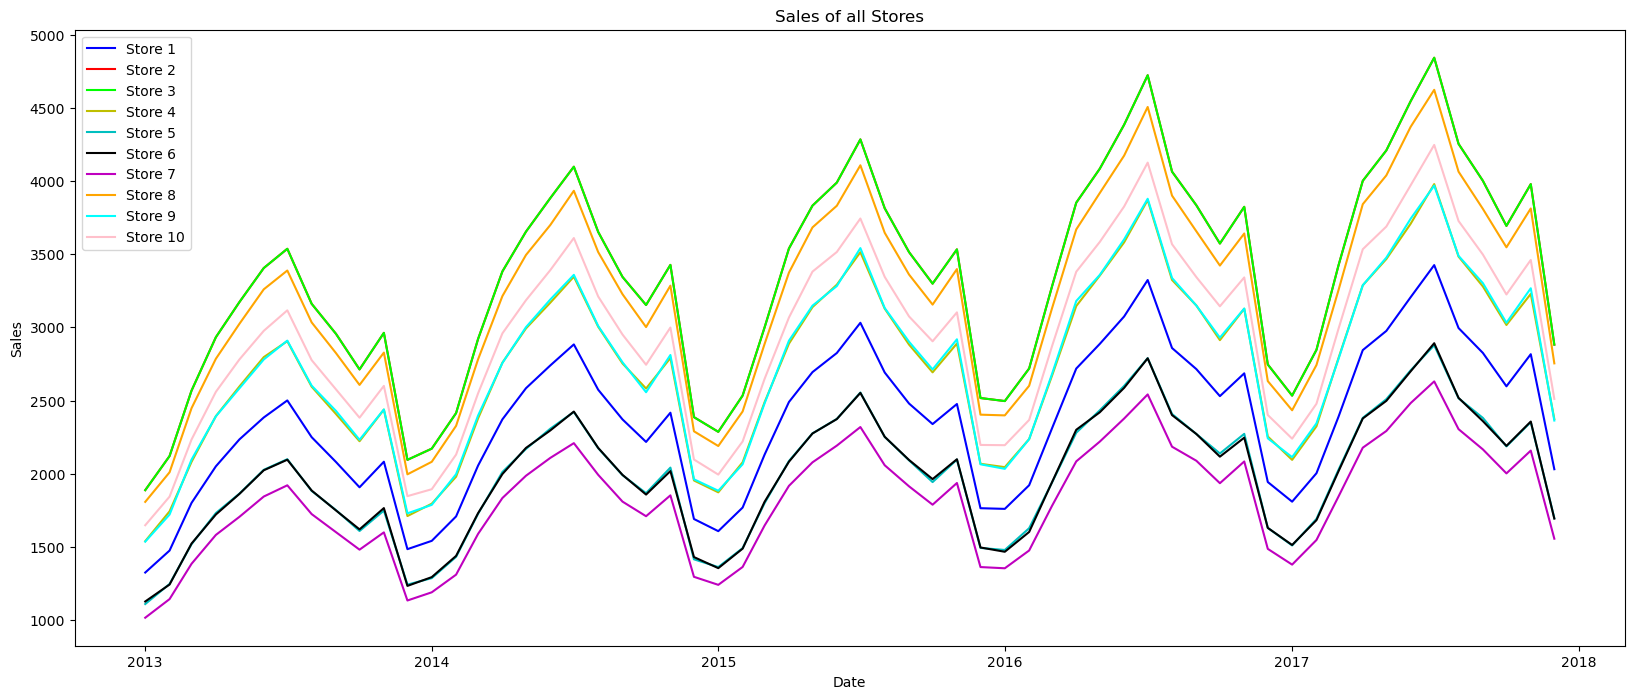

In [32]:
# plotting the Sales data of all stores
plt.figure(figsize=(20, 8))
plt.plot(store['date'], store['store1_sales'], 'b-', label = 'Store 1')
plt.plot(store['date'], store['store2_sales'], 'r-', label = 'Store 2')
plt.plot(store['date'], store['store2_sales'], 'lime', label = 'Store 3')
plt.plot(store['date'], store['store4_sales'], 'y-', label = 'Store 4')
plt.plot(store['date'], store['store5_sales'], 'c-', label = 'Store 5')
plt.plot(store['date'], store['store6_sales'], 'k-', label = 'Store 6')
plt.plot(store['date'], store['store7_sales'], 'm', label = 'Store 7')
plt.plot(store['date'], store['store8_sales'], 'orange', label = 'Store 8')
plt.plot(store['date'], store['store9_sales'], 'aqua', label = 'Store 9')
plt.plot(store['date'], store['store10_sales'], 'pink', label = 'Store 10')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of all Stores')
plt.legend();

From the above plot it's clear that every store shows a similar pattern in sales. Store 3 have highest sales compared to rest. Store 7 shows the lowest sales.

#### Store 1 Model

In [33]:
y_s1=y
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_s1 = sm.tsa.statespace.SARIMAX(y_s1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results_s1 = mod_s1.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_s1.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1089.194705033009
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:821.0328317843254
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:631.7347785214846
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1357.7974771017457
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:582.6356883259803
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:557.6115265303766
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:436.59540262462673
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1176.9964725518546
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1005.2997669912701
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:756.7305190689732
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:566.7733423426503
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1390.2027948140542
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:548.1136625346844
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:522.6463111860361
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:414.65968992868846
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1093.2494687653896
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:833.2719769967964
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:630.415928331845
ARIM

361.58 is the observed minimum value

In [34]:
# fitting ARIMA model
mod_s1=sm.tsa.statespace.SARIMAX(y_s1,
                              order=(1,1,0),
                              seasonal_order=(1,1,0,12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
results_s1=mod_s1.fit()
print(results_s1.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4273      0.210     -2.039      0.041      -0.838      -0.017
ar.S.L12      -0.1441      0.122     -1.178      0.239      -0.384       0.096
sigma2      2039.8123    454.742      4.486      0.000    1148.535    2931.090


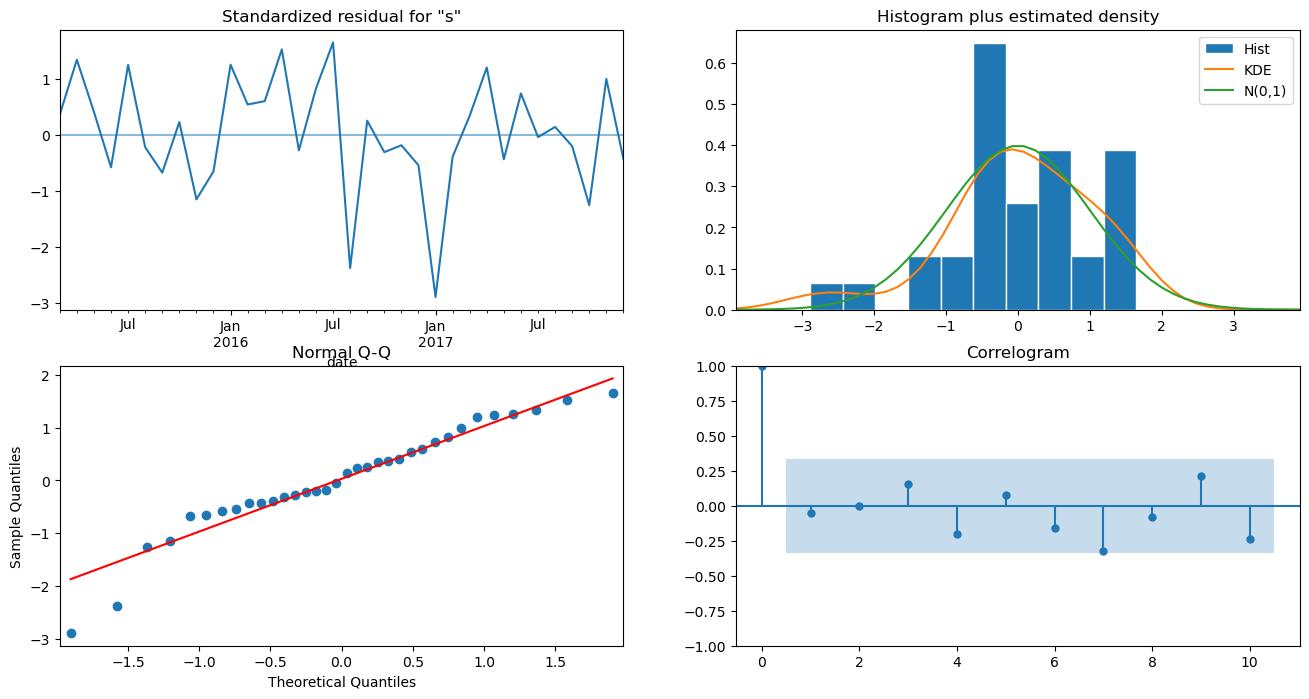

In [35]:
# plotting results
results_s1.plot_diagnostics(figsize=(16,8))
plt.show()

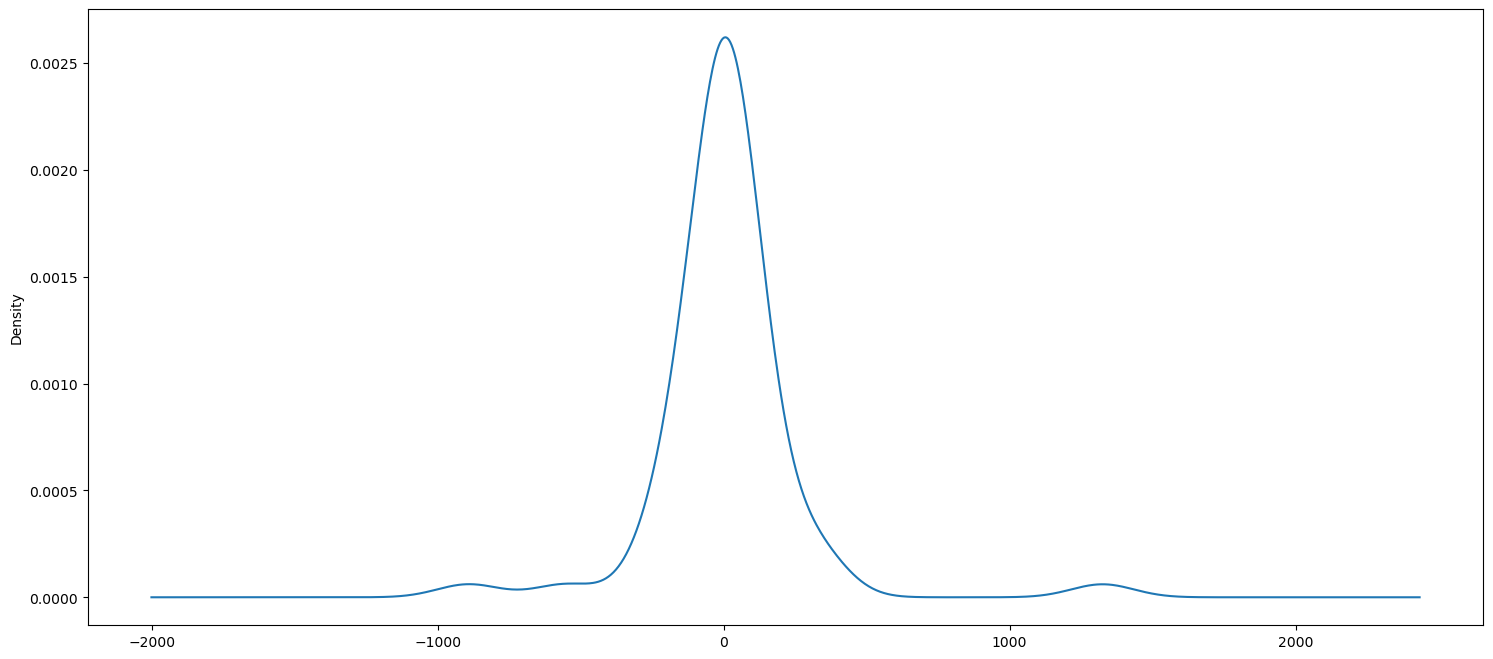

In [36]:
# density plot of AR residuals
results_s1.resid.plot(kind='kde');

The normal distribution indicates that the performance of model is good.

#### Validating Forecasts for Store 1

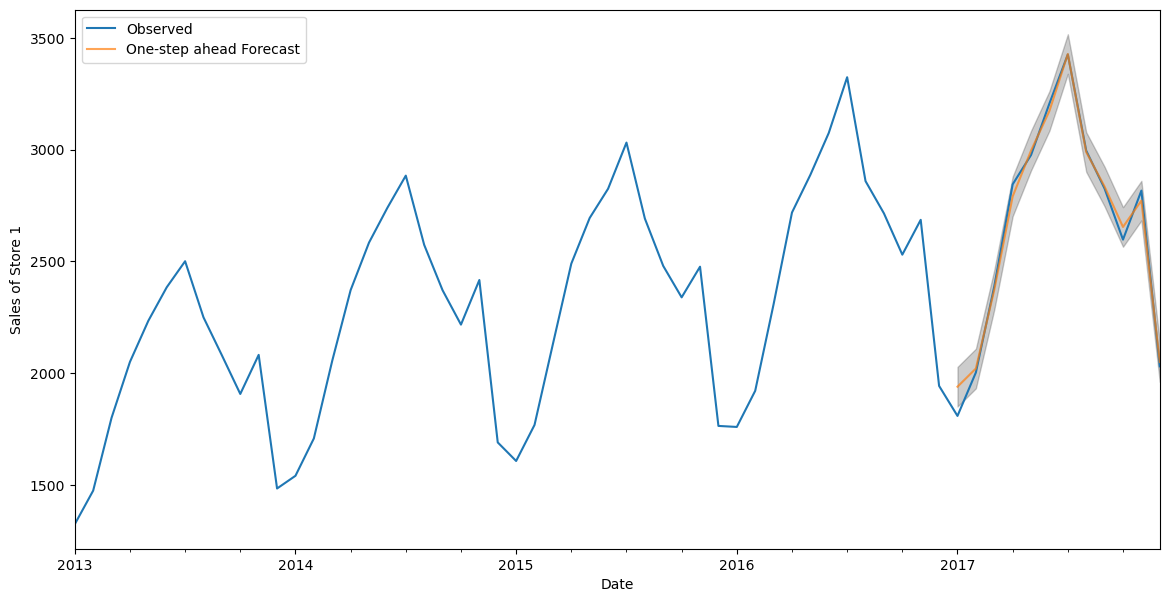

In [37]:
pred_s1 = results_s1.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci_s1 = pred_s1.conf_int()

ax = y_s1['2013':].plot(label='Observed')
pred_s1.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci_s1.index,
                pred_ci_s1.iloc[:, 0],
                pred_ci_s1.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales of Store 1')
plt.legend()

plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions

In [38]:
y_forecasted_s1 = pred_s1.predicted_mean
y_truth_s1 = y_s1['2017-01-01':]

mse_s1 = ((y_forecasted_s1 - y_truth_s1) ** 2).mean()
print('The Mean Squared Error of our forecasts is : {}'.format(round(mse_s1, 2)))
print('The Root Mean Squared Error of our forecasts : is {}'.format(round(np.sqrt(mse_s1), 2)))

The Mean Squared Error of our forecasts is : 2312.59
The Root Mean Squared Error of our forecasts : is 48.09


#### Producing and visualizing forecasts for store 1

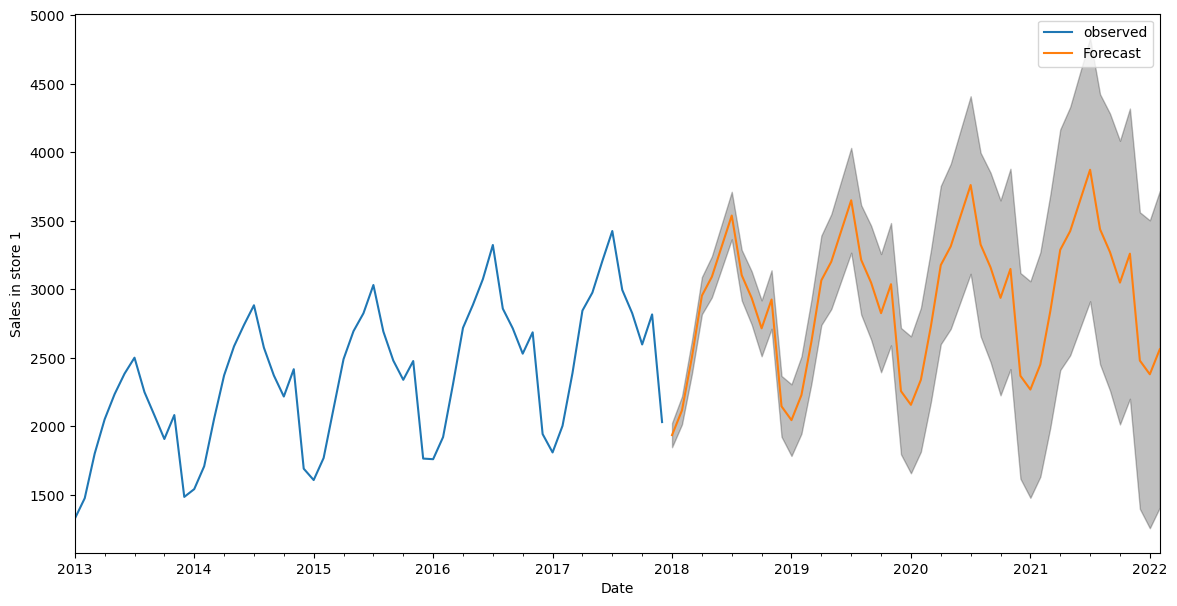

In [39]:
pred_uc_s1 = results_s1.get_forecast(steps=50)
pred_ci_s1 = pred_uc_s1.conf_int()

ax = y_s1.plot(label='observed', figsize=(14, 7))
pred_uc_s1.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_s1.index,
                pred_ci_s1.iloc[:, 0],
                pred_ci_s1.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales in store 1')

plt.legend()
plt.show()

#### Store 2 Model

In [40]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_s2 = sm.tsa.statespace.SARIMAX(y_s2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results_s2 = mod_s2.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_s2.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1130.4048230238648
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:853.1829785120727
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:663.8691160423692
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1394.5808192086336
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:615.6736953269744
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:593.2983220686262
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:462.56930668727784
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:438.43523389340817
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1073.031957469829
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:788.0545369969437
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:598.7065519615393
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1446.193032178162
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:579.7111624533284
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:554.669797607475
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:439.4513276745254
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:407.4612956185975
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:874.0649644002665
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:661.806697576259
ARIMA(0,

386.86 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5946      0.114      5.200      0.000       0.370       0.819
ma.L1         -1.0000      0.206     -4.843      0.000      -1.405      -0.595
ar.S.L12      -0.2134      0.120     -1.782      0.075      -0.448       0.021
sigma2      3843.7648   5.37e-05   7.16e+07      0.000    3843.765    3843.765


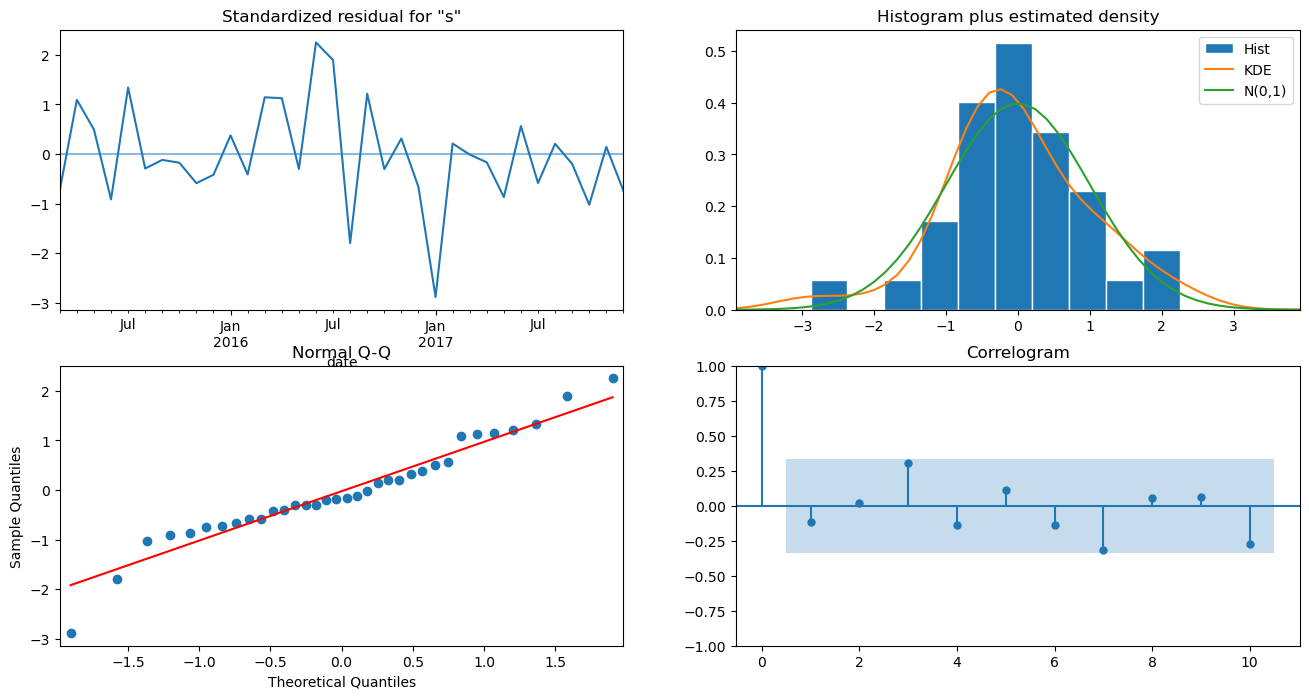

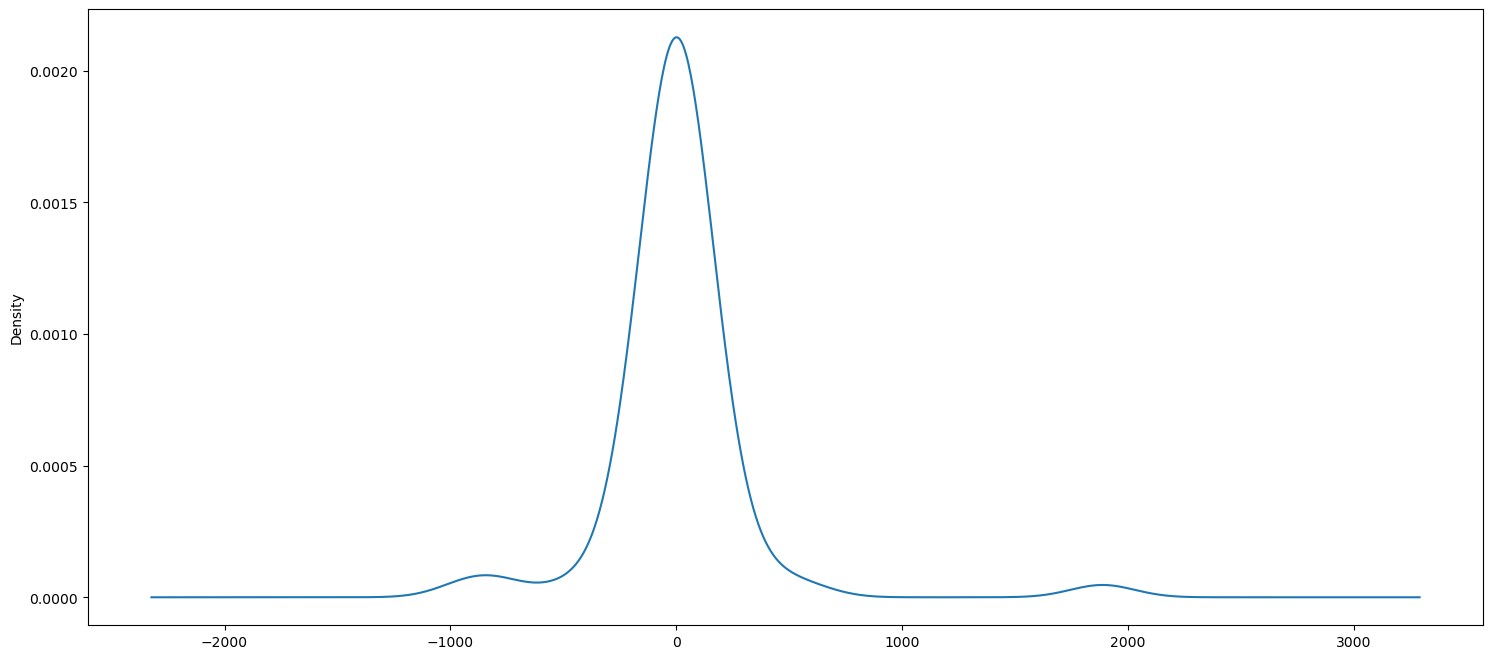

In [41]:
# fitting ARIMA model
mod_s2=sm.tsa.statespace.SARIMAX(y_s2,
                              order=(1,1,1),
                              seasonal_order=(1,1,0,12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
results_s2=mod_s2.fit()
print(results_s2.summary().tables[1])

# plotting results
results_s2.plot_diagnostics(figsize=(16,8))
plt.show()

# density plot of AR residuals
results_s2.resid.plot(kind='kde');

#### Validating forecasts for store 2

Forecasts for store 2


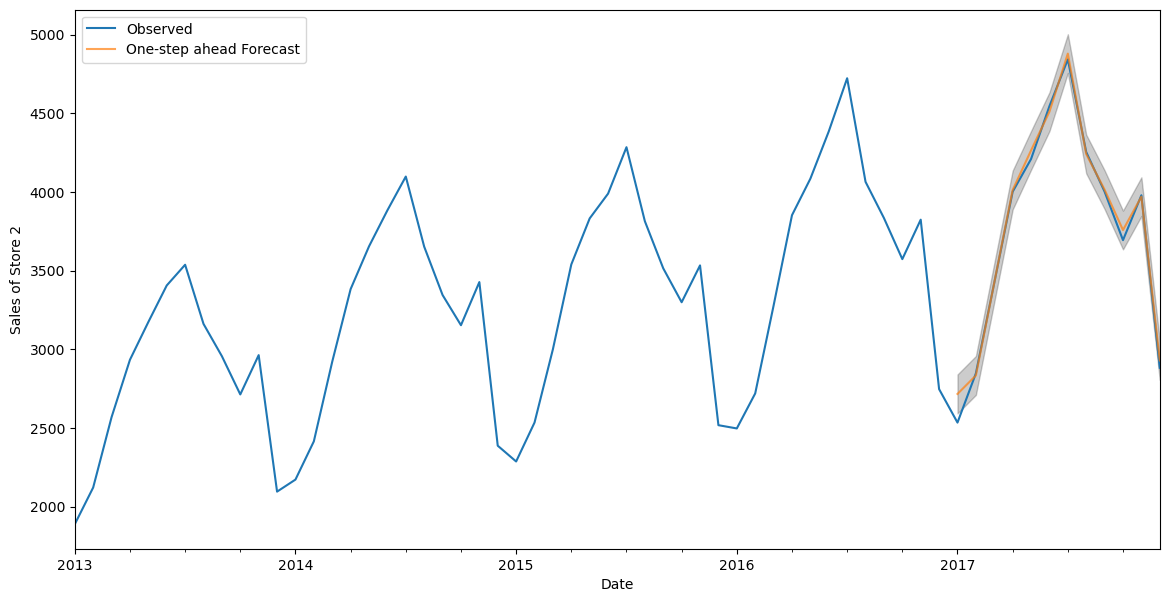

In [42]:
print("Forecasts for store 2")
pred_s2 = results_s2.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci_s2 = pred_s2.conf_int()

ax = y_s2['2013':].plot(label='Observed')
pred_s2.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci_s2.index,
                pred_ci_s2.iloc[:, 0],
                pred_ci_s2.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales of Store 2')
plt.legend()

plt.show()

In [43]:
y_forecasted_s2 = pred_s2.predicted_mean
y_truth_s2 = y_s2['2017-01-01':]

mse_s2 = ((y_forecasted_s2- y_truth_s2) ** 2).mean()
print('The Mean Squared Error of our forecasts is : {}'.format(round(mse_s2, 2)))
print('The Root Mean Squared Error of our forecasts : is {}'.format(round(np.sqrt(mse_s2), 2)))

The Mean Squared Error of our forecasts is : 3813.89
The Root Mean Squared Error of our forecasts : is 61.76


#### Producing and visualizing forecasts for store 2

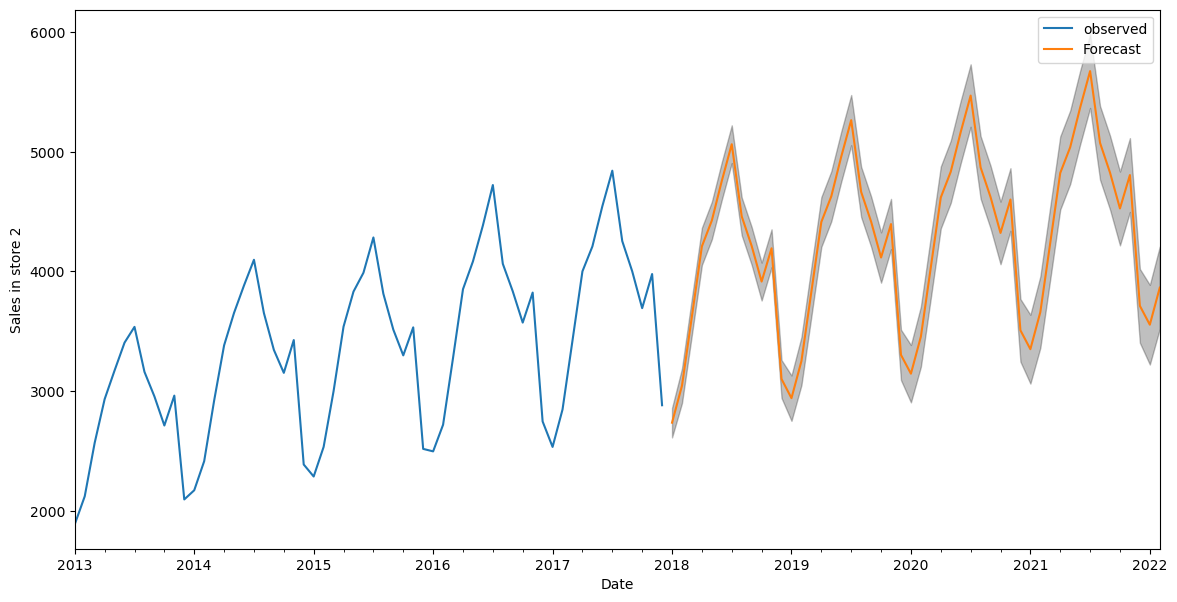

In [44]:
pred_uc_s2= results_s2.get_forecast(steps=50)
pred_ci_s2= pred_uc_s2.conf_int()

ax = y_s2.plot(label='observed', figsize=(14, 7))
pred_uc_s2.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_s2.index,
                pred_ci_s2.iloc[:, 0],
                pred_ci_s2.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales in store 2')

plt.legend()
plt.show()

#### Store 3 Model

In [45]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_s3 = sm.tsa.statespace.SARIMAX(y_s3,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results_s3 = mod_s3.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_s3.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1116.408015191234
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:842.0554670630203
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:653.4898349924689
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1497.23546488305
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:604.2278436347885
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:581.2596687913876
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:452.17999186700393
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:428.32625709641496
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1059.36942865266
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:777.7065625995975
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:590.1103575808523
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1328.3306829169396
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:564.9449237220203
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:540.642273968706
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:426.99654363620124
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:395.5088673826919
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:859.9627483797933
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:650.6184938037131
ARIMA(0, 

369.85

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3991      0.170     -2.350      0.019      -0.732      -0.066
ar.S.L12      -0.0865      0.135     -0.643      0.520      -0.350       0.177
sigma2      2601.3817    613.629      4.239      0.000    1398.690    3804.073


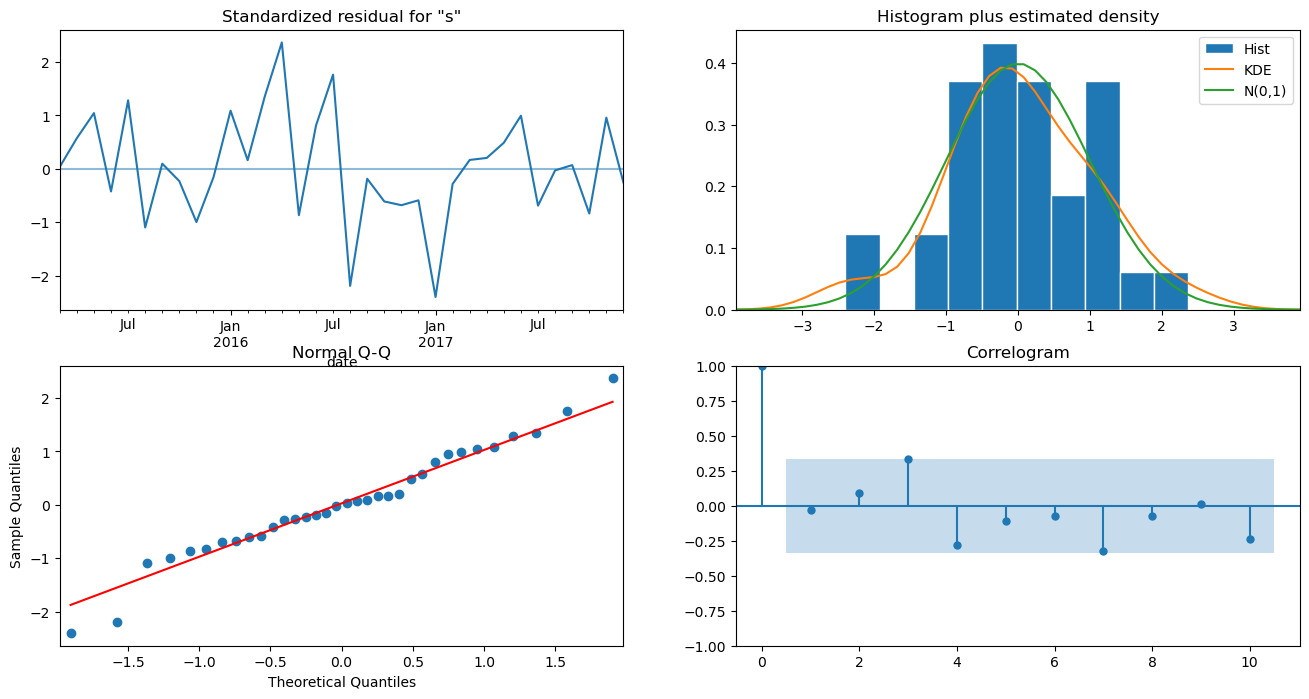

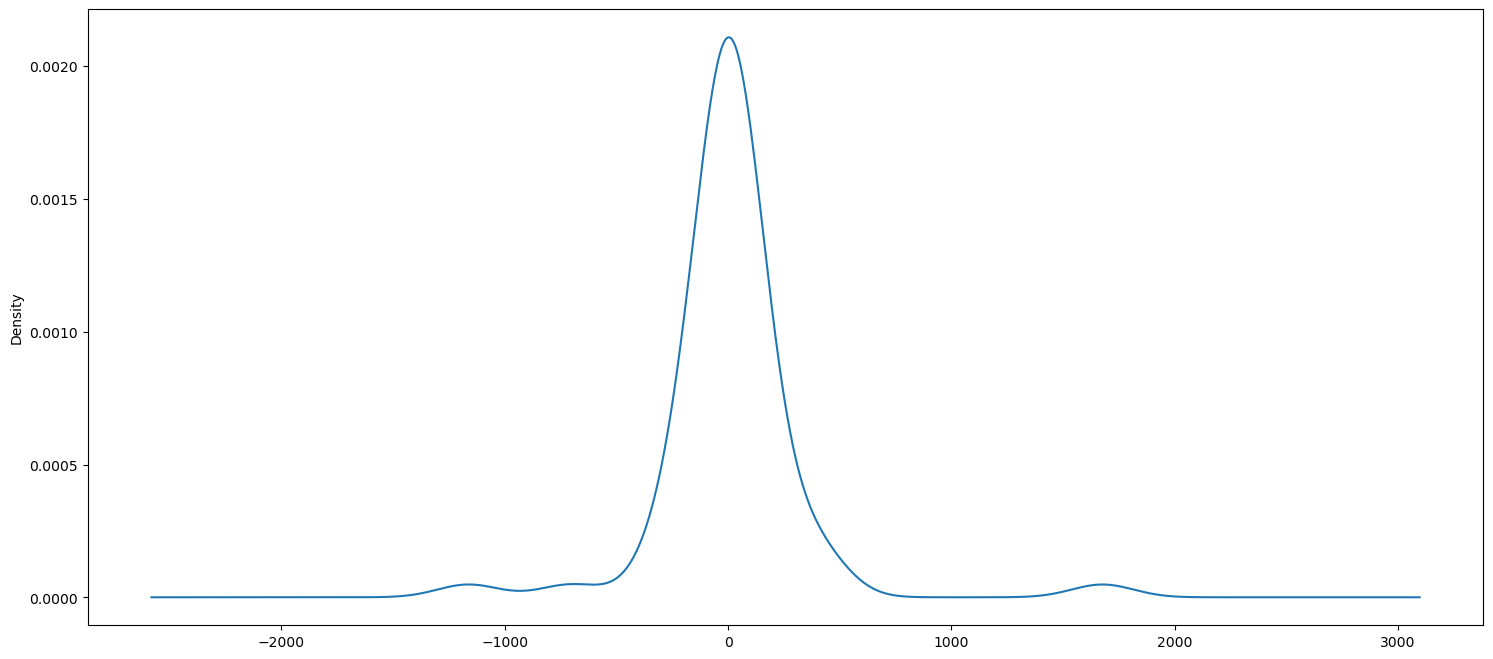

In [46]:
# fitting ARIMA model
mod_s3=sm.tsa.statespace.SARIMAX(y_s3,
                              order=(1,1,0),
                              seasonal_order=(1,1,0,12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
results_s3=mod_s3.fit()
print(results_s3.summary().tables[1])

# plotting results
results_s3.plot_diagnostics(figsize=(16,8))
plt.show()

# density plot of AR residuals
results_s3.resid.plot(kind='kde');

#### Validating forecasts for store 3

Forecasts for store 3


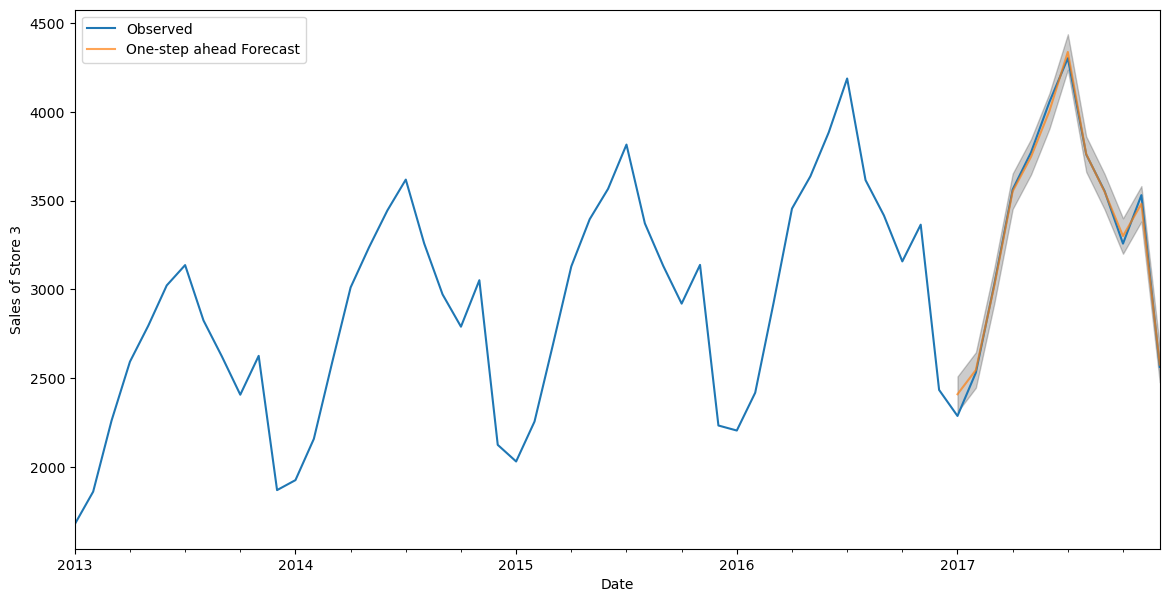

In [47]:
print("Forecasts for store 3")
pred_s3 = results_s3.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci_s3 = pred_s3.conf_int()

ax = y_s3['2013':].plot(label='Observed')
pred_s3.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci_s3.index,
                pred_ci_s3.iloc[:, 0],
                pred_ci_s3.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales of Store 3')
plt.legend()

plt.show()

In [48]:
y_forecasted_s3 = pred_s3.predicted_mean
y_truth_s3 = y_s3['2017-01-01':]

mse_s3 = ((y_forecasted_s3- y_truth_s3) ** 2).mean()
print('The Mean Squared Error of our forecasts is : {}'.format(round(mse_s3, 2)))
print('The Root Mean Squared Error of our forecasts : is {}'.format(round(np.sqrt(mse_s3), 2)))

The Mean Squared Error of our forecasts is : 2015.81
The Root Mean Squared Error of our forecasts : is 44.9


#### Producing and visualizing forecasts for store 3

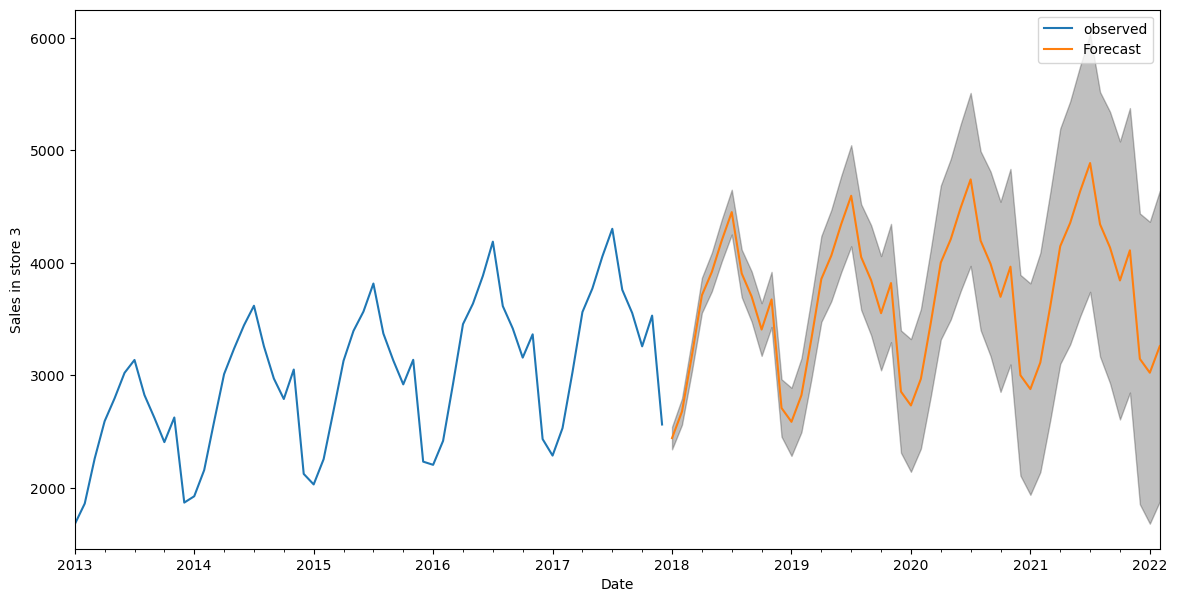

In [49]:
pred_uc_s3= results_s3.get_forecast(steps=50)
pred_ci_s3= pred_uc_s3.conf_int()

ax = y_s3.plot(label='observed', figsize=(14, 7))
pred_uc_s3.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_s3.index,
                pred_ci_s3.iloc[:, 0],
                pred_ci_s3.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales in store 3')

plt.legend()
plt.show()

#### Store 4 model

In [50]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_s4 = sm.tsa.statespace.SARIMAX(y_s4,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results_s4 = mod_s4.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_s4.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1106.847159277735
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:834.6017538881136
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:644.2158117290752
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1445.2256498382926
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:593.5378654425425
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:570.9103828684061
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:442.84610201732596
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1418.0270847626375
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1022.8663554330053
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:777.1713290240186
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:580.6385225645946
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1205.2752952873134
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:558.1491639579788
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:541.7539409532427
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:420.7298145315086
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1194.3916960441347
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:849.9740386612613
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:642.4453457012273
ARIM

366.77

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3244      0.162     -2.003      0.045      -0.642      -0.007
ar.S.L12      -0.0903      0.158     -0.571      0.568      -0.400       0.220
sigma2      2376.0311    392.118      6.059      0.000    1607.495    3144.567


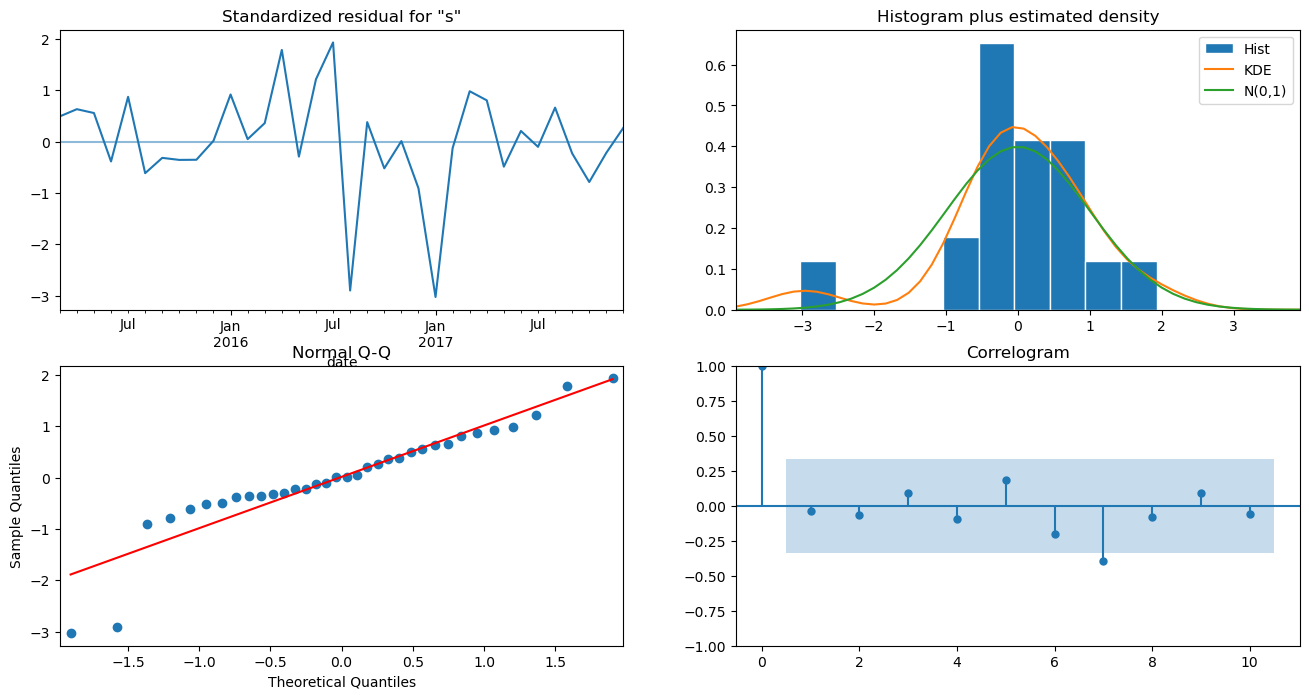

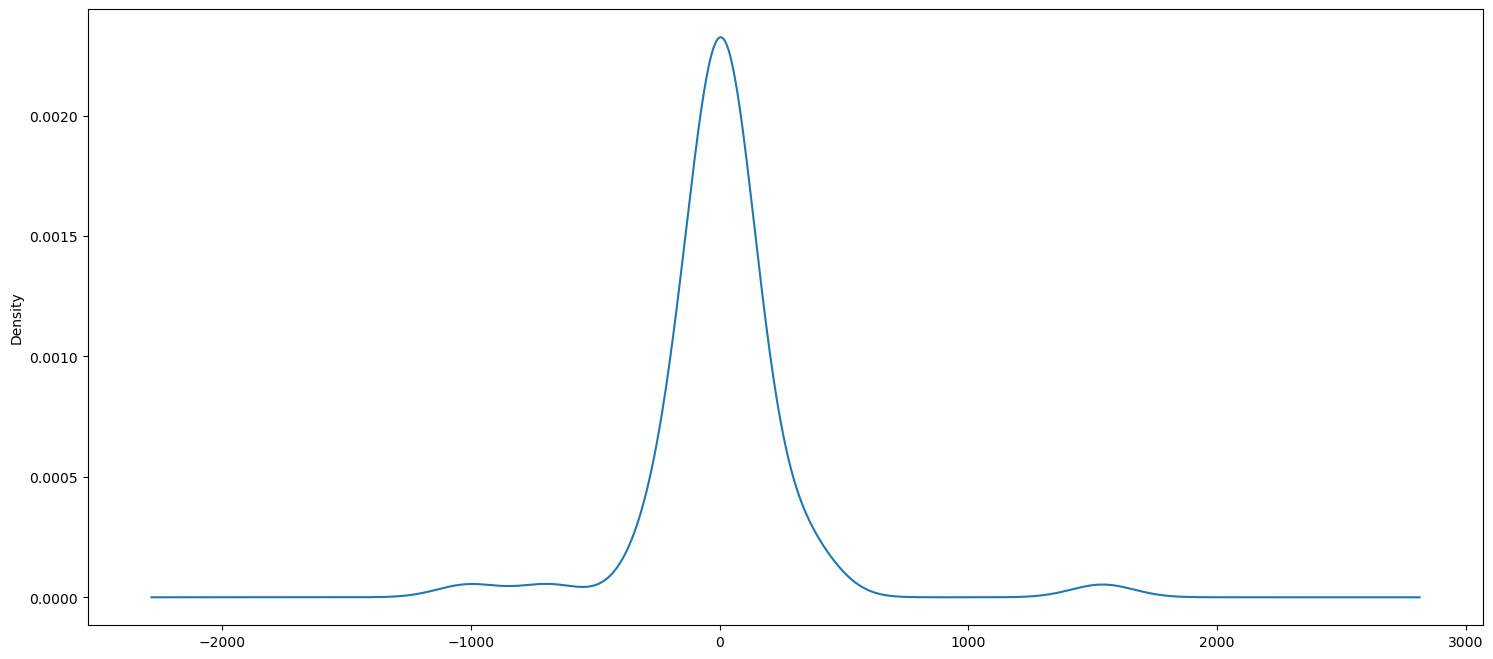

In [51]:
# fitting ARIMA model
mod_s4=sm.tsa.statespace.SARIMAX(y_s4,
                              order=(1,1,0),
                              seasonal_order=(1,1,0,12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
results_s4=mod_s4.fit()
print(results_s4.summary().tables[1])

# plotting results
results_s4.plot_diagnostics(figsize=(16,8))
plt.show()

# density plot of AR residuals
results_s4.resid.plot(kind='kde');

#### Validating forecasts for store 4

Forecasts for store 4


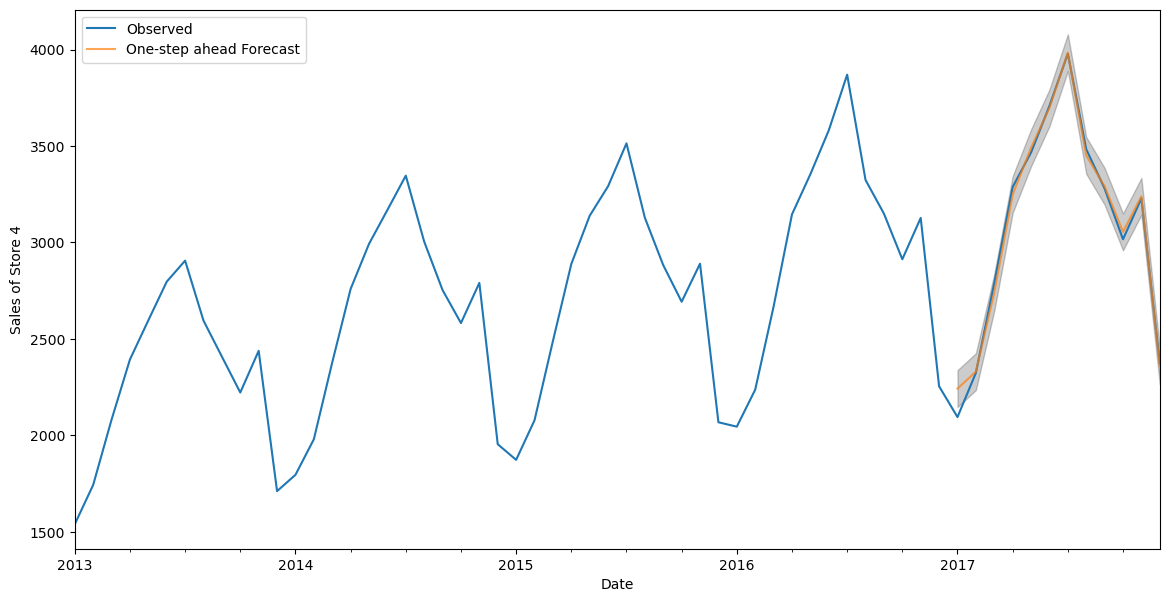

In [52]:
print("Forecasts for store 4")
pred_s4 = results_s4.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci_s4 = pred_s4.conf_int()

ax = y_s4['2013':].plot(label='Observed')
pred_s4.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci_s4.index,
                pred_ci_s4.iloc[:, 0],
                pred_ci_s4.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales of Store 4')
plt.legend()

plt.show()

In [53]:
y_forecasted_s4 = pred_s4.predicted_mean
y_truth_s4 = y_s4['2017-01-01':]

mse_s4 = ((y_forecasted_s4- y_truth_s4) ** 2).mean()
print('The Mean Squared Error of our forecasts is : {}'.format(round(mse_s4, 2)))
print('The Root Mean Squared Error of our forecasts : is {}'.format(round(np.sqrt(mse_s4), 2)))

The Mean Squared Error of our forecasts is : 2437.39
The Root Mean Squared Error of our forecasts : is 49.37


#### Producing and visualizing forecasts for store 4

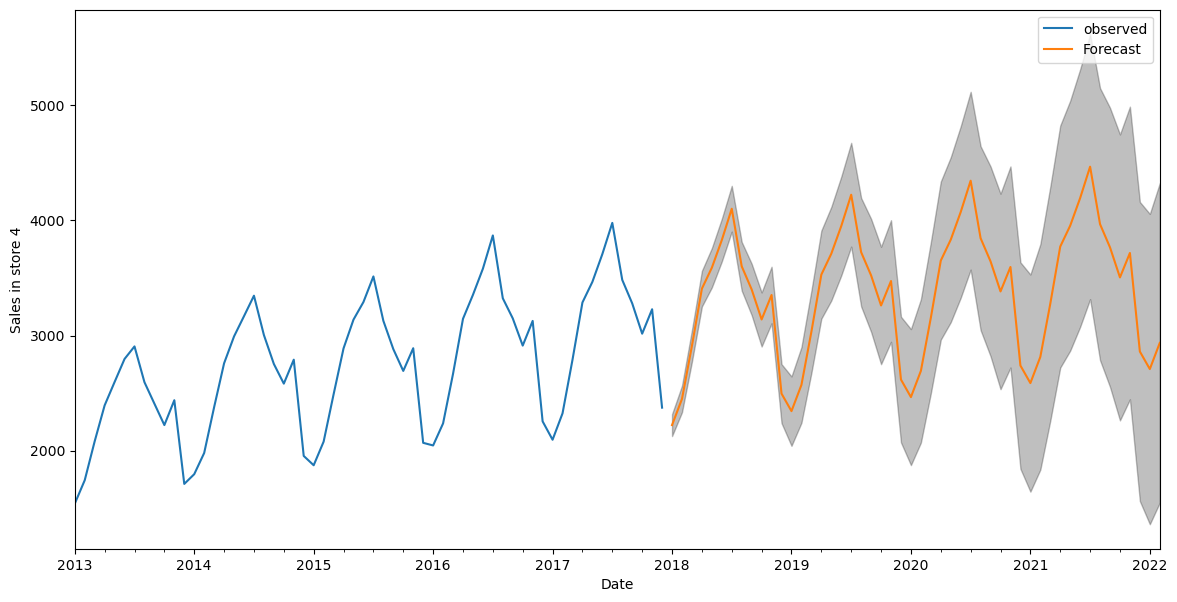

In [54]:
pred_uc_s4= results_s4.get_forecast(steps=50)
pred_ci_s4= pred_uc_s4.conf_int()

ax = y_s4.plot(label='observed', figsize=(14, 7))
pred_uc_s4.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_s4.index,
                pred_ci_s4.iloc[:, 0],
                pred_ci_s4.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales in store 4')

plt.legend()
plt.show()

#### Store 5 Model

In [55]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_s5 = sm.tsa.statespace.SARIMAX(y_s5,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results_s5 = mod_s5.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_s5.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1068.825101645112
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:806.0185984759751
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:615.7587981236923
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1265.8226377581288
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:567.5396617102488
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:541.1762095122084
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:424.93188370995813
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1247.960389465573
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:985.803586021542
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:741.7675386483487
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:556.4747653142745
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1374.3595977060481
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:571.3148899029877
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:515.9636067898894
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:402.17345898945916
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1211.5291301042193
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:813.6707078832849
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:614.9502045393352
ARIMA(

347.87

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3399      0.226     -1.505      0.132      -0.782       0.103
ar.S.L12      -0.1288      0.176     -0.731      0.465      -0.474       0.216
sigma2      1362.8822    296.951      4.590      0.000     780.868    1944.896


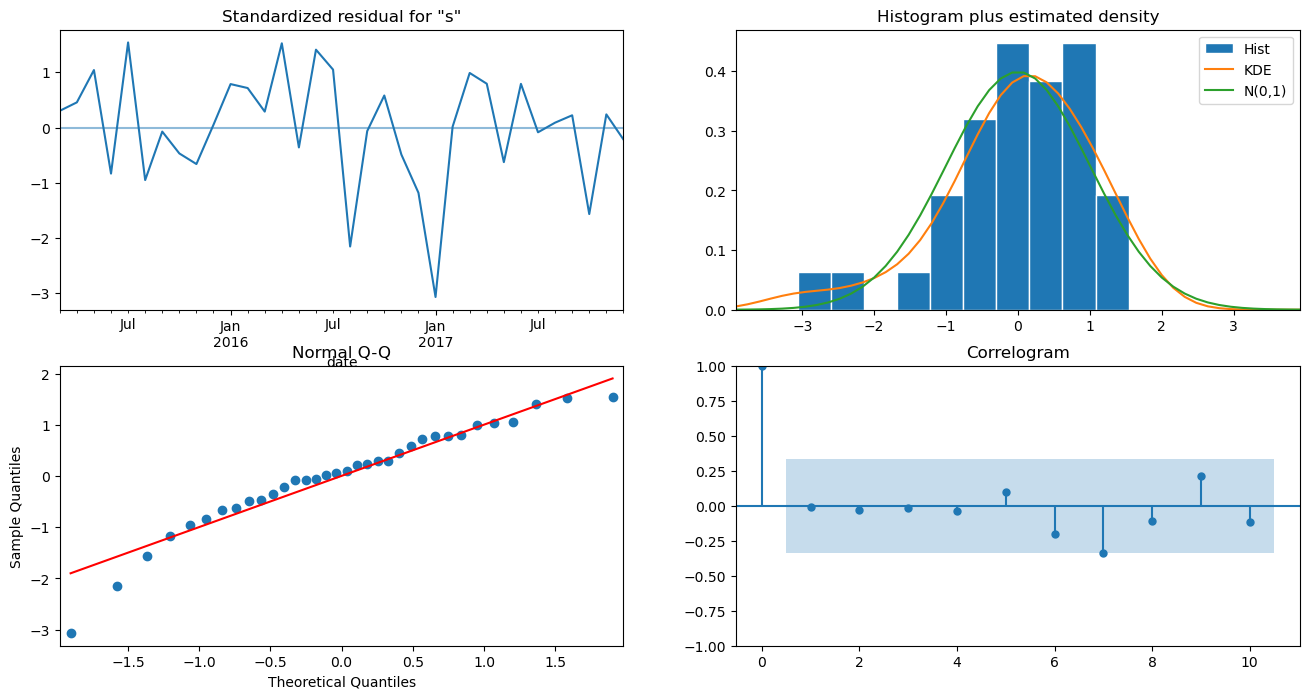

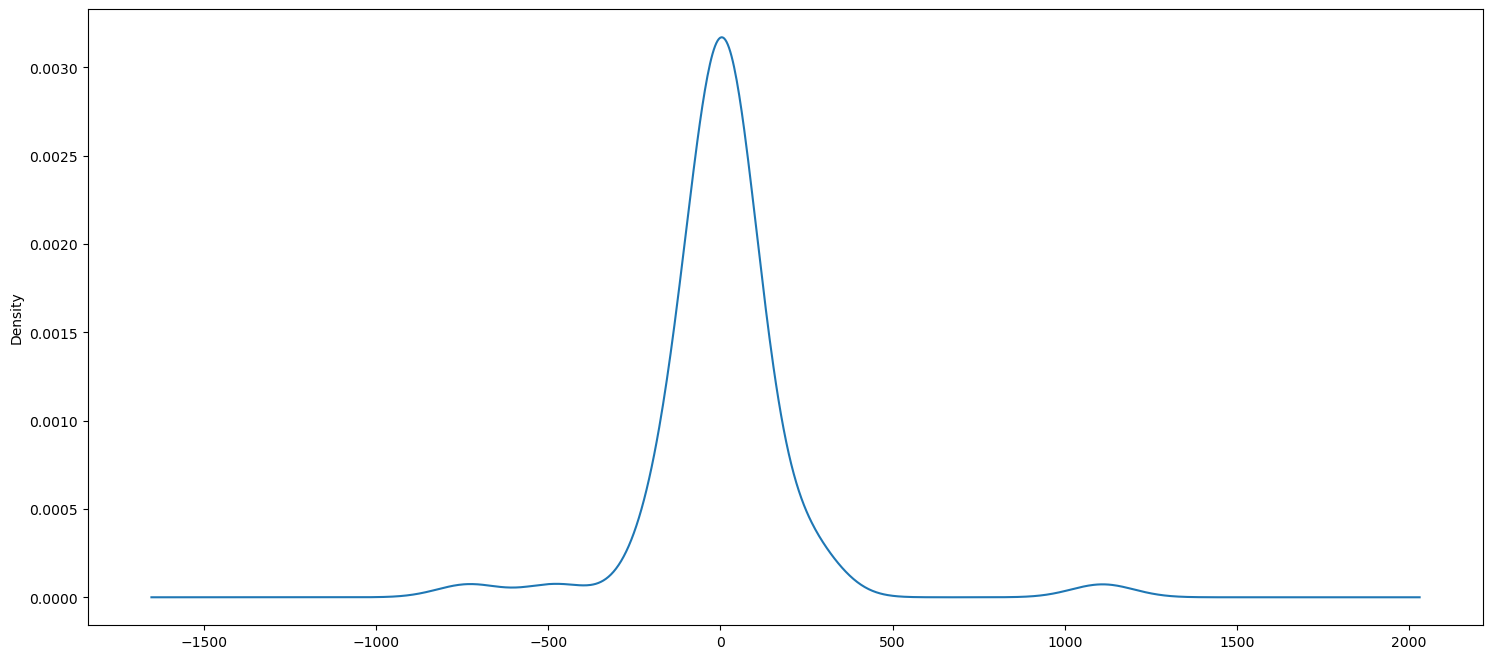

In [56]:
# fitting ARIMA model
mod_s5=sm.tsa.statespace.SARIMAX(y_s5,
                              order=(1,1,0),
                              seasonal_order=(1,1,0,12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
results_s5=mod_s5.fit()
print(results_s5.summary().tables[1])

# plotting results
results_s5.plot_diagnostics(figsize=(16,8))
plt.show()

# density plot of AR residuals
results_s5.resid.plot(kind='kde');

#### Validating forecasts for store 5

Forecasts for store 5


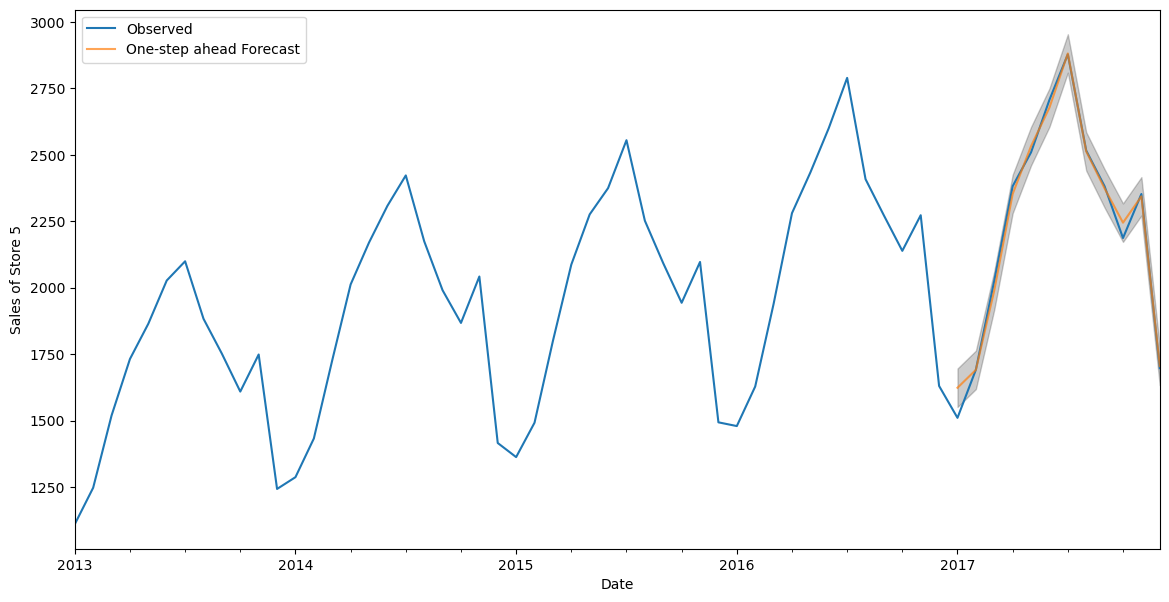

In [57]:
print("Forecasts for store 5")
pred_s5 = results_s5.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci_s5 = pred_s5.conf_int()

ax = y_s5['2013':].plot(label='Observed')
pred_s5.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci_s5.index,
                pred_ci_s5.iloc[:, 0],
                pred_ci_s5.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales of Store 5')
plt.legend()

plt.show()

In [58]:
y_forecasted_s5 = pred_s5.predicted_mean
y_truth_s5 = y_s5['2017-01-01':]

mse_s5 = ((y_forecasted_s5- y_truth_s5) ** 2).mean()
print('The Mean Squared Error of our forecasts is : {}'.format(round(mse_s5, 2)))
print('The Root Mean Squared Error of our forecasts : is {}'.format(round(np.sqrt(mse_s5), 2)))

The Mean Squared Error of our forecasts is : 1662.51
The Root Mean Squared Error of our forecasts : is 40.77


#### Producing and visualizing forecasts for store 5

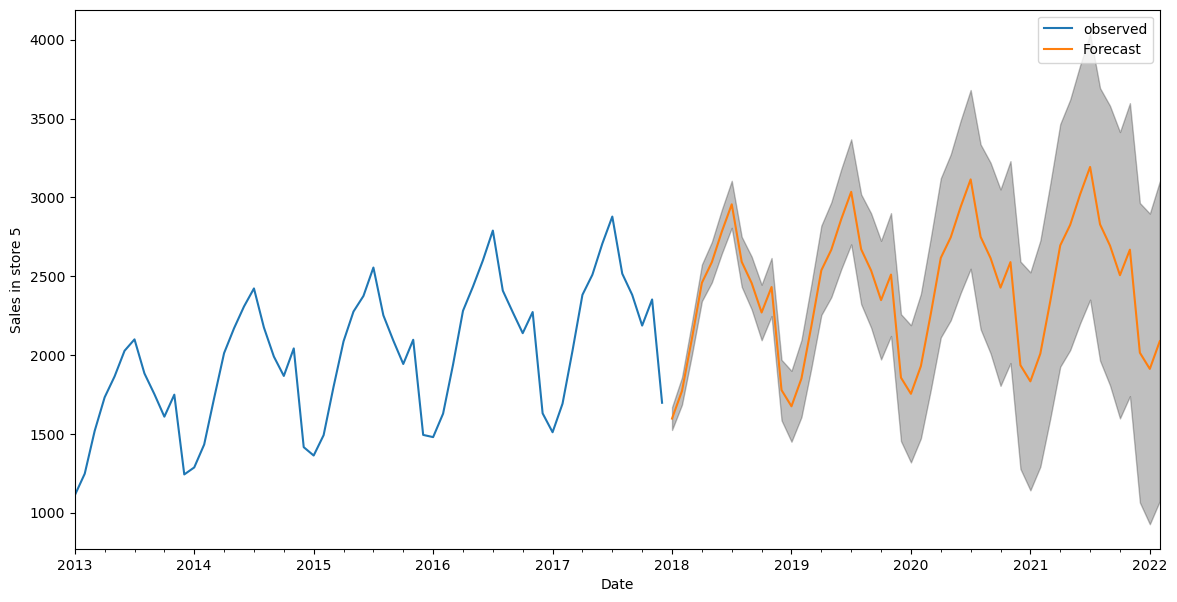

In [59]:
pred_uc_s5= results_s5.get_forecast(steps=50)
pred_ci_s5= pred_uc_s5.conf_int()

ax = y_s5.plot(label='observed', figsize=(14, 7))
pred_uc_s5.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_s5.index,
                pred_ci_s5.iloc[:, 0],
                pred_ci_s5.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales in store 5')

plt.legend()
plt.show()

#### Store 6 Model

In [60]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_s6 = sm.tsa.statespace.SARIMAX(y_s6,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results_s6 = mod_s6.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_s6.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1068.688026233496
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:805.9803642502759
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:614.3793419364433
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1390.0858138503197
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:563.1695829430407
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:540.303592447008
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:418.69937718396466
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1315.6511940746377
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:985.6593737103325
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:741.5760477251632
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:551.860748297732
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1437.1226459004758
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:530.1188365875059
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:507.71349989656625
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:396.6507495139334
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1382.8739686007443
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:813.4388132859677
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:614.2430874966825
ARIMA(

344.74

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4602      0.189     -2.429      0.015      -0.831      -0.089
ar.S.L12       0.0194      0.133      0.147      0.884      -0.241       0.280
sigma2      1242.7473    247.239      5.026      0.000     758.168    1727.327


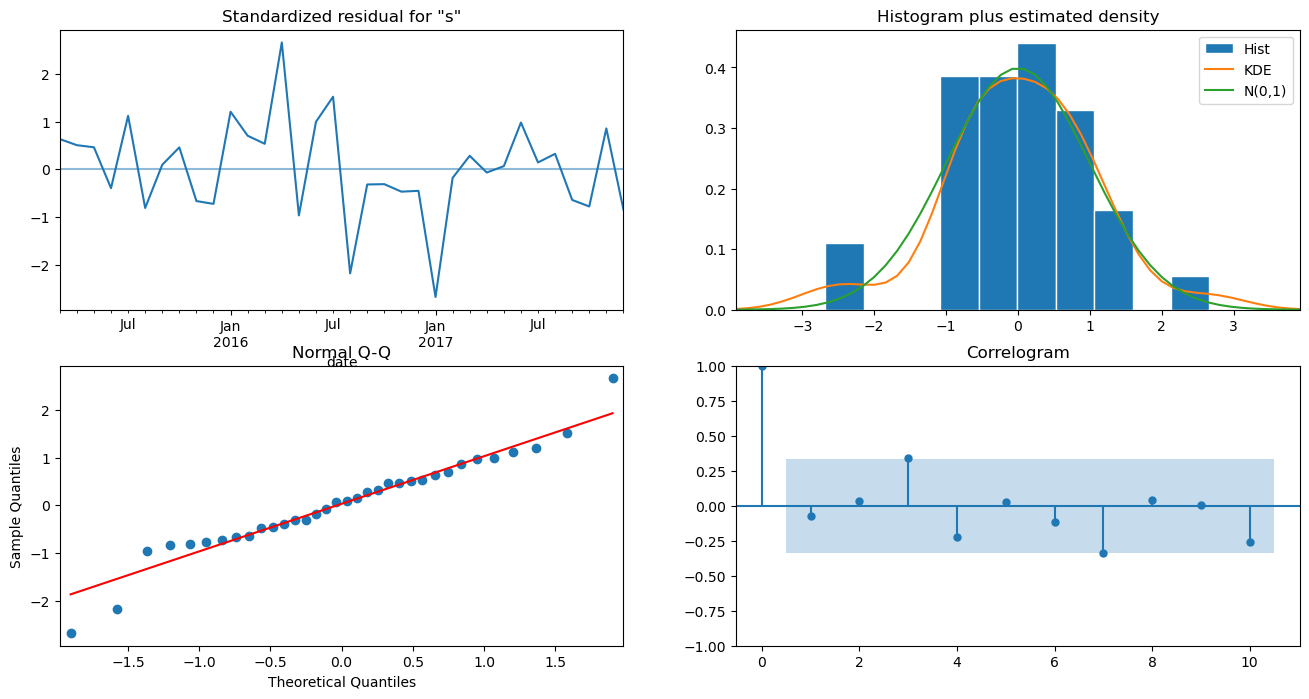

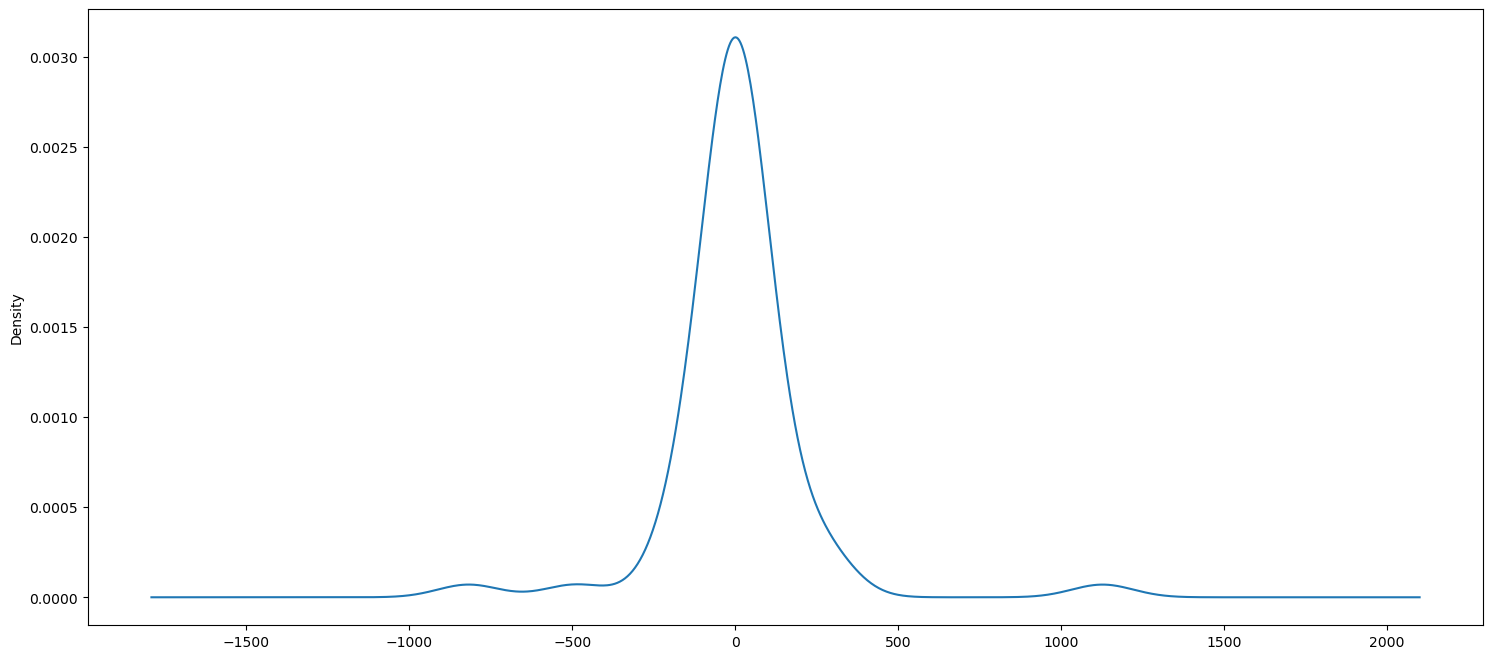

In [61]:
# fitting ARIMA model
mod_s6=sm.tsa.statespace.SARIMAX(y_s6,
                              order=(1,1,0),
                              seasonal_order=(1,1,0,12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
results_s6=mod_s6.fit()
print(results_s6.summary().tables[1])

# plotting results
results_s6.plot_diagnostics(figsize=(16,8))
plt.show()

# density plot of AR residuals
results_s6.resid.plot(kind='kde');

#### Validating forecasts for store 6

Forecasts for store 6


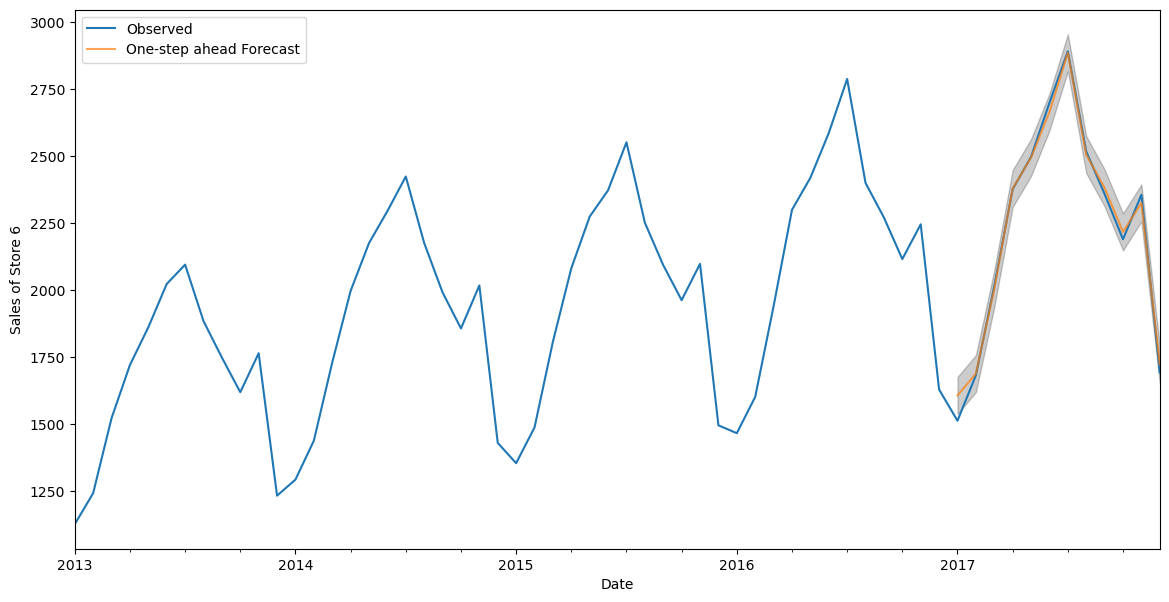

In [62]:
print("Forecasts for store 6")
pred_s6 = results_s6.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci_s6 = pred_s6.conf_int()

ax = y_s6['2013':].plot(label='Observed')
pred_s6.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci_s6.index,
                pred_ci_s6.iloc[:, 0],
                pred_ci_s6.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales of Store 6')
plt.legend()

plt.show()

In [63]:
y_forecasted_s6 = pred_s6.predicted_mean
y_truth_s6 = y_s6['2017-01-01':]

mse_s6 = ((y_forecasted_s6- y_truth_s6) ** 2).mean()
print('The Mean Squared Error of our forecasts is : {}'.format(round(mse_s6, 2)))
print('The Root Mean Squared Error of our forecasts : is {}'.format(round(np.sqrt(mse_s6), 2)))

The Mean Squared Error of our forecasts is : 1125.56
The Root Mean Squared Error of our forecasts : is 33.55


#### Producing and visualizing forecasts for store 6

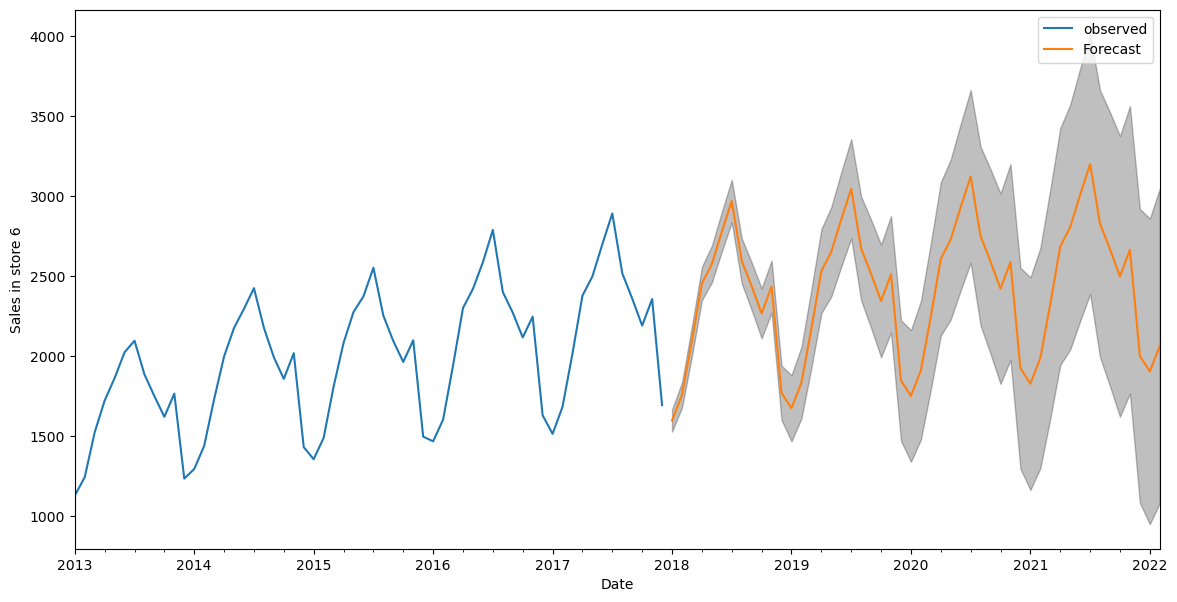

In [64]:
pred_uc_s6= results_s6.get_forecast(steps=50)
pred_ci_s6= pred_uc_s6.conf_int()

ax = y_s6.plot(label='observed', figsize=(14, 7))
pred_uc_s6.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_s6.index,
                pred_ci_s6.iloc[:, 0],
                pred_ci_s6.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales in store 6')

plt.legend()
plt.show()

#### Store 7 Model

In [65]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_s7 = sm.tsa.statespace.SARIMAX(y_s7,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results_s7 = mod_s7.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_s7.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1058.2477535909243
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:798.5132035042708
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:606.3490562585255
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1710.3119102289068
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:555.3619496672654
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:530.3334111720493
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:412.6951843631768
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:389.0506653402107
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:975.4625837376119
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:782.8329162707113
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:548.8912482033849
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1443.8562210579048
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:559.5184282124433
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:507.8177962753553
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:394.9952509063808
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:364.9512356453032
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:803.3957356886018
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:644.299286857395
ARIMA(0,

338.09

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4629      0.195     -2.373      0.018      -0.845      -0.080
ar.S.L12      -0.0270      0.129     -0.209      0.834      -0.280       0.226
sigma2      1022.0712    171.643      5.955      0.000     685.658    1358.485


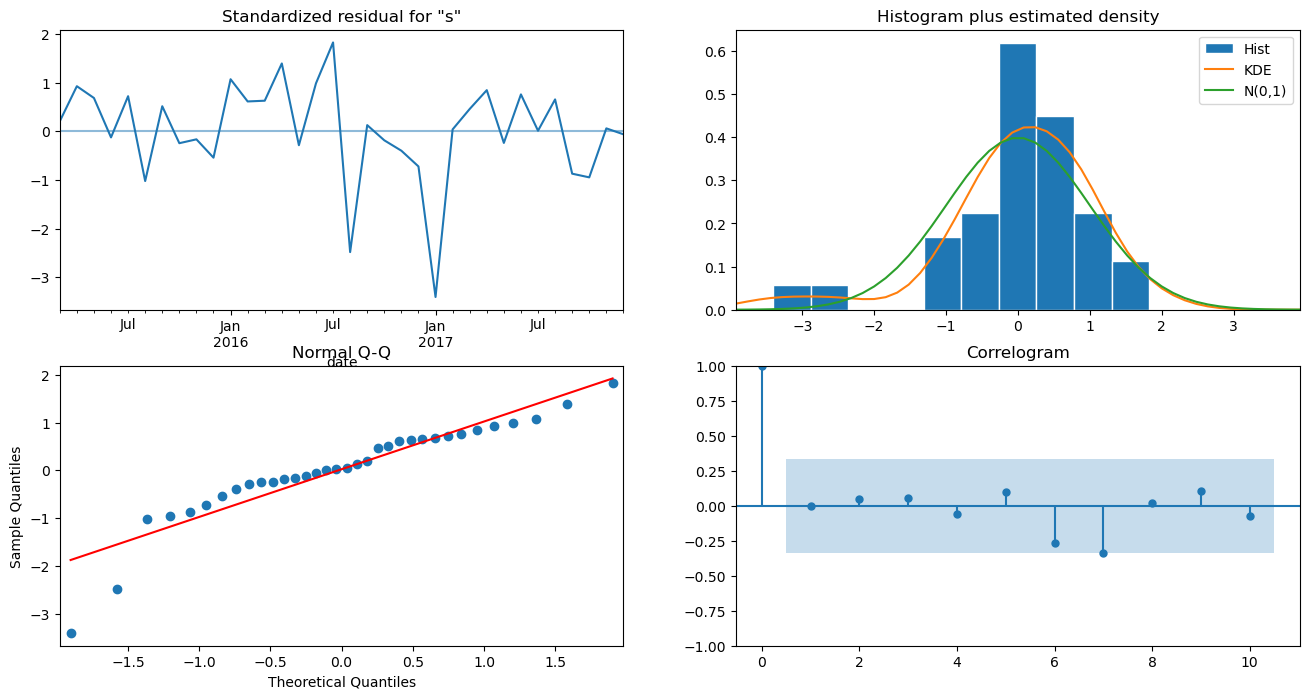

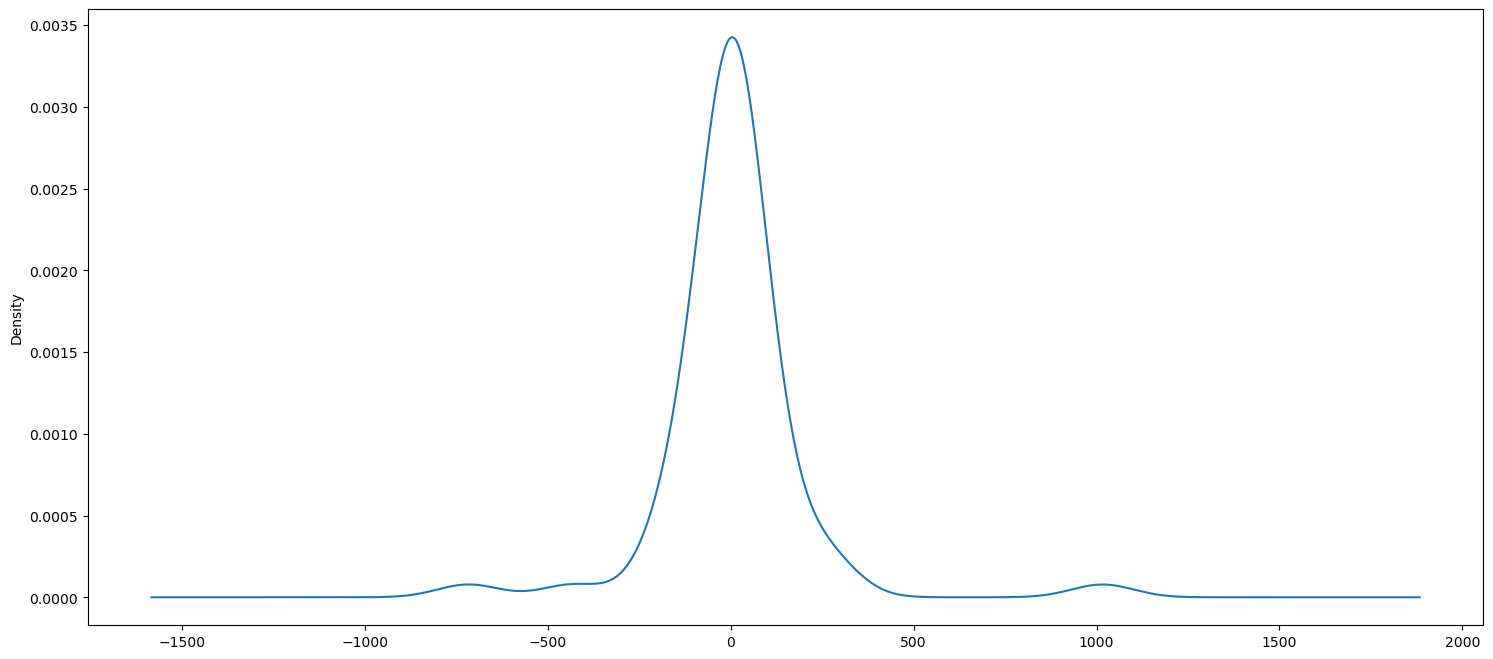

In [66]:
# fitting ARIMA model
mod_s7=sm.tsa.statespace.SARIMAX(y_s7,
                              order=(1,1,0),
                              seasonal_order=(1,1,0,12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
results_s7=mod_s7.fit()
print(results_s7.summary().tables[1])

# plotting results
results_s7.plot_diagnostics(figsize=(16,8))
plt.show()

# density plot of AR residuals
results_s7.resid.plot(kind='kde');

#### Validating forecasts for store 7

Forecasts for store 7


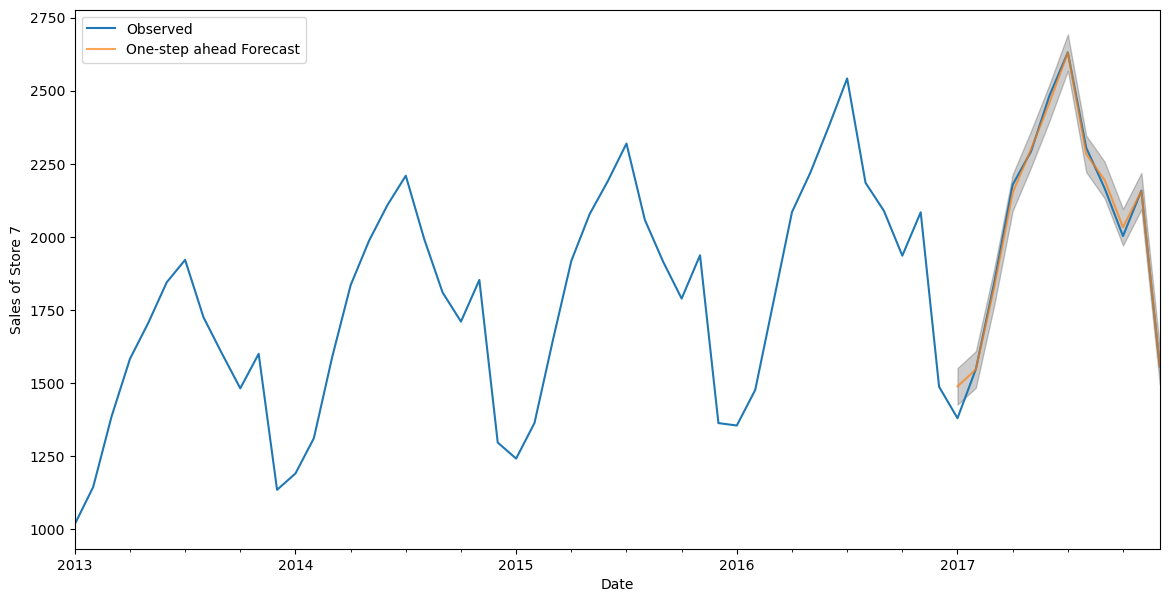

In [67]:
print("Forecasts for store 7")
pred_s7 = results_s7.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci_s7 = pred_s7.conf_int()

ax = y_s7['2013':].plot(label='Observed')
pred_s7.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci_s7.index,
                pred_ci_s7.iloc[:, 0],
                pred_ci_s7.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales of Store 7')
plt.legend()

plt.show()

In [68]:
y_forecasted_s7 = pred_s7.predicted_mean
y_truth_s7 = y_s7['2017-01-01':]

mse_s7 = ((y_forecasted_s7- y_truth_s7) ** 2).mean()
print('The Mean Squared Error of our forecasts is : {}'.format(round(mse_s7, 2)))
print('The Root Mean Squared Error of our forecasts : is {}'.format(round(np.sqrt(mse_s7), 2)))

The Mean Squared Error of our forecasts is : 1299.27
The Root Mean Squared Error of our forecasts : is 36.05


#### Producing and visualizing forecasts for store 7

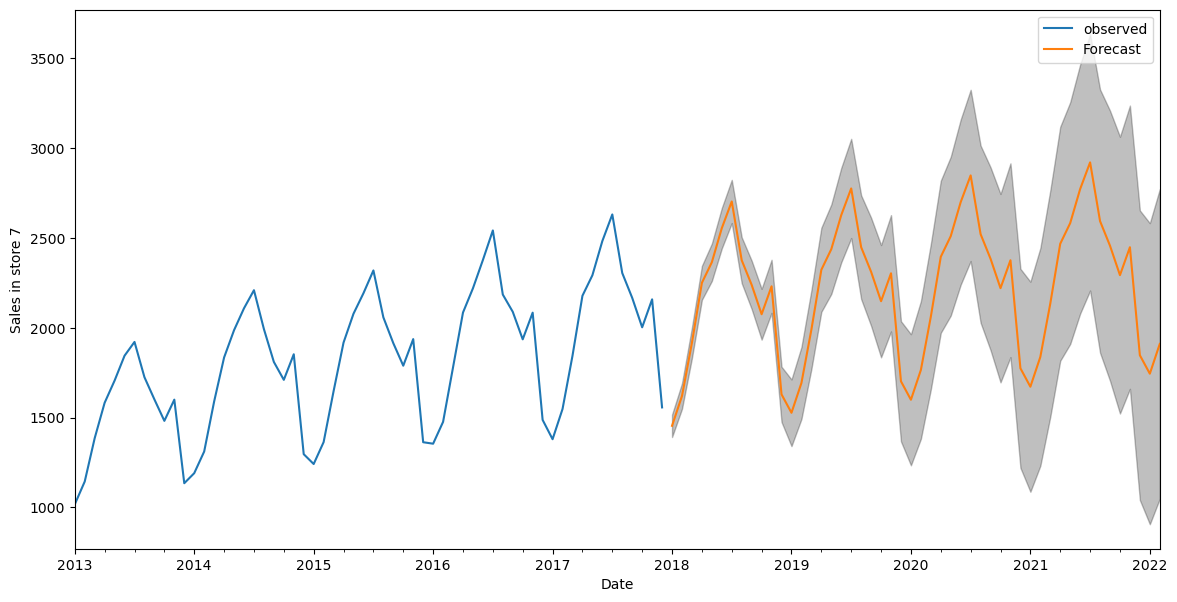

In [69]:
pred_uc_s7= results_s7.get_forecast(steps=50)
pred_ci_s7= pred_uc_s7.conf_int()

ax = y_s7.plot(label='observed', figsize=(14, 7))
pred_uc_s7.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_s7.index,
                pred_ci_s7.iloc[:, 0],
                pred_ci_s7.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales in store 7')

plt.legend()
plt.show()

#### Store 8 Model

In [70]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_s8 = sm.tsa.statespace.SARIMAX(y_s8,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results_s8 = mod_s8.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_s8.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1125.2020165448444
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:849.1135622281662
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:659.9436186197927
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1368.4402307096018
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:610.5873694439393
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:589.5169857254663
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:455.29728745203056
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1254.6760765218423
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1040.2995706468419
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:830.6952536573541
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:600.9013610652758
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1592.588442558723
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:580.9931103191268
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:555.4465811031016
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:436.67262951725417
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1417.0760692249885
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:868.7001163845349
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:696.1564945702797
ARI

378.93

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4529      0.192     -2.362      0.018      -0.829      -0.077
ar.S.L12      -0.1011      0.135     -0.750      0.453      -0.365       0.163
sigma2      3397.1274    716.811      4.739      0.000    1992.204    4802.050


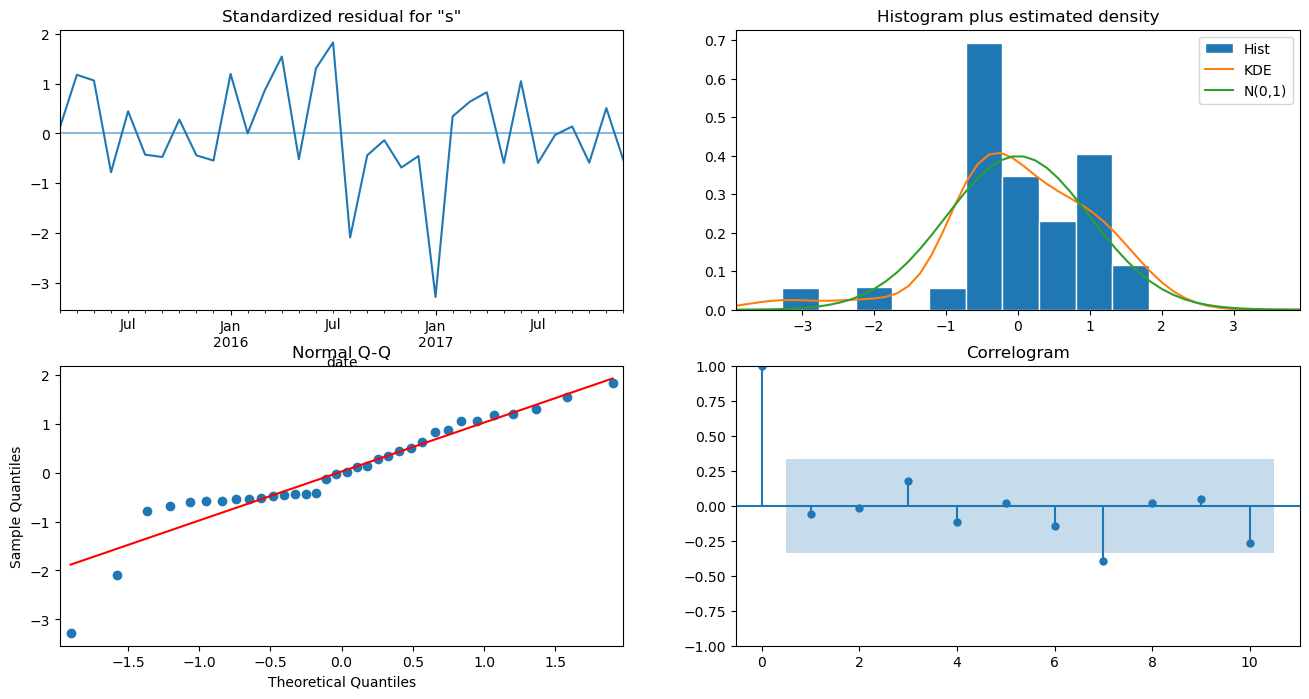

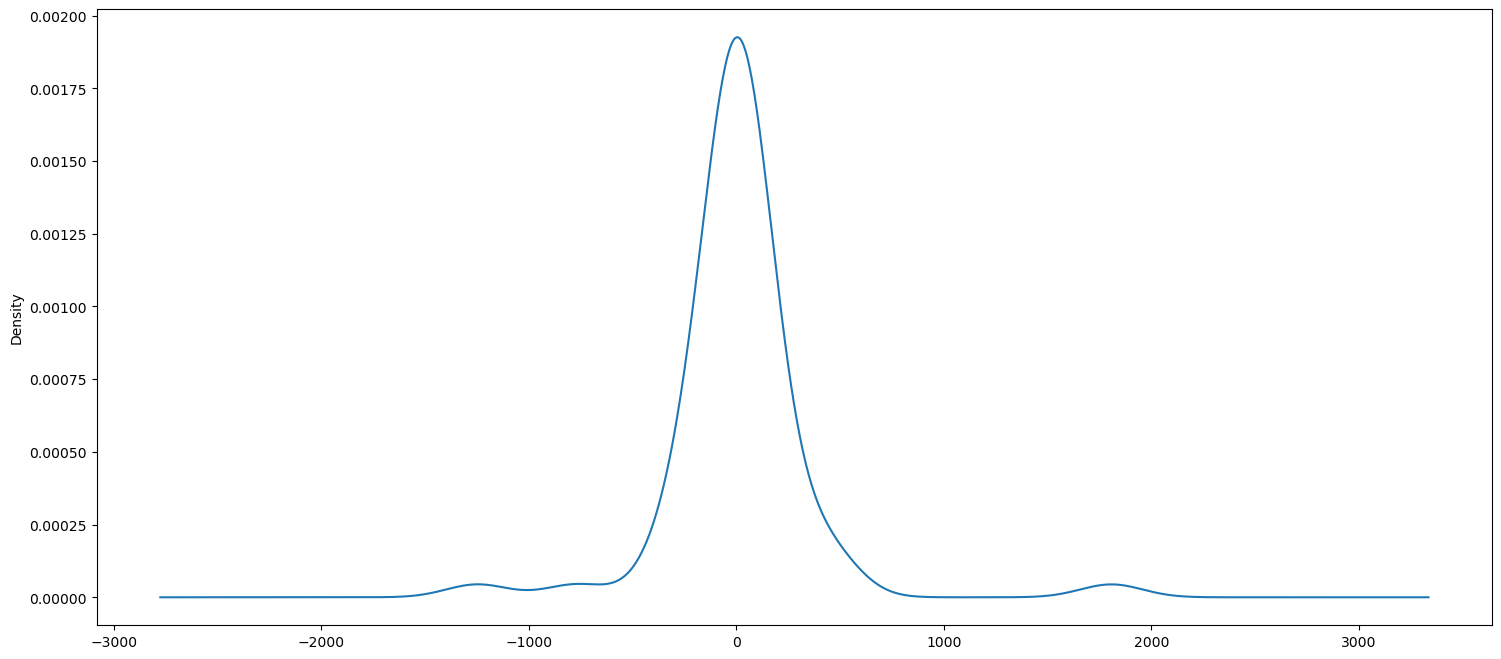

In [71]:
# fitting ARIMA model
mod_s8=sm.tsa.statespace.SARIMAX(y_s8,
                              order=(1,1,0),
                              seasonal_order=(1,1,0,12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
results_s8=mod_s8.fit()
print(results_s8.summary().tables[1])

# plotting results
results_s8.plot_diagnostics(figsize=(16,8))
plt.show()

# density plot of AR residuals
results_s8.resid.plot(kind='kde');

#### Validating forecasts for store 8

Forecasts for store 8


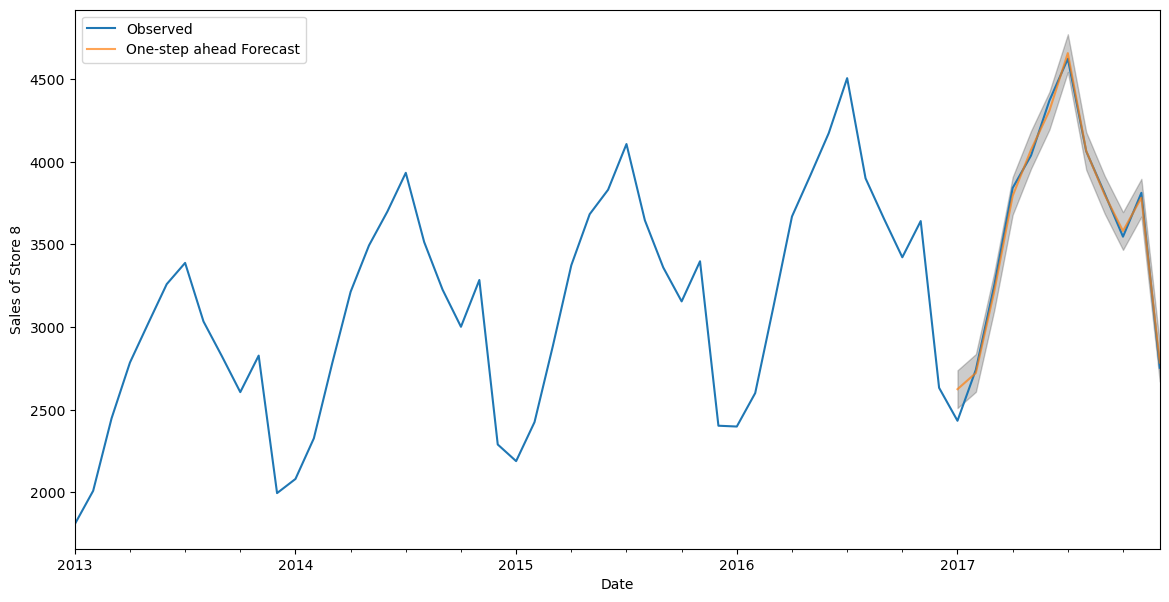

In [72]:
print("Forecasts for store 8")
pred_s8 = results_s8.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci_s8 = pred_s8.conf_int()

ax = y_s8['2013':].plot(label='Observed')
pred_s8.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci_s8.index,
                pred_ci_s8.iloc[:, 0],
                pred_ci_s8.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales of Store 8')
plt.legend()

plt.show()

In [73]:
y_forecasted_s8 = pred_s8.predicted_mean
y_truth_s8 = y_s8['2017-01-01':]

mse_s8 = ((y_forecasted_s8- y_truth_s8) ** 2).mean()
print('The Mean Squared Error of our forecasts is : {}'.format(round(mse_s8, 2)))
print('The Root Mean Squared Error of our forecasts : is {}'.format(round(np.sqrt(mse_s8), 2)))

The Mean Squared Error of our forecasts is : 4145.33
The Root Mean Squared Error of our forecasts : is 64.38


#### Producing and visualizing forecasts for store 8

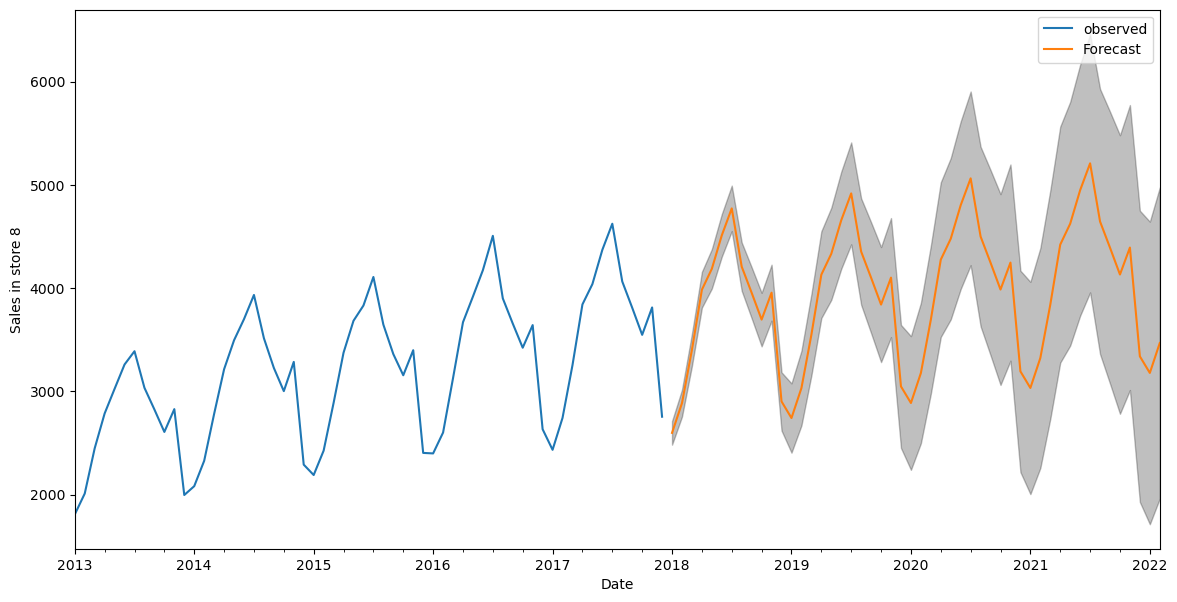

In [74]:
pred_uc_s8= results_s8.get_forecast(steps=50)
pred_ci_s8= pred_uc_s8.conf_int()

ax = y_s8.plot(label='observed', figsize=(14, 7))
pred_uc_s8.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_s8.index,
                pred_ci_s8.iloc[:, 0],
                pred_ci_s8.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales in store 8')

plt.legend()
plt.show()

#### Store 9 Model

In [75]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_s9 = sm.tsa.statespace.SARIMAX(y_s9,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results_s9 = mod_s9.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_s9.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1107.188313695573
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:834.8906624314901
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:645.4733515487987
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1110.2134548532558
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:595.1343485833986
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:572.5309438037061
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:442.74418955669427
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1353.2748481452488
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1023.309529723664
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:770.6364074867263
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:579.5449749422165
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1360.9368944780836
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:556.6110193949588
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:533.7033983713723
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:415.38921026859856
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1176.0753515612807
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:851.6217819704743
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:643.8008089387587
ARIM

365.95

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3543      0.206     -1.720      0.085      -0.758       0.049
ar.S.L12      -0.0152      0.145     -0.105      0.916      -0.299       0.268
sigma2      2319.4532    532.256      4.358      0.000    1276.250    3362.656


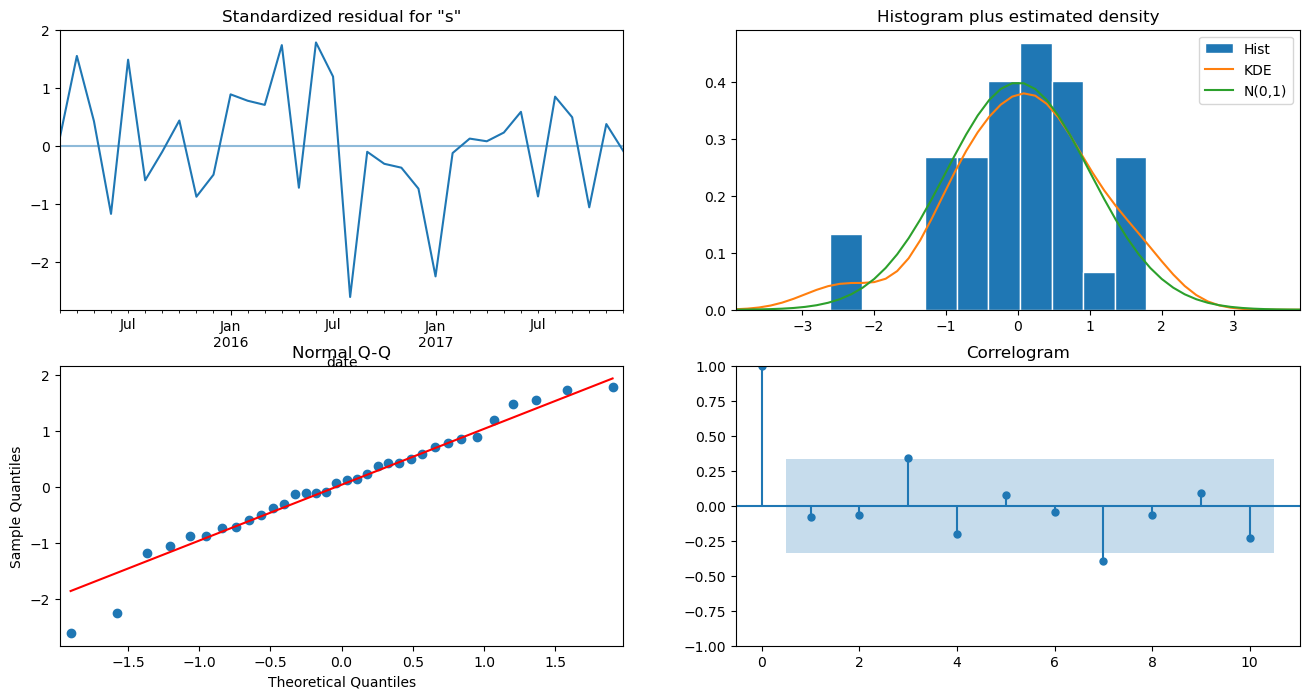

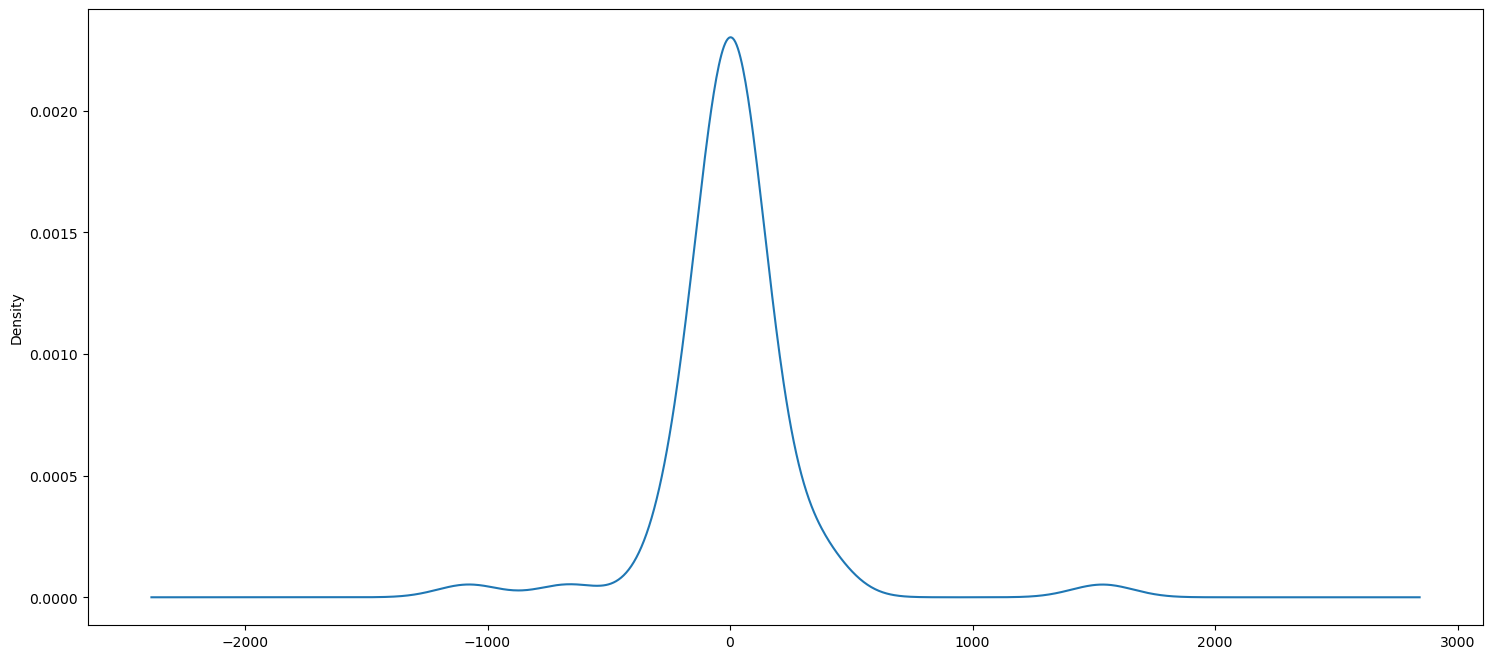

In [76]:
# fitting ARIMA model
mod_s9=sm.tsa.statespace.SARIMAX(y_s9,
                              order=(1,1,0),
                              seasonal_order=(1,1,0,12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
results_s9=mod_s9.fit()
print(results_s9.summary().tables[1])

# plotting results
results_s9.plot_diagnostics(figsize=(16,8))
plt.show()

# density plot of AR residuals
results_s9.resid.plot(kind='kde');

#### Validating forecasts for store 9

Forecasts for store 9


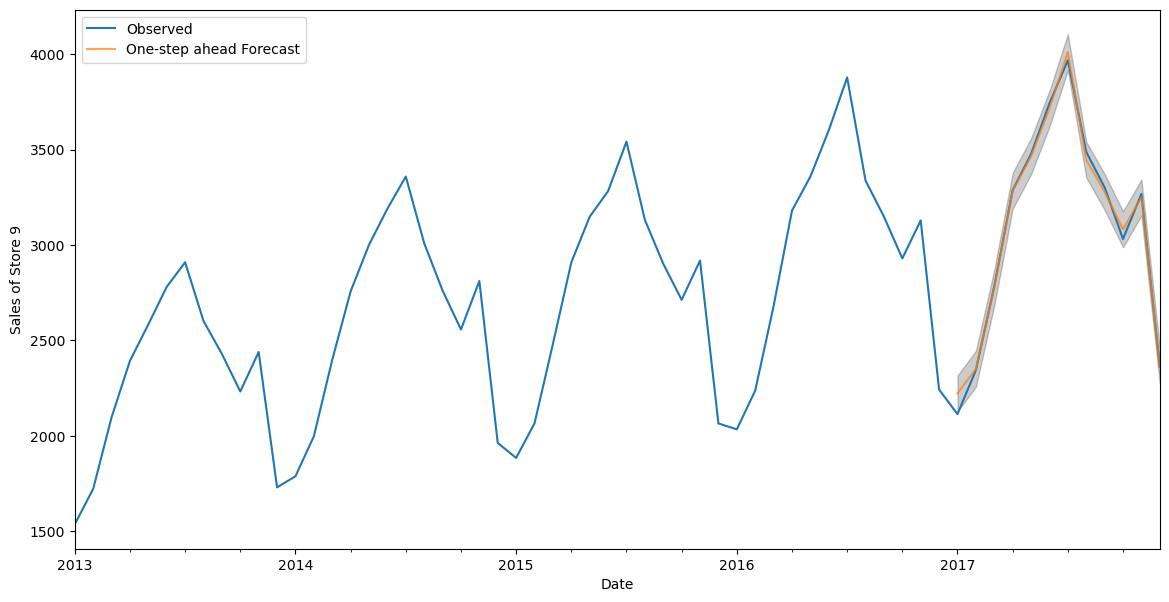

In [77]:
print("Forecasts for store 9")
pred_s9 = results_s9.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci_s9 = pred_s9.conf_int()

ax = y_s9['2013':].plot(label='Observed')
pred_s9.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci_s9.index,
                pred_ci_s9.iloc[:, 0],
                pred_ci_s9.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales of Store 9')
plt.legend()

plt.show()

In [78]:
y_forecasted_s9 = pred_s9.predicted_mean
y_truth_s9 = y_s9['2017-01-01':]

mse_s9 = ((y_forecasted_s9- y_truth_s9) ** 2).mean()
print('The Mean Squared Error of our forecasts is : {}'.format(round(mse_s9, 2)))
print('The Root Mean Squared Error of our forecasts : is {}'.format(round(np.sqrt(mse_s9), 2)))

The Mean Squared Error of our forecasts is : 1648.01
The Root Mean Squared Error of our forecasts : is 40.6


#### Producing and visualizing forecasts for store 9

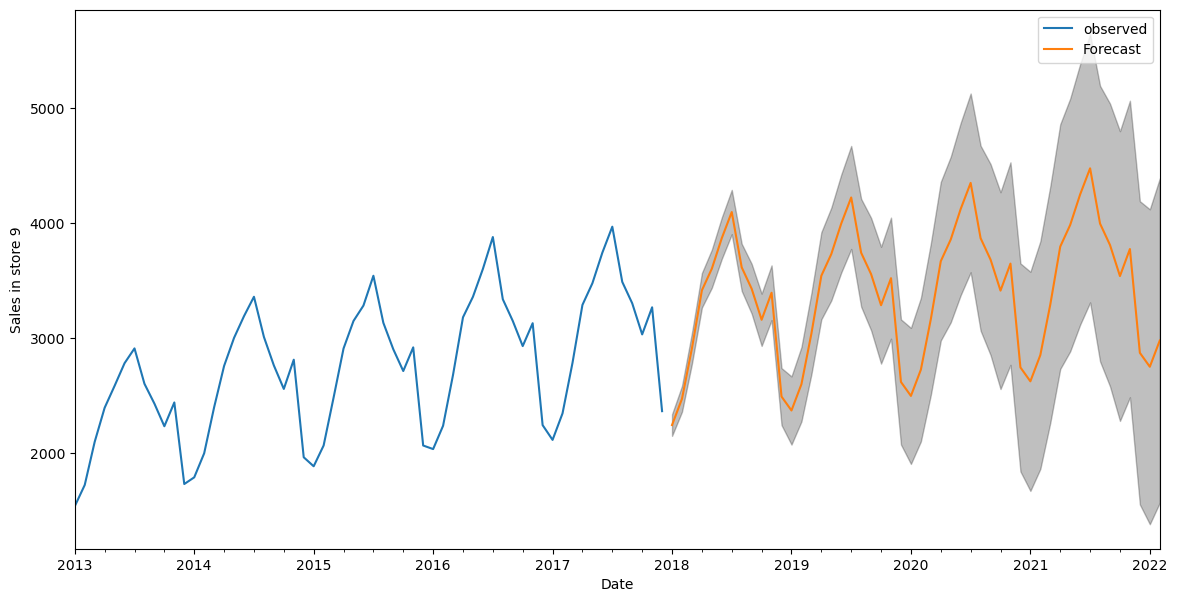

In [79]:
pred_uc_s9= results_s9.get_forecast(steps=50)
pred_ci_s9= pred_uc_s9.conf_int()

ax = y_s9.plot(label='observed', figsize=(14, 7))
pred_uc_s9.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_s9.index,
                pred_ci_s9.iloc[:, 0],
                pred_ci_s9.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales in store 9')

plt.legend()
plt.show()

#### Store 10 Model

In [80]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_s10 = sm.tsa.statespace.SARIMAX(y_s10,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results_s10 = mod_s10.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_s10.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1114.7641982430741
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:840.7377987229097
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:651.192392362934
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1246.4093947215786
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:602.8290591260387
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:579.6564279236602
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:451.17013656879533
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1462.8650565493158
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1030.1014608001078
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:776.1724032345035
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:588.1583006600184
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1451.1811989027915
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:568.3456859643973
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:540.9604415885278
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:430.81770981356306
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1269.0693960911635
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:858.5331731560832
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:649.8594832958615
ARI

379.31

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5455      0.249      2.189      0.029       0.057       1.034
ma.L1         -1.0000    698.411     -0.001      0.999   -1369.861    1367.861
ar.S.L12      -0.2449      0.155     -1.575      0.115      -0.550       0.060
sigma2      3085.9205   2.16e+06      0.001      0.999   -4.22e+06    4.23e+06


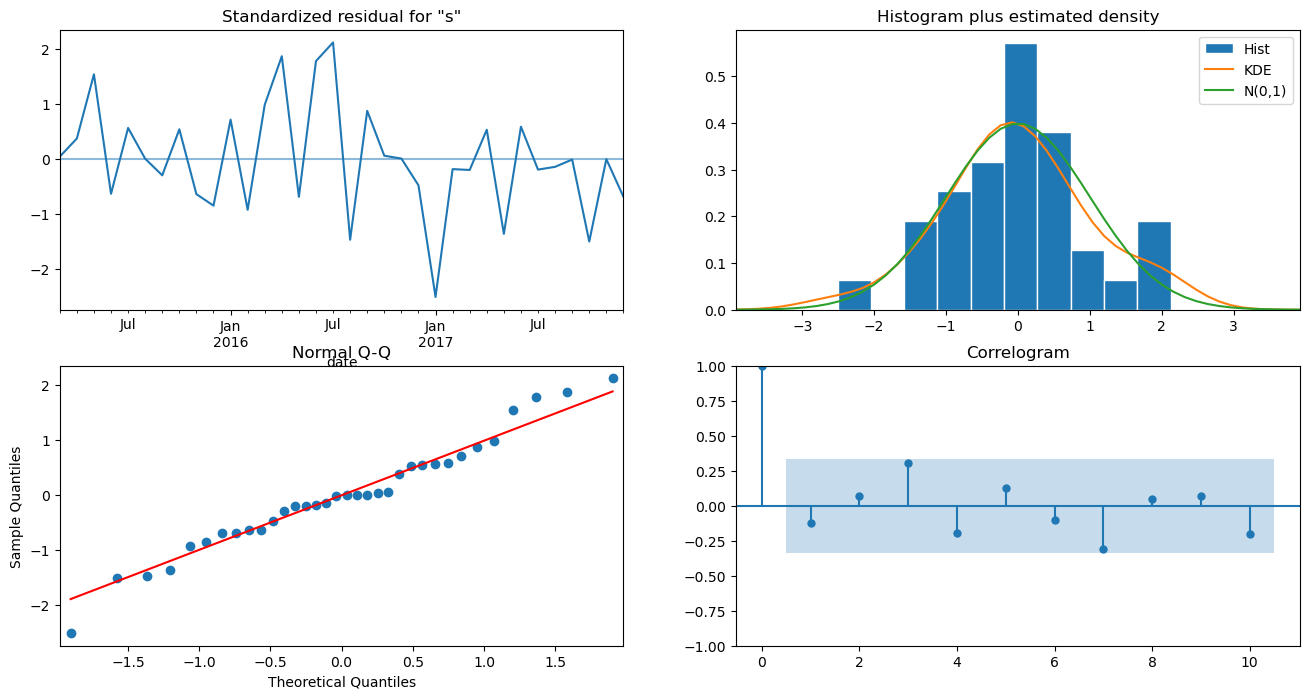

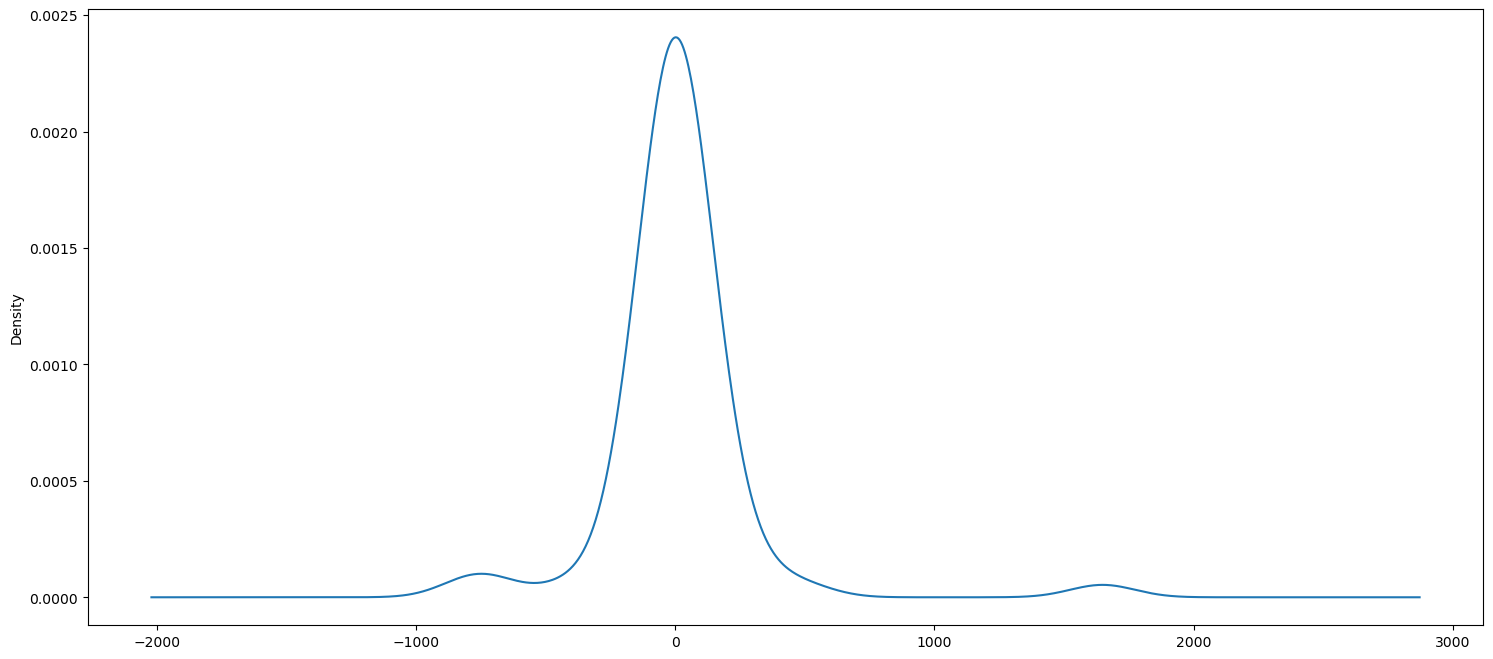

In [81]:
# fitting ARIMA model
mod_s10=sm.tsa.statespace.SARIMAX(y_s10,
                              order=(1,1,1),
                              seasonal_order=(1,1,0,12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
results_s10=mod_s10.fit()
print(results_s10.summary().tables[1])

# plotting results
results_s10.plot_diagnostics(figsize=(16,8))
plt.show()

# density plot of AR residuals
results_s10.resid.plot(kind='kde');

#### Validating forecasts for store 10

Forecasts for store 10


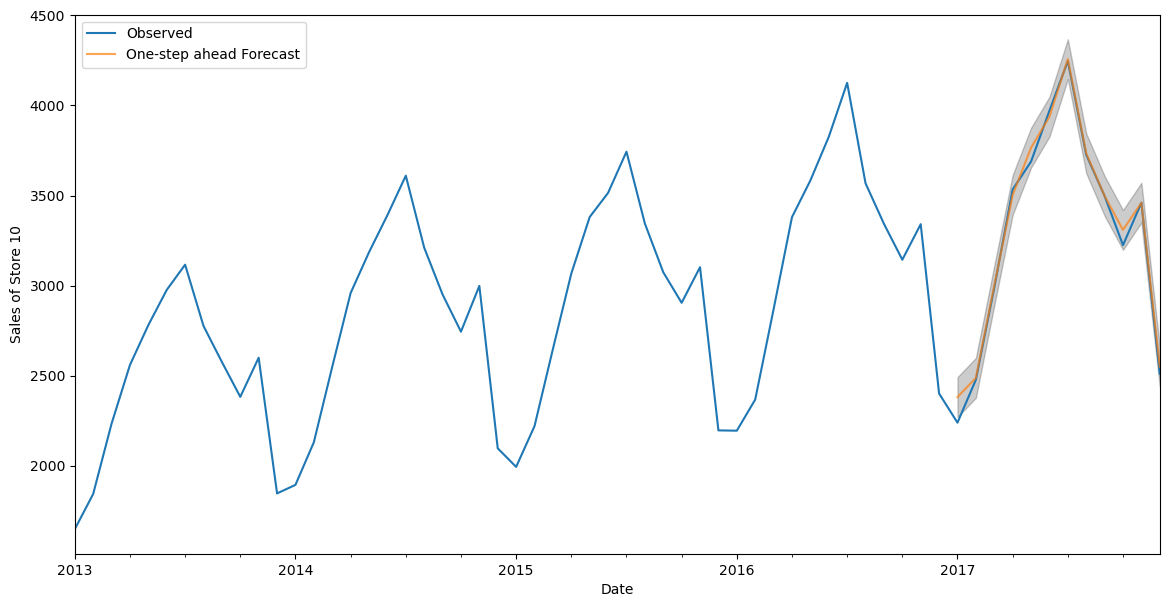

In [82]:
print("Forecasts for store 10")
pred_s10 = results_s10.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci_s10 = pred_s10.conf_int()

ax = y_s10['2013':].plot(label='Observed')
pred_s10.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci_s10.index,
                pred_ci_s10.iloc[:, 0],
                pred_ci_s10.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales of Store 10')
plt.legend()

plt.show()

In [83]:
y_forecasted_s10 = pred_s10.predicted_mean
y_truth_s10 = y_s10['2017-01-01':]

mse_s10 = ((y_forecasted_s10- y_truth_s10) ** 2).mean()
print('The Mean Squared Error of our forecasts is : {}'.format(round(mse_s10, 2)))
print('The Root Mean Squared Error of our forecasts : is {}'.format(round(np.sqrt(mse_s10), 2)))

The Mean Squared Error of our forecasts is : 3091.23
The Root Mean Squared Error of our forecasts : is 55.6


#### Producing and visualizing forecasts for store 10

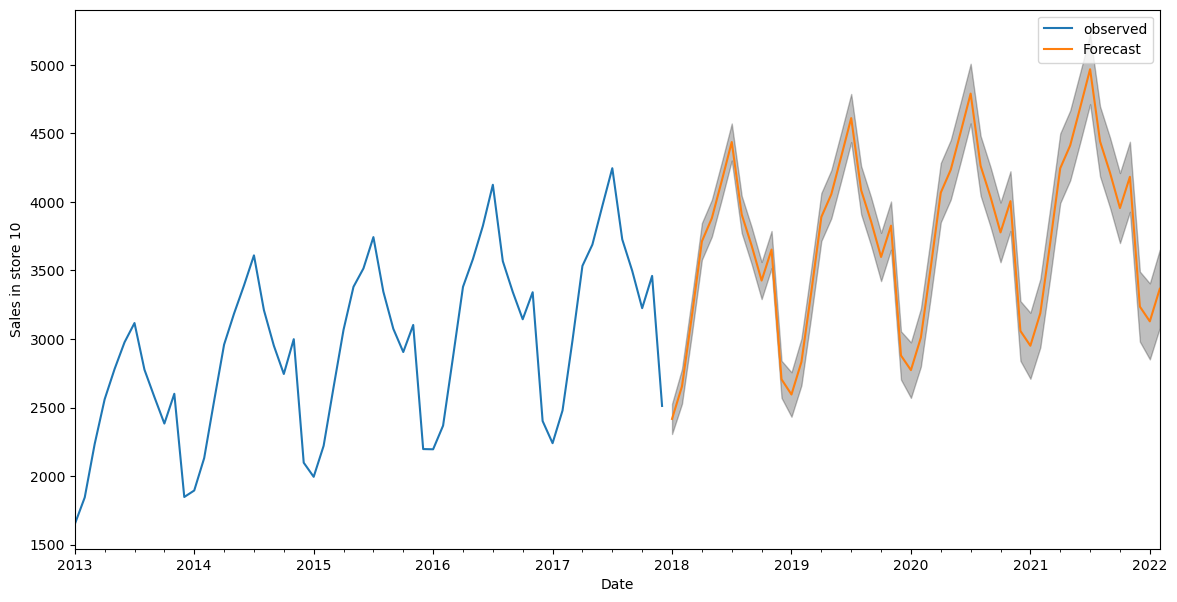

In [84]:
pred_uc_s10= results_s10.get_forecast(steps=50)
pred_ci_s10= pred_uc_s10.conf_int()

ax = y_s10.plot(label='observed', figsize=(14, 7))
pred_uc_s10.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_s10.index,
                pred_ci_s10.iloc[:, 0],
                pred_ci_s10.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales in store 10')

plt.legend()
plt.show()

In [85]:
print("THE METRICS FOR SARIMAX MODEL FOR ALL STORES")
model_names=['Store 1','Store 2','Store 3','Store 4','Store 5','Store 6','Store 7','Store 8','Store 9','Store 10']
mean_error=[mse_s1,mse_s2,mse_s3,mse_s4,mse_s5,mse_s6,mse_s7,mse_s8,mse_s9,mse_s10]
mse=[]
rmse=[]

iter_mse= iter(mean_error)

while True:
    try:
        m_error=next(iter_mse)
        error=round(m_error,2)
        r_error=round(np.sqrt(error),2)
        mse.append(error)
        rmse.append(r_error)
    except StopIteration:
        break

model_comparison = pd.DataFrame({'Model': model_names, 'MSE': mse, 'RMSE': rmse})
model_comparison

THE METRICS FOR SARIMAX MODEL FOR ALL STORES


Model      MSE   RMSE
0   Store 1  2312.59  48.09
1   Store 2  3813.89  61.76
2   Store 3  2015.81  44.90
3   Store 4  2437.39  49.37
4   Store 5  1662.51  40.77
5   Store 6  1125.56  33.55
6   Store 7  1299.27  36.05
7   Store 8  4145.33  64.38
8   Store 9  1648.01  40.60
9  Store 10  3091.23  55.60

### Time Series Modeling with Prophet

In [86]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [87]:
# importing library
from prophet import Prophet

### Store 1

23:10:29 - cmdstanpy - INFO - Chain [1] start processing
23:10:30 - cmdstanpy - INFO - Chain [1] done processing


           ds
67 2018-08-01
68 2018-09-01
69 2018-10-01
70 2018-11-01
71 2018-12-01
The forecasted values of Store 1:
            ds         yhat   yhat_lower   yhat_upper
0 2013-01-01  1222.463423  1112.388584  1333.607266
1 2013-02-01  1396.092953  1286.545657  1505.206592
2 2013-03-01  1745.195602  1629.560358  1856.207721
3 2013-04-01  2114.366137  2000.154804  2227.405245
4 2013-05-01  2290.773692  2172.162960  2407.518811


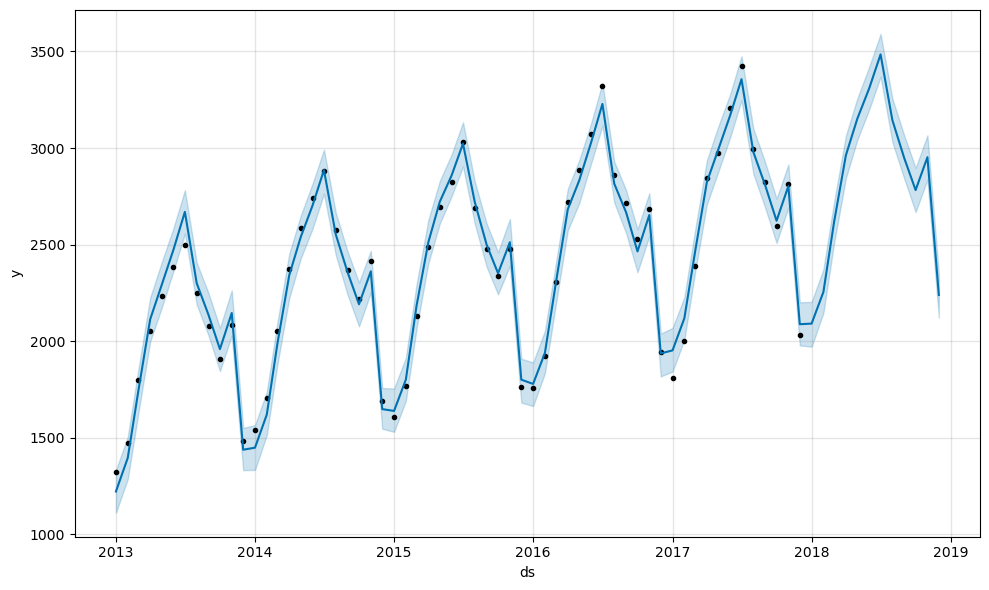

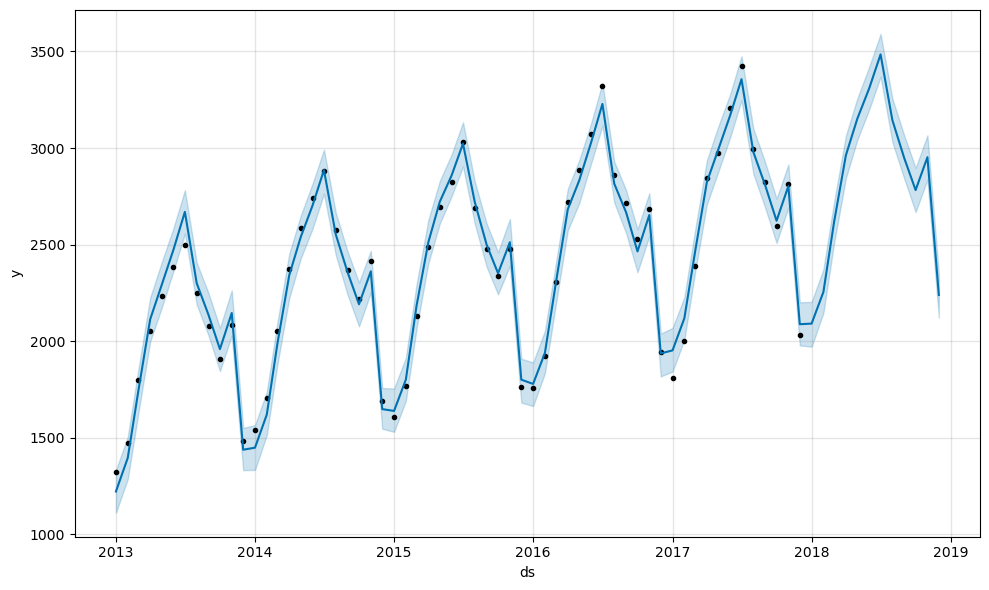

In [88]:
# Model for store 1
store_1 = store_1.rename(columns={'date': 'ds', 'store1_sales': 'y'})
s1_model = Prophet(interval_width=0.95)# setting the uncertainity interval to 95%
s1_model.fit(store_1)

# generating 36 monthly timestamps ; here we are working with monthly data
future_dates1=s1_model.make_future_dataframe(periods=12, freq='MS')# MS start of the month
print(future_dates1.tail())

# Getting the subset of output to the columns most relevant to forecasting
forecast1=s1_model.predict(future_dates1)
print("The forecasted values of Store 1:\n ",forecast1[['ds','yhat','yhat_lower','yhat_upper']].head())
# yhat : predicted value of y
# yhat lower : the lower bound of our forecasts
# yhat upper : the upper bound of our forecasts

# plot the results of forecasts for store 1
s1_model.plot(forecast1, uncertainty=True)


* Black dots :  observed values of time series
* Blue line : forecasted values
* Blue shaded regions : uncertainty intervals of forecast

#### Plotting the forecasted components of store 1

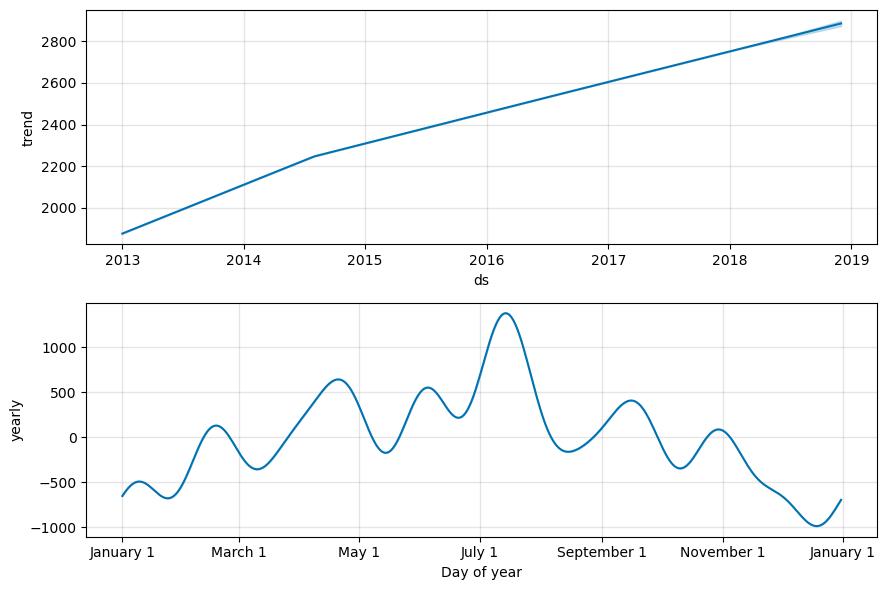

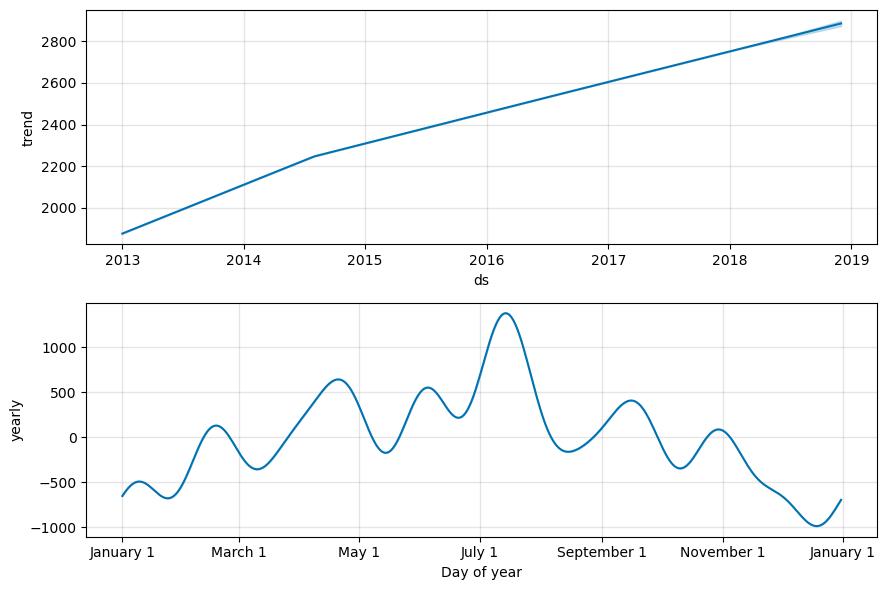

In [89]:
s1_model.plot_components(forecast1)


Inferences from the above pot:
* The monthly sales of store 1 has been linearly increasing over time.
* Most sales occurs during July and August.

In [90]:
# importing libraries for cross validation
from prophet.diagnostics import cross_validation

In [91]:
# Getting cross validation values
s1_cv = cross_validation(s1_model,initial='730 days', period='180 days', horizon = '365 days',disable_tqdm=True)
s1_cv.head()


23:10:31 - cmdstanpy - INFO - Chain [1] start processing
23:10:52 - cmdstanpy - INFO - Chain [1] done processing
23:10:52 - cmdstanpy - INFO - Chain [1] start processing
23:10:52 - cmdstanpy - INFO - Chain [1] done processing
23:10:52 - cmdstanpy - INFO - Chain [1] start processing
23:10:53 - cmdstanpy - INFO - Chain [1] done processing
23:10:53 - cmdstanpy - INFO - Chain [1] start processing
23:10:53 - cmdstanpy - INFO - Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper            y     cutoff
0 2015-07-01  2955.332349  2943.173320  2969.601241  3031.258065 2015-06-10
1 2015-08-01  2558.441889  2518.887894  2602.864171  2691.677419 2015-06-10
2 2015-09-01  2335.642708  2255.522762  2415.128972  2479.633333 2015-06-10
3 2015-10-01  2275.174202  2152.282680  2396.958066  2339.354839 2015-06-10
4 2015-11-01  2566.361675  2393.600376  2733.707647  2476.400000 2015-06-10

In [92]:
# Saving the real values and forcasted values to a new dataframe
metric_s1=forecast1.set_index('ds')[['yhat']].join(store_1.set_index('ds').y).reset_index()
metric_s1.dropna(inplace=True)
# Mean squared error and R squared error
m_s1=round(mean_squared_error(metric_s1.y,metric_s1.yhat),2)
rm_s1=round(np.sqrt(m_s1),2)
print('The mean squared error for Store 1 :', m_s1)
print('The root mean squared error for Store 1 :', rm_s1)

The mean squared error for Store 1 : 3287.22
The root mean squared error for Store 1 : 57.33


### Store 2

23:10:54 - cmdstanpy - INFO - Chain [1] start processing
23:10:54 - cmdstanpy - INFO - Chain [1] done processing


The forecasted values of Store 2 : 
           ds         yhat   yhat_lower   yhat_upper
0 2013-01-01  1730.256186  1579.933198  1892.495575
1 2013-02-01  2002.244092  1845.192766  2162.096408
2 2013-03-01  2494.732363  2322.216420  2651.187059
3 2013-04-01  3005.905587  2840.518286  3159.966219
4 2013-05-01  3249.148042  3086.615542  3397.905315


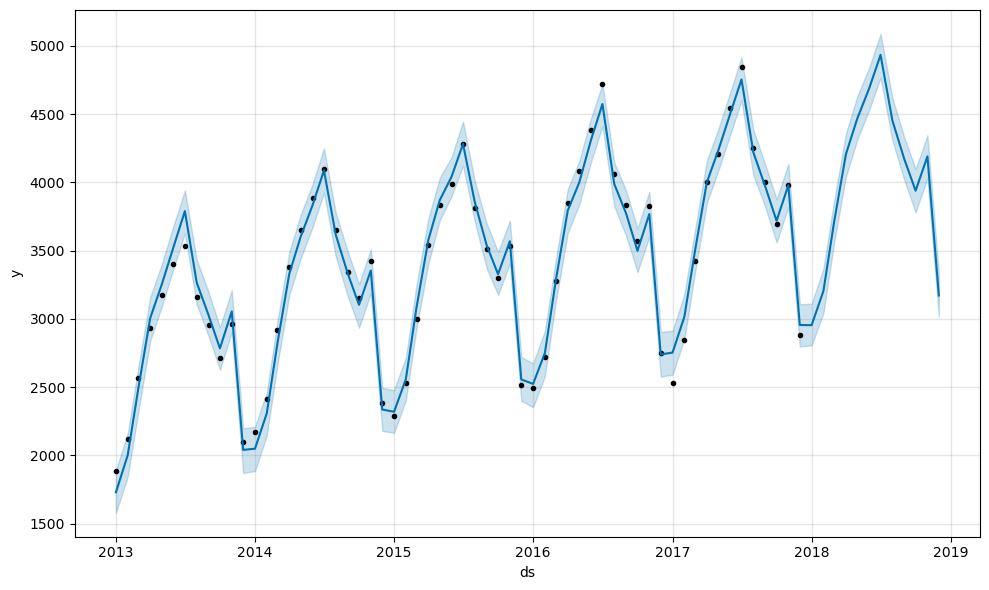

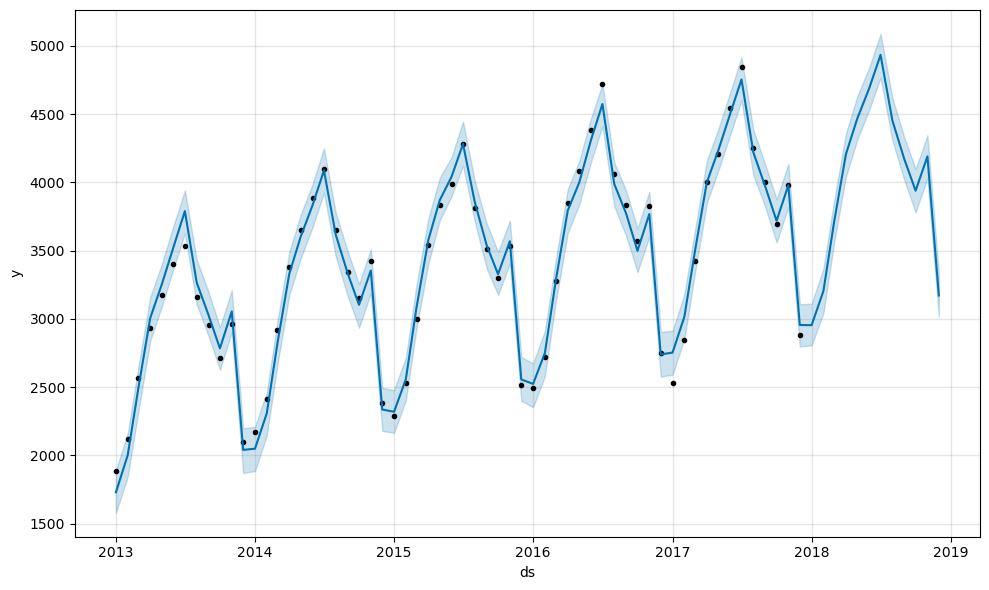

In [93]:
# Model for store 2
store_2 = store_2.rename(columns={'date': 'ds', 'store2_sales': 'y'})
s2_model = Prophet(interval_width=0.95)
s2_model.fit(store_2)

# generating 36 monthly timestamps ; here we are working with monthly data
future_dates2=s2_model.make_future_dataframe(periods=12, freq='MS')

# Getting the subset of output to the columns most relevant to forecasting
forecast2=s2_model.predict(future_dates2)
print("The forecasted values of Store 2 : \n",forecast2[['ds','yhat','yhat_lower','yhat_upper']].head())
# plot the results of forecasts for store 2
s2_model.plot(forecast2, uncertainty=True)

#### Plotting the forecasted components of store 2

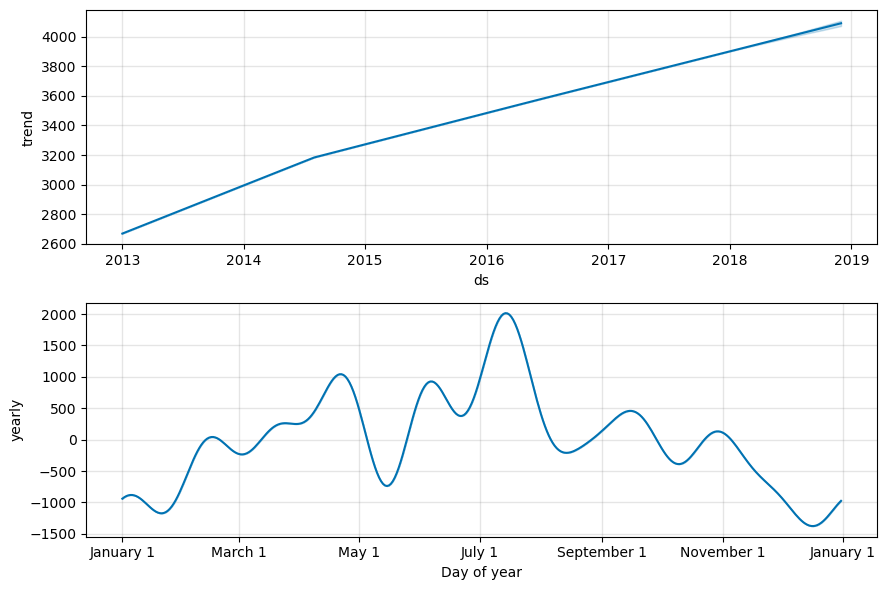

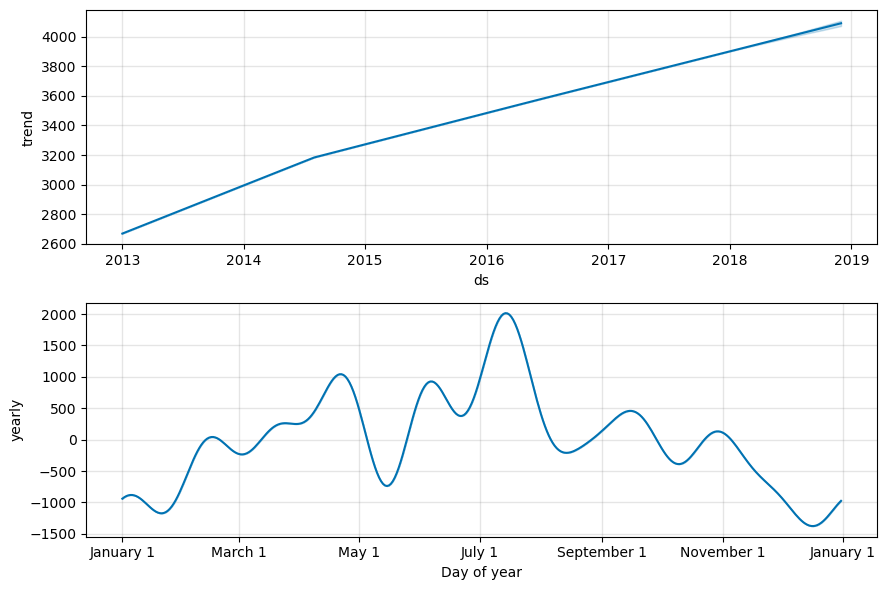

In [94]:
s2_model.plot_components(forecast2)

 The inferences the we get for store 2 from the above plot is also similar to the ones observed earlier for store 1.
 * The monthly sales of store 2 has been linearly increasing over time.
 * Most sales occurs during July and August.
 

In [95]:
# Getting cross validation values
s2_cv = cross_validation(s2_model,initial='730 days', period='180 days', horizon = '365 days',disable_tqdm=True)
s2_cv.head()


23:10:55 - cmdstanpy - INFO - Chain [1] start processing
23:11:14 - cmdstanpy - INFO - Chain [1] done processing
23:11:15 - cmdstanpy - INFO - Chain [1] start processing
23:11:15 - cmdstanpy - INFO - Chain [1] done processing
23:11:15 - cmdstanpy - INFO - Chain [1] start processing
23:11:16 - cmdstanpy - INFO - Chain [1] done processing
23:11:16 - cmdstanpy - INFO - Chain [1] start processing
23:11:17 - cmdstanpy - INFO - Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper            y     cutoff
0 2015-07-01  4219.273643  4195.417429  4244.606894  4284.096774 2015-06-10
1 2015-08-01  3640.030761  3567.841567  3717.998266  3813.741935 2015-06-10
2 2015-09-01  3324.574429  3186.042063  3471.592939  3514.100000 2015-06-10
3 2015-10-01  3283.634735  3068.146552  3518.407719  3298.645161 2015-06-10
4 2015-11-01  3642.408781  3348.356875  3952.192792  3532.833333 2015-06-10

In [96]:
# Saving the real values and forcasted values to a new dataframe
metric_s2=forecast2.set_index('ds')[['yhat']].join(store_2.set_index('ds').y).reset_index()
metric_s2.dropna(inplace=True)
# Mean squared error and R squared error
m_s2=mean_squared_error(metric_s2.y,metric_s2.yhat)
rm_s2=np.sqrt(m_s2)
print('The mean squared error for Store 2 :', m_s2)
print('The root mean squared error for Store 2 :', rm_s2)

The mean squared error for Store 2 : 6692.464162179974
The root mean squared error for Store 2 : 81.80748231170529


### Store 3

23:11:17 - cmdstanpy - INFO - Chain [1] start processing
23:11:17 - cmdstanpy - INFO - Chain [1] done processing


The forecasted values of Store 3 : 
           ds         yhat   yhat_lower   yhat_upper
0 2013-01-01  1542.243458  1405.855781  1680.842813
1 2013-02-01  1762.017642  1625.932980  1904.127746
2 2013-03-01  2200.381556  2055.872118  2342.000901
3 2013-04-01  2666.951034  2522.017874  2809.964146
4 2013-05-01  2877.844765  2747.660372  3016.373012


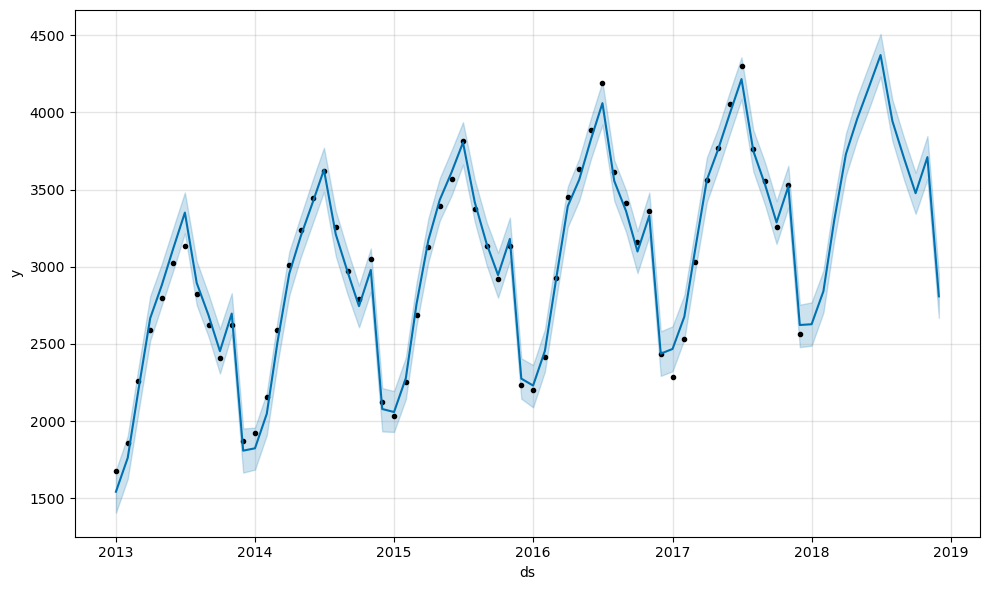

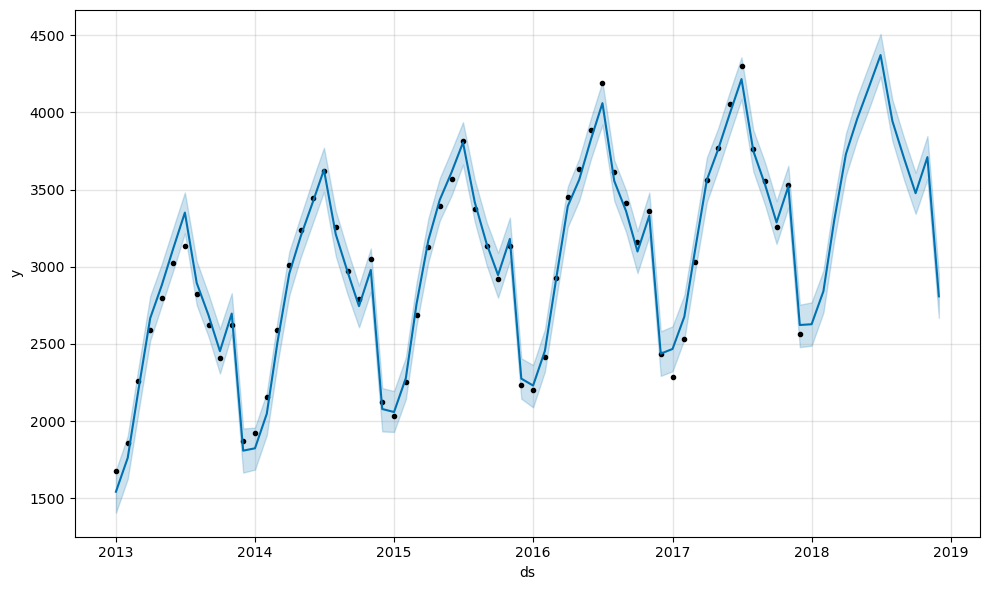

In [97]:
# Model for store 3
store_3 = store_3.rename(columns={'date': 'ds', 'store3_sales': 'y'})
s3_model = Prophet(interval_width=0.95)
s3_model.fit(store_3)

# generating 36 monthly timestamps ; here we are working with monthly data
future_dates3=s3_model.make_future_dataframe(periods=12, freq='MS')

# Getting the subset of output to the columns most relevant to forecasting
forecast3=s3_model.predict(future_dates3)
print("The forecasted values of Store 3 : \n",forecast3[['ds','yhat','yhat_lower','yhat_upper']].head())
# plot the results of forecasts for store 3
s3_model.plot(forecast3, uncertainty=True)

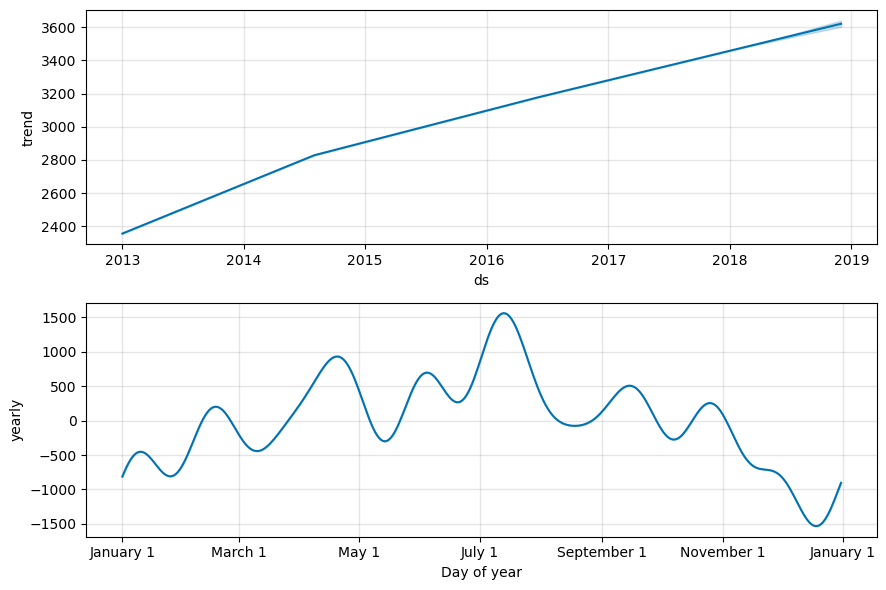

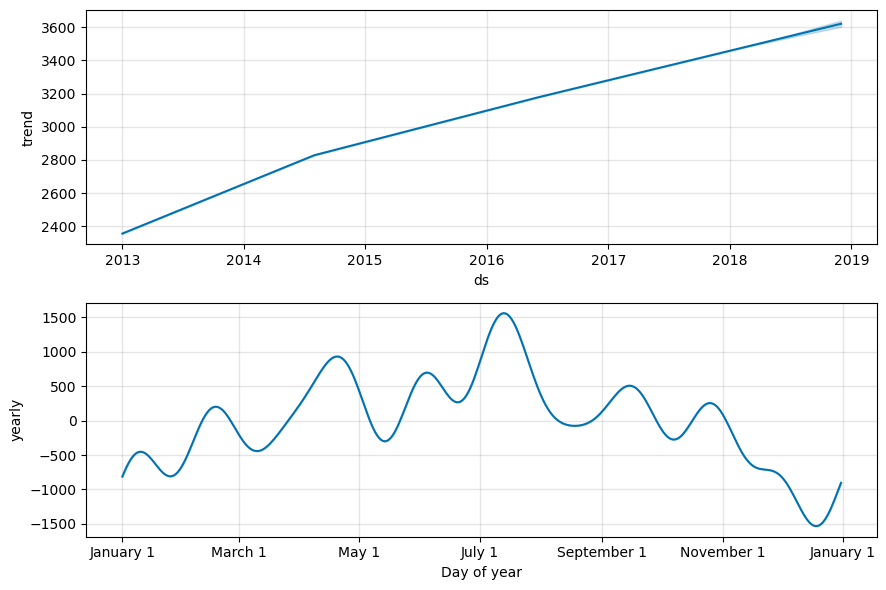

In [98]:
# Plotting the forecasted components of Store 3
s3_model.plot_components(forecast3)

In [99]:
# Getting cross validation values
s3_cv = cross_validation(s3_model,initial='730 days', period='180 days', horizon = '365 days',disable_tqdm=True)
s3_cv.head()


23:11:19 - cmdstanpy - INFO - Chain [1] start processing
23:11:39 - cmdstanpy - INFO - Chain [1] done processing
23:11:39 - cmdstanpy - INFO - Chain [1] start processing
23:11:40 - cmdstanpy - INFO - Chain [1] done processing
23:11:40 - cmdstanpy - INFO - Chain [1] start processing
23:11:40 - cmdstanpy - INFO - Chain [1] done processing
23:11:40 - cmdstanpy - INFO - Chain [1] start processing
23:11:41 - cmdstanpy - INFO - Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper            y     cutoff
0 2015-07-01  3785.184662  3768.982472  3807.033726  3815.516129 2015-06-10
1 2015-08-01  3364.948120  3312.216812  3428.463406  3371.612903 2015-06-10
2 2015-09-01  3026.793696  2924.203962  3138.855871  3131.866667 2015-06-10
3 2015-10-01  2948.056939  2800.347044  3115.087093  2919.387097 2015-06-10
4 2015-11-01  3357.818629  3140.316066  3584.424160  3137.733333 2015-06-10

In [100]:
# Saving the real values and forcasted values to a new dataframe
metric_s3=forecast3.set_index('ds')[['yhat']].join(store_3.set_index('ds').y).reset_index()
metric_s3.dropna(inplace=True)
# Mean squared error and R squared error
m_s3=mean_squared_error(metric_s3.y,metric_s3.yhat)
rm_s3=np.sqrt(m_s3)
print('The mean squared error for Store 3 :', m_s3)
print('The root mean squared error for Store 3 :', rm_s3)

The mean squared error for Store 3 : 5037.582789556364
The root mean squared error for Store 3 : 70.97593105804505


### Store 4

23:11:41 - cmdstanpy - INFO - Chain [1] start processing
23:11:42 - cmdstanpy - INFO - Chain [1] done processing


The forecasted values of Store 4 : 
           ds         yhat   yhat_lower   yhat_upper
0 2013-01-01  1420.672251  1294.245321  1547.348454
1 2013-02-01  1634.958697  1512.365139  1767.546348
2 2013-03-01  2023.385518  1896.948224  2146.442077
3 2013-04-01  2451.029052  2330.918274  2575.554448
4 2013-05-01  2662.593598  2538.676403  2785.592865


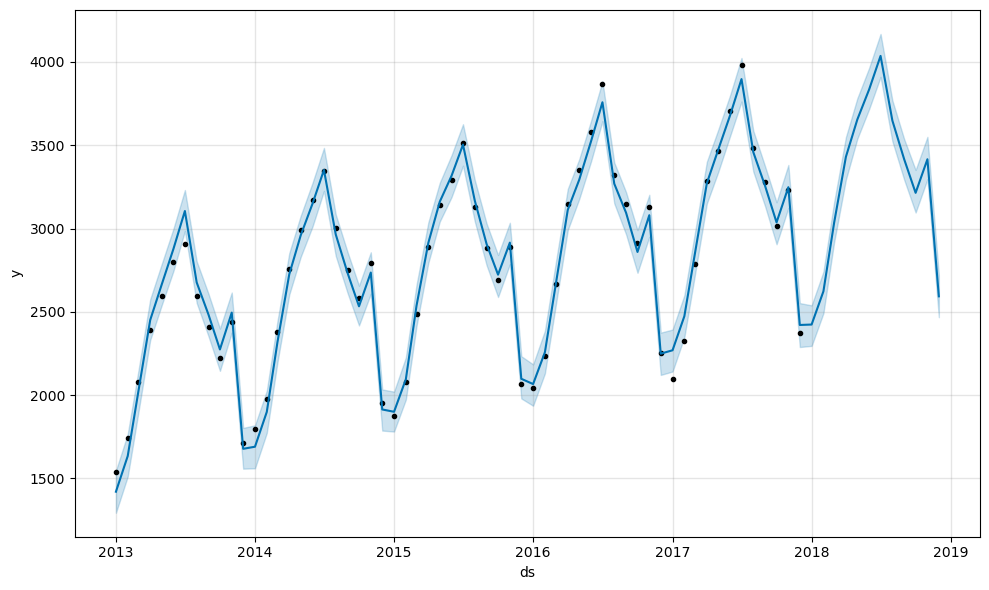

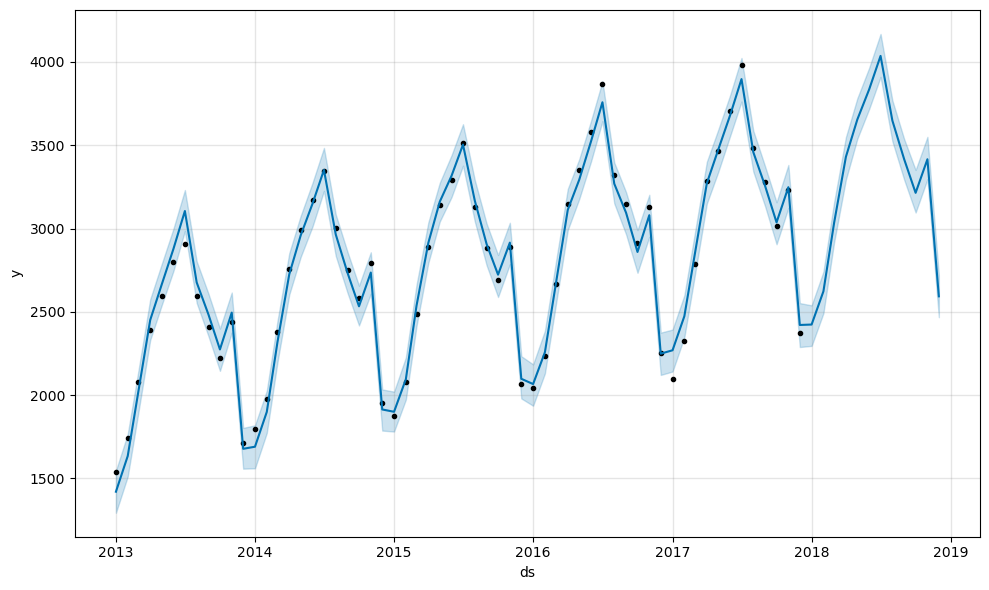

In [101]:
# Model for store 3
store_4 = store_4.rename(columns={'date': 'ds', 'store4_sales': 'y'})
s4_model = Prophet(interval_width=0.95)
s4_model.fit(store_4)

# generating 36 monthly timestamps ; here we are working with monthly data
future_dates4=s4_model.make_future_dataframe(periods=12, freq='MS')

# Getting the subset of output to the columns most relevant to forecasting
forecast4=s4_model.predict(future_dates4)
print("The forecasted values of Store 4 : \n",forecast4[['ds','yhat','yhat_lower','yhat_upper']].head())
# plot the results of forecasts for store 2
s4_model.plot(forecast4, uncertainty=True)

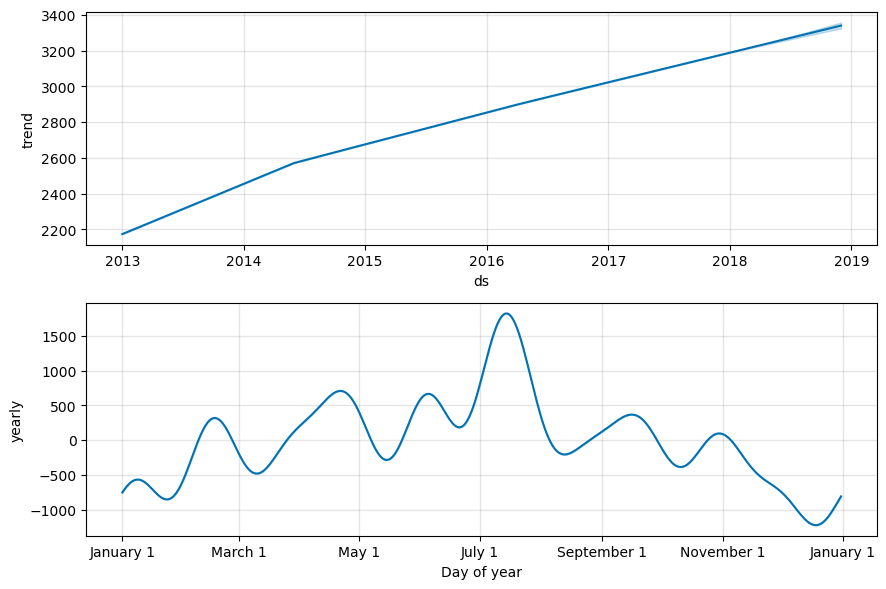

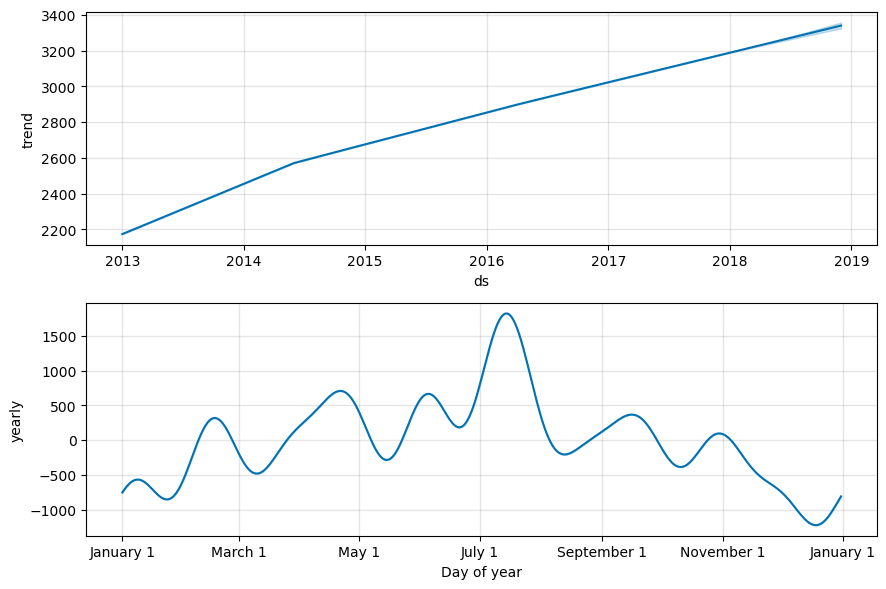

In [102]:
# Plotting the forecasted components of Store 4
s4_model.plot_components(forecast4)

In [103]:
# Getting cross validation values
s4_cv = cross_validation(s4_model,initial='730 days', period='180 days', horizon = '365 days',disable_tqdm=True)
s4_cv.head()


23:11:43 - cmdstanpy - INFO - Chain [1] start processing
23:12:04 - cmdstanpy - INFO - Chain [1] done processing
23:12:04 - cmdstanpy - INFO - Chain [1] start processing
23:12:04 - cmdstanpy - INFO - Chain [1] done processing
23:12:04 - cmdstanpy - INFO - Chain [1] start processing
23:12:05 - cmdstanpy - INFO - Chain [1] done processing
23:12:05 - cmdstanpy - INFO - Chain [1] start processing
23:12:06 - cmdstanpy - INFO - Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper            y     cutoff
0 2015-07-01  3533.206303  3511.633781  3554.092735  3513.580645 2015-06-10
1 2015-08-01  3158.357015  3093.507937  3225.655925  3128.064516 2015-06-10
2 2015-09-01  2866.585642  2751.483728  2998.596894  2882.233333 2015-06-10
3 2015-10-01  2820.157525  2645.197927  3005.004648  2692.677419 2015-06-10
4 2015-11-01  3113.709245  2874.008603  3380.589790  2889.900000 2015-06-10

In [104]:
# Saving the real values and forcasted values to a new dataframe
metric_s4=forecast4.set_index('ds')[['yhat']].join(store_4.set_index('ds').y).reset_index()
metric_s4.dropna(inplace=True)
# Mean squared error and R squared error
m_s4=mean_squared_error(metric_s4.y,metric_s4.yhat)
rm_s4=np.sqrt(m_s4)
print('The mean squared error for Store 4 :', m_s4)
print('The root mean squared error for Store 4 :', rm_s4)

The mean squared error for Store 4 : 4120.014960197451
The root mean squared error for Store 4 : 64.18734267904733


### Store 5

23:12:06 - cmdstanpy - INFO - Chain [1] start processing
23:12:06 - cmdstanpy - INFO - Chain [1] done processing


The forecasted values of Store 5 : 
           ds         yhat   yhat_lower   yhat_upper
0 2013-01-01  1021.429702   932.474776  1120.186493
1 2013-02-01  1179.425608  1084.089837  1273.916324
2 2013-03-01  1471.807783  1370.577180  1565.893826
3 2013-04-01  1776.899945  1684.864391  1882.111428
4 2013-05-01  1925.381747  1833.620476  2013.073295


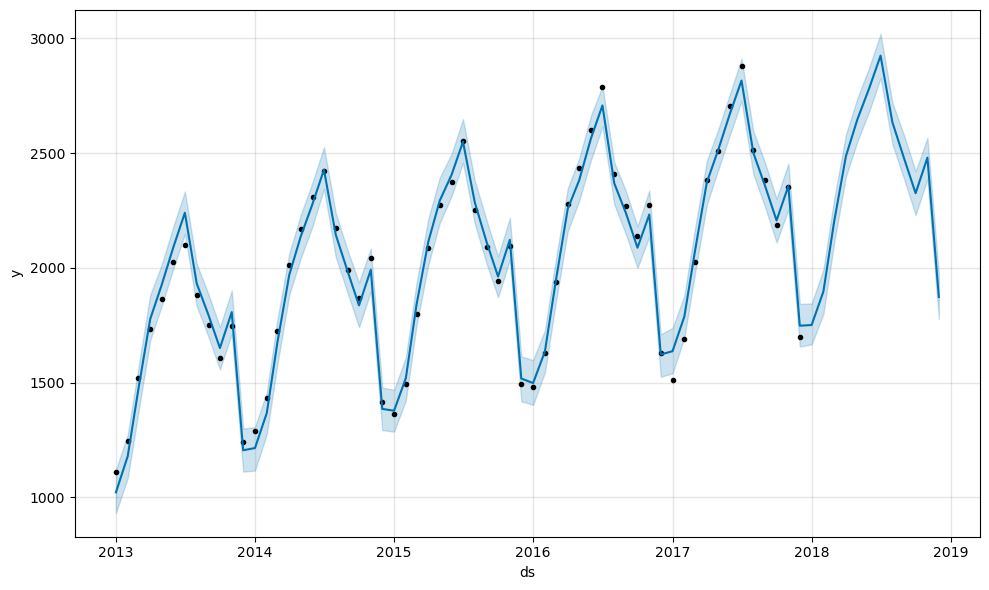

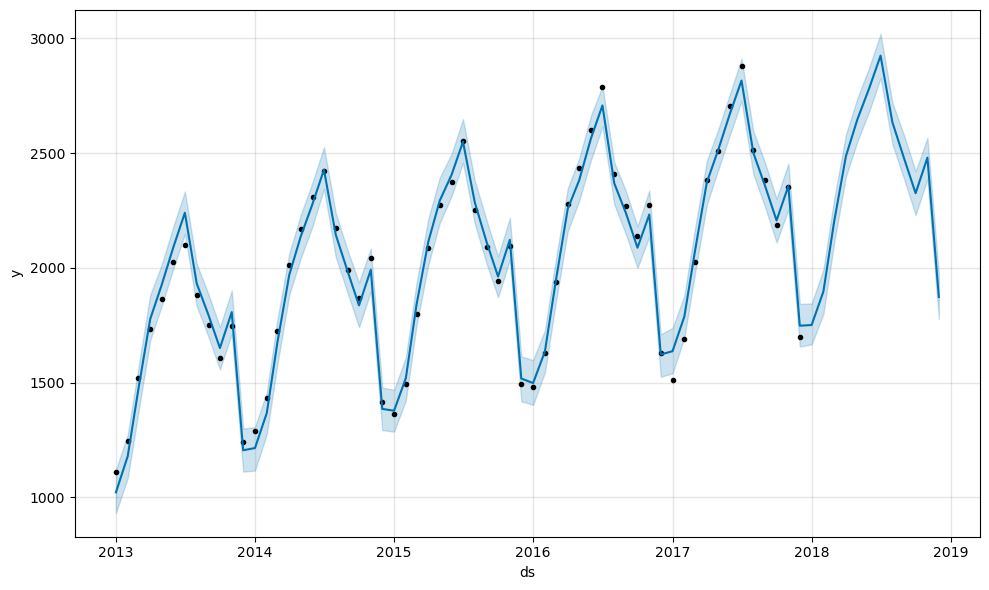

In [105]:
# Model for store 3
store_5 = store_5.rename(columns={'date': 'ds', 'store5_sales': 'y'})
s5_model = Prophet(interval_width=0.95)
s5_model.fit(store_5)

# generating 36 monthly timestamps ; here we are working with monthly data
future_dates5=s5_model.make_future_dataframe(periods=12, freq='MS')

# Getting the subset of output to the columns most relevant to forecasting
forecast5=s5_model.predict(future_dates5)
print("The forecasted values of Store 5 : \n",forecast5[['ds','yhat','yhat_lower','yhat_upper']].head())
# plot the results of forecasts for store 5
s5_model.plot(forecast5, uncertainty=True)

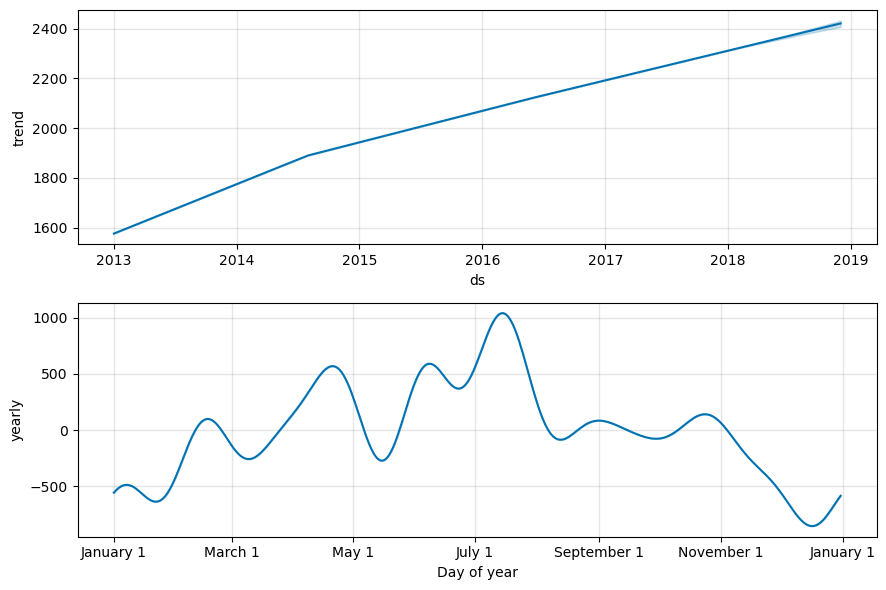

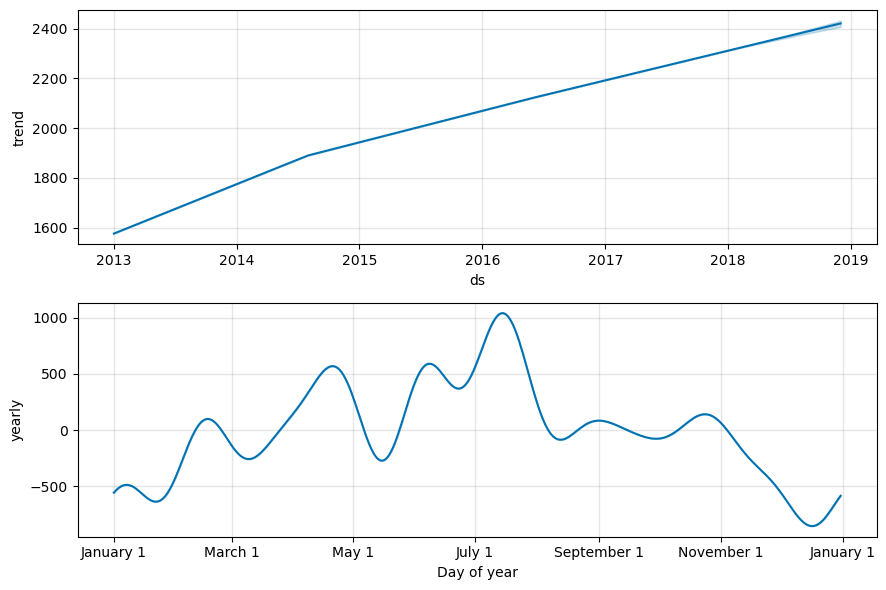

In [106]:
# Plotting the forecasted components of Store 5
s5_model.plot_components(forecast5)

In [107]:
# Getting cross validation values
s5_cv = cross_validation(s5_model,initial='730 days', period='180 days', horizon = '365 days',disable_tqdm=True)
s5_cv.head()


23:12:07 - cmdstanpy - INFO - Chain [1] start processing
23:12:27 - cmdstanpy - INFO - Chain [1] done processing
23:12:27 - cmdstanpy - INFO - Chain [1] start processing
23:12:28 - cmdstanpy - INFO - Chain [1] done processing
23:12:28 - cmdstanpy - INFO - Chain [1] start processing
23:12:28 - cmdstanpy - INFO - Chain [1] done processing
23:12:28 - cmdstanpy - INFO - Chain [1] start processing
23:12:29 - cmdstanpy - INFO - Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper            y     cutoff
0 2015-07-01  2505.189537  2489.974503  2522.214152  2554.741935 2015-06-10
1 2015-08-01  2200.983113  2151.644855  2255.286095  2251.870968 2015-06-10
2 2015-09-01  1963.167023  1872.856537  2060.763626  2091.733333 2015-06-10
3 2015-10-01  1916.269452  1784.820365  2068.961785  1943.000000 2015-06-10
4 2015-11-01  2193.991618  2015.021581  2402.767914  2096.633333 2015-06-10

In [108]:
# Saving the real values and forcasted values to a new dataframe
metric_s5=forecast5.set_index('ds')[['yhat']].join(store_5.set_index('ds').y).reset_index()
metric_s5.dropna(inplace=True)
# Mean squared error and R squared error
m_s5=mean_squared_error(metric_s5.y,metric_s5.yhat)
rm_s5=np.sqrt(m_s5)
print('The mean squared error for Store 5 :', m_s1)
print('The root mean squared error for Store 5 :', rm_s5)

The mean squared error for Store 5 : 3287.22
The root mean squared error for Store 5 : 48.12269514992256


### Store 6

23:12:29 - cmdstanpy - INFO - Chain [1] start processing
23:12:29 - cmdstanpy - INFO - Chain [1] done processing


The forecasted values of Store 6 : 
           ds         yhat   yhat_lower   yhat_upper
0 2013-01-01  1030.355391   932.816142  1121.975305
1 2013-02-01  1174.795283  1079.682730  1267.481360
2 2013-03-01  1471.195163  1374.941701  1561.035458
3 2013-04-01  1776.814385  1682.762847  1866.414788
4 2013-05-01  1919.723577  1823.753558  2013.515097


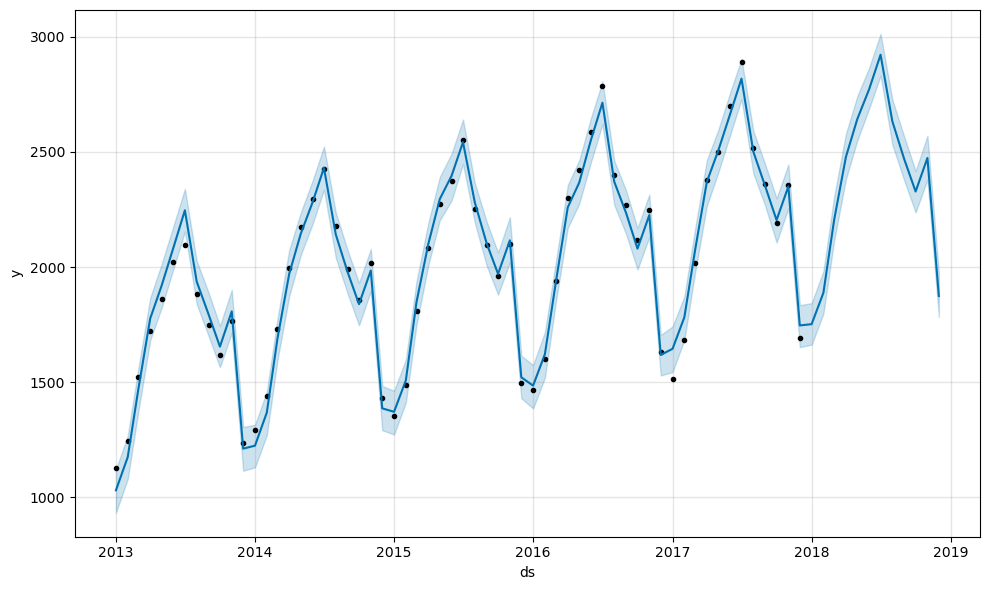

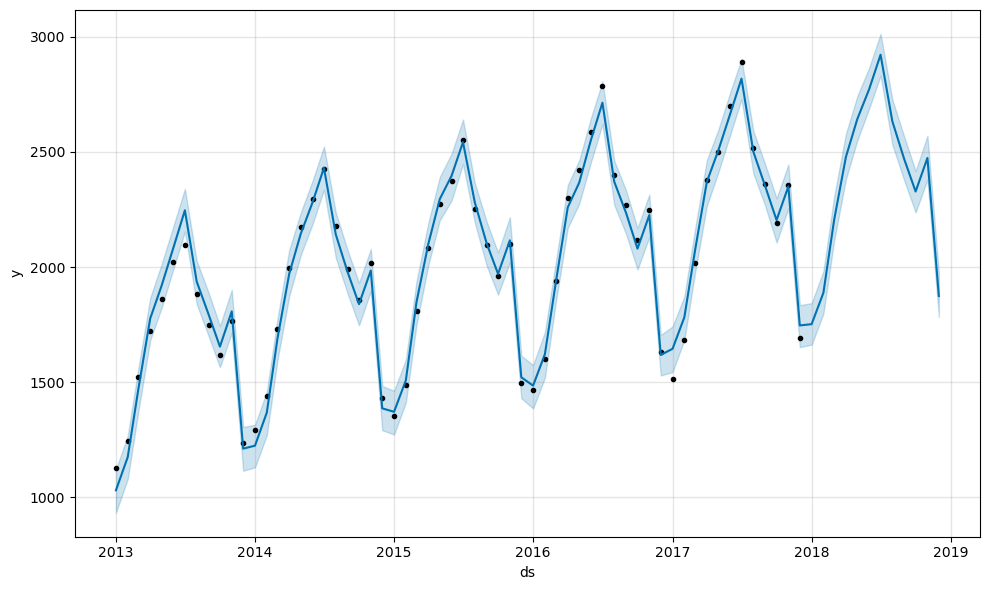

In [109]:
# Model for store 3
store_6 = store_6.rename(columns={'date': 'ds', 'store6_sales': 'y'})
s6_model = Prophet(interval_width=0.95)
s6_model.fit(store_6)

# generating 36 monthly timestamps ; here we are working with monthly data
future_dates6=s6_model.make_future_dataframe(periods=12, freq='MS')

# Getting the subset of output to the columns most relevant to forecasting
forecast6=s6_model.predict(future_dates6)
print("The forecasted values of Store 6 : \n",forecast6[['ds','yhat','yhat_lower','yhat_upper']].head())
# plot the results of forecasts for store 6
s6_model.plot(forecast6, uncertainty=True)

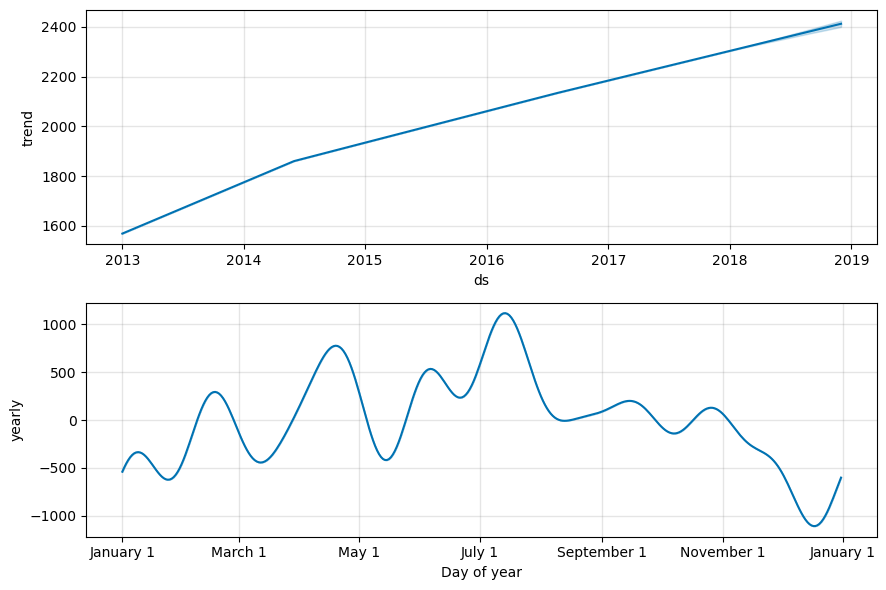

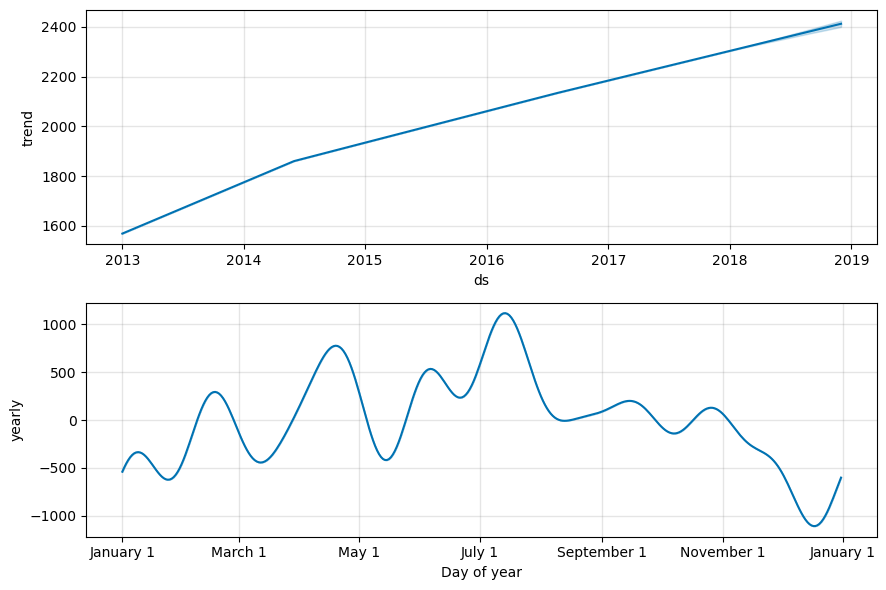

In [110]:
# Plotting the forecasted components of Store 6
s6_model.plot_components(forecast6)

In [111]:
# Getting cross validation values
s6_cv = cross_validation(s6_model,initial='730 days', period='180 days', horizon = '365 days',disable_tqdm=True)
s6_cv.head()


23:12:30 - cmdstanpy - INFO - Chain [1] start processing
23:12:53 - cmdstanpy - INFO - Chain [1] done processing
23:12:53 - cmdstanpy - INFO - Chain [1] start processing
23:12:54 - cmdstanpy - INFO - Chain [1] done processing
23:12:54 - cmdstanpy - INFO - Chain [1] start processing
23:12:54 - cmdstanpy - INFO - Chain [1] done processing
23:12:55 - cmdstanpy - INFO - Chain [1] start processing
23:12:55 - cmdstanpy - INFO - Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper            y     cutoff
0 2015-07-01  2570.168464  2556.352773  2584.446387  2552.354839 2015-06-10
1 2015-08-01  2297.961047  2254.752531  2342.263857  2252.419355 2015-06-10
2 2015-09-01  2094.733185  2015.359705  2170.390346  2093.933333 2015-06-10
3 2015-10-01  2025.989451  1903.038900  2145.920997  1963.290323 2015-06-10
4 2015-11-01  2275.337970  2107.670770  2452.173959  2098.833333 2015-06-10

In [112]:
# Saving the real values and forcasted values to a new dataframe
metric_s6=forecast6.set_index('ds')[['yhat']].join(store_6.set_index('ds').y).reset_index()
metric_s6.dropna(inplace=True)
# Mean squared error and R squared error
m_s6=mean_squared_error(metric_s6.y,metric_s6.yhat)
rm_s6=np.sqrt(m_s6)
print('The mean squared error for Store 6 :', m_s6)
print('The root mean squared error for Store 6 :', rm_s6)

The mean squared error for Store 6 : 2303.6902478561965
The root mean squared error for Store 6 : 47.99677330671507


### Store 7

23:12:55 - cmdstanpy - INFO - Chain [1] start processing
23:12:56 - cmdstanpy - INFO - Chain [1] done processing


The forecasted values of Store 7 : 
           ds         yhat   yhat_lower   yhat_upper
0 2013-01-01   936.509564   856.206799  1024.185324
1 2013-02-01  1081.381606   997.183560  1160.090533
2 2013-03-01  1346.735639  1262.103780  1432.712275
3 2013-04-01  1624.711789  1539.368250  1710.833406
4 2013-05-01  1759.520948  1678.891192  1841.973377


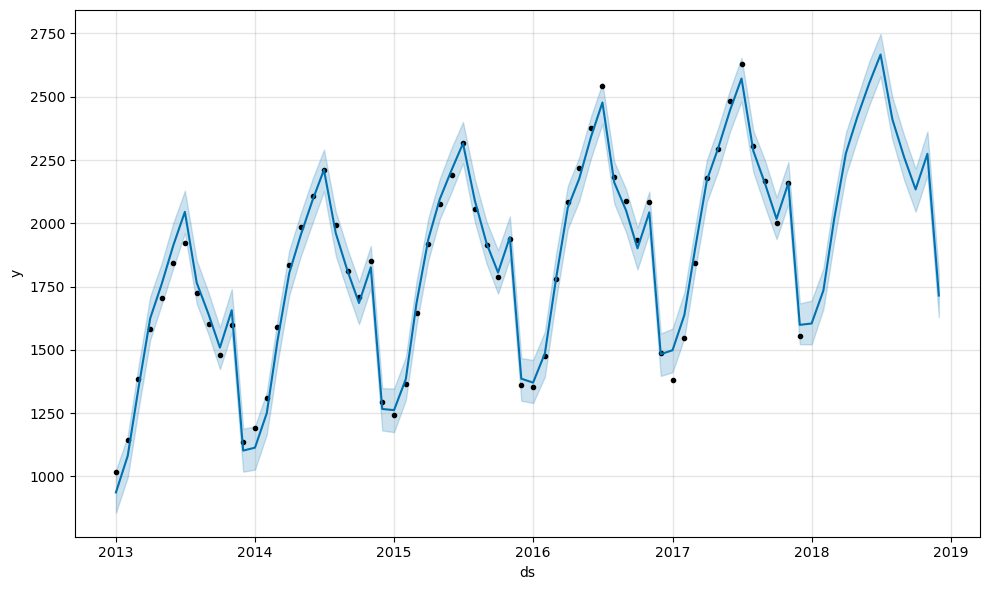

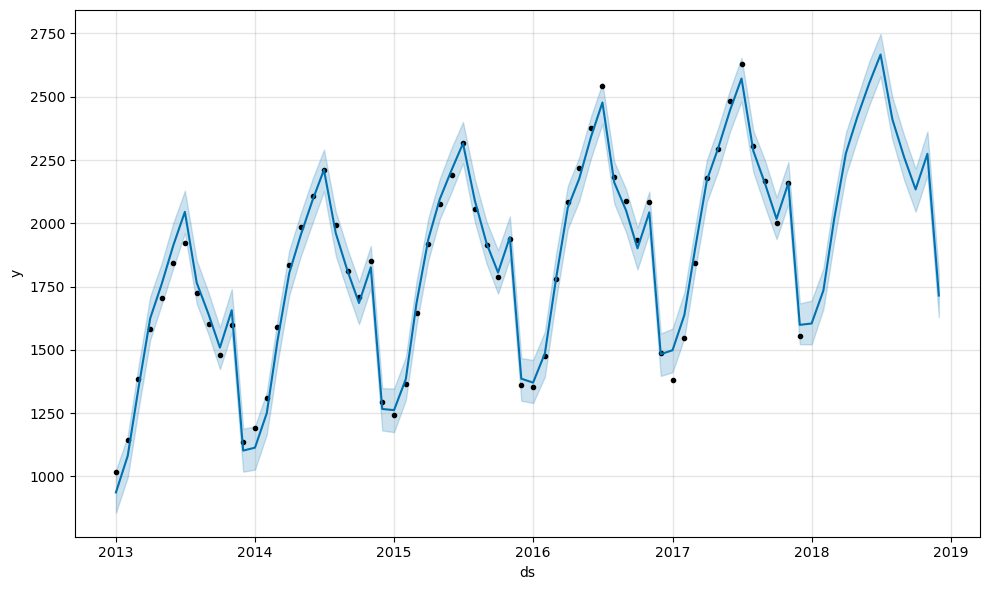

In [113]:
# Model for store 7
store_7 = store_7.rename(columns={'date': 'ds', 'store7_sales': 'y'})
s7_model = Prophet(interval_width=0.95)
s7_model.fit(store_7)

# generating 36 monthly timestamps ; here we are working with monthly data
future_dates7=s7_model.make_future_dataframe(periods=12, freq='MS')

# Getting the subset of output to the columns most relevant to forecasting
forecast7=s7_model.predict(future_dates7)
print("The forecasted values of Store 7 : \n",forecast7[['ds','yhat','yhat_lower','yhat_upper']].head())
# plot the results of forecasts for store 7
s7_model.plot(forecast7, uncertainty=True)

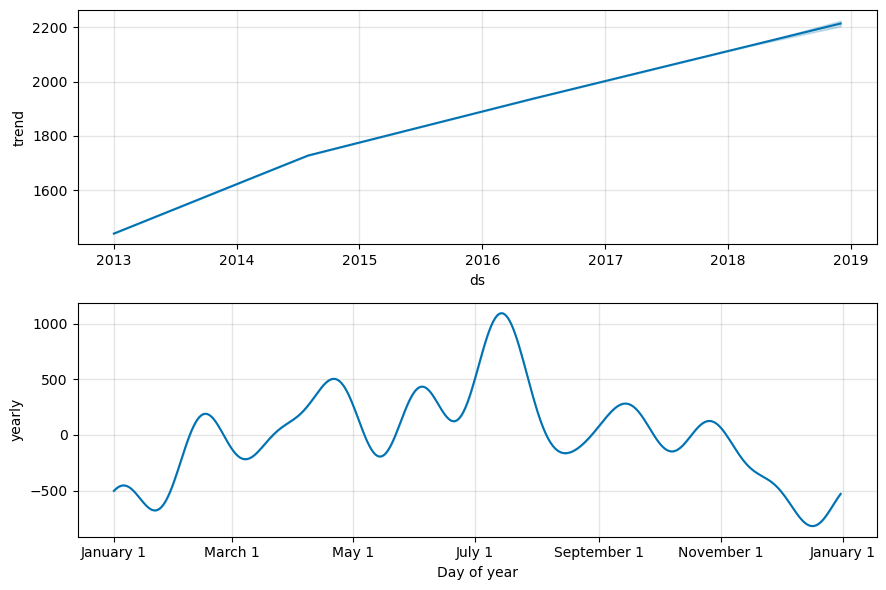

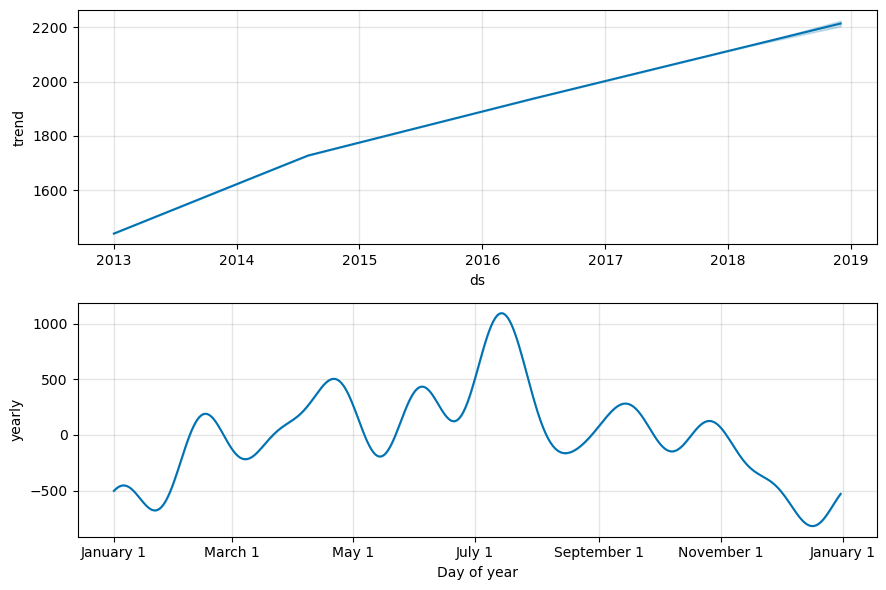

In [114]:
# Plotting the forecasted components of Store 7
s7_model.plot_components(forecast7)

In [115]:
# Getting cross validation values
s7_cv = cross_validation(s7_model,initial='730 days', period='180 days', horizon = '365 days',disable_tqdm=True)
s7_cv.head()


23:12:57 - cmdstanpy - INFO - Chain [1] start processing
23:13:16 - cmdstanpy - INFO - Chain [1] done processing
23:13:16 - cmdstanpy - INFO - Chain [1] start processing
23:13:17 - cmdstanpy - INFO - Chain [1] done processing
23:13:17 - cmdstanpy - INFO - Chain [1] start processing
23:13:17 - cmdstanpy - INFO - Chain [1] done processing
23:13:17 - cmdstanpy - INFO - Chain [1] start processing
23:13:18 - cmdstanpy - INFO - Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper            y     cutoff
0 2015-07-01  2292.346559  2279.514108  2305.944309  2319.032258 2015-06-10
1 2015-08-01  2034.811734  1995.190322  2076.445851  2057.967742 2015-06-10
2 2015-09-01  1821.107830  1750.633746  1896.754789  1913.933333 2015-06-10
3 2015-10-01  1810.420027  1698.494019  1926.300115  1788.548387 2015-06-10
4 2015-11-01  2049.466770  1893.117260  2207.302793  1936.733333 2015-06-10

In [116]:
# Saving the real values and forcasted values to a new dataframe
metric_s7=forecast7.set_index('ds')[['yhat']].join(store_7.set_index('ds').y).reset_index()
metric_s7.dropna(inplace=True)
# Mean squared error and R squared error
m_s7=mean_squared_error(metric_s7.y,metric_s7.yhat)
rm_s7=np.sqrt(m_s7)
print('The mean squared error for Store 7 :', m_s7)
print('The root mean squared error for Store 7 :',rm_s7)

The mean squared error for Store 7 : 1901.7486714041656
The root mean squared error for Store 7 : 43.60904345894514


### Store 8

23:13:18 - cmdstanpy - INFO - Chain [1] start processing
23:13:18 - cmdstanpy - INFO - Chain [1] done processing


The forecasted values of Store 8 : 
           ds         yhat   yhat_lower   yhat_upper
0 2013-01-01  1652.418517  1501.580443  1804.265775
1 2013-02-01  1913.156460  1767.007014  2053.703474
2 2013-03-01  2368.919949  2210.187277  2519.150153
3 2013-04-01  2857.894021  2712.364446  3004.573669
4 2013-05-01  3106.604390  2959.922373  3260.169772


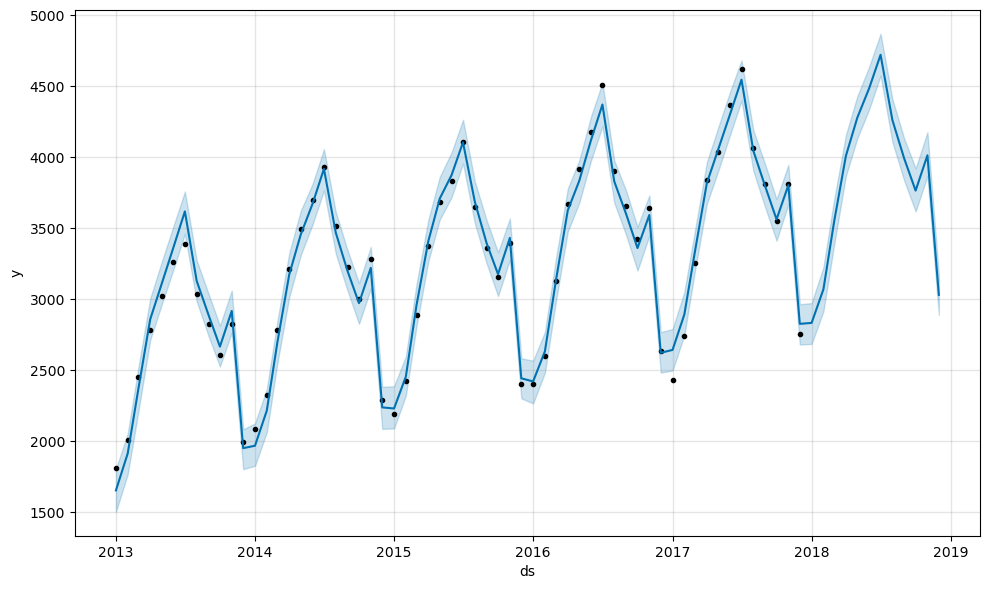

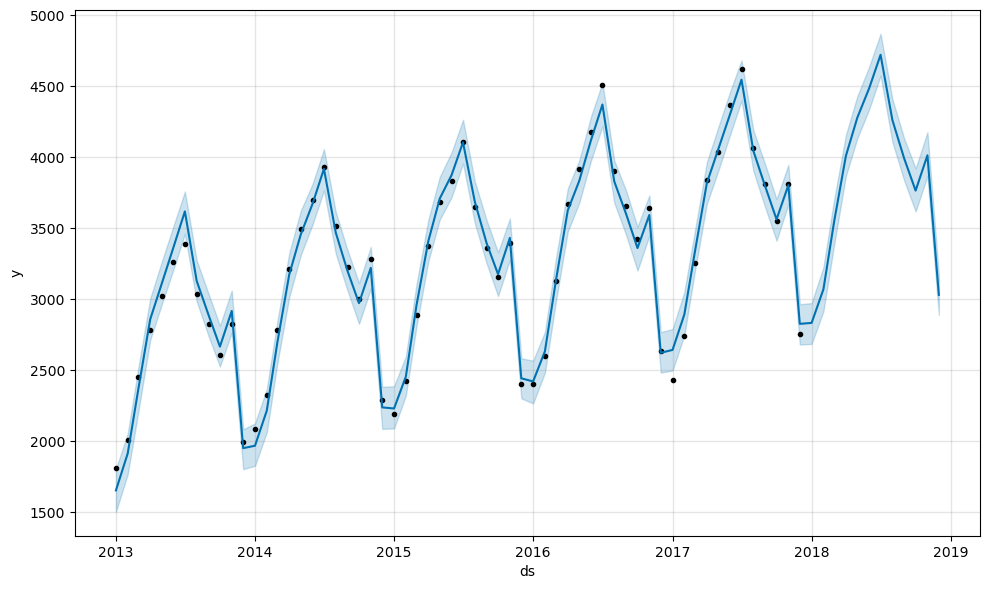

In [117]:
# Model for store 3
store_8 = store_8.rename(columns={'date': 'ds', 'store8_sales': 'y'})
s8_model = Prophet(interval_width=0.95)
s8_model.fit(store_8)

# generating 36 monthly timestamps ; here we are working with monthly data
future_dates8=s8_model.make_future_dataframe(periods=12, freq='MS')

# Getting the subset of output to the columns most relevant to forecasting
forecast8=s8_model.predict(future_dates8)
print("The forecasted values of Store 8 : \n",forecast8[['ds','yhat','yhat_lower','yhat_upper']].head())
# plot the results of forecasts for store 8
s8_model.plot(forecast8, uncertainty=True)

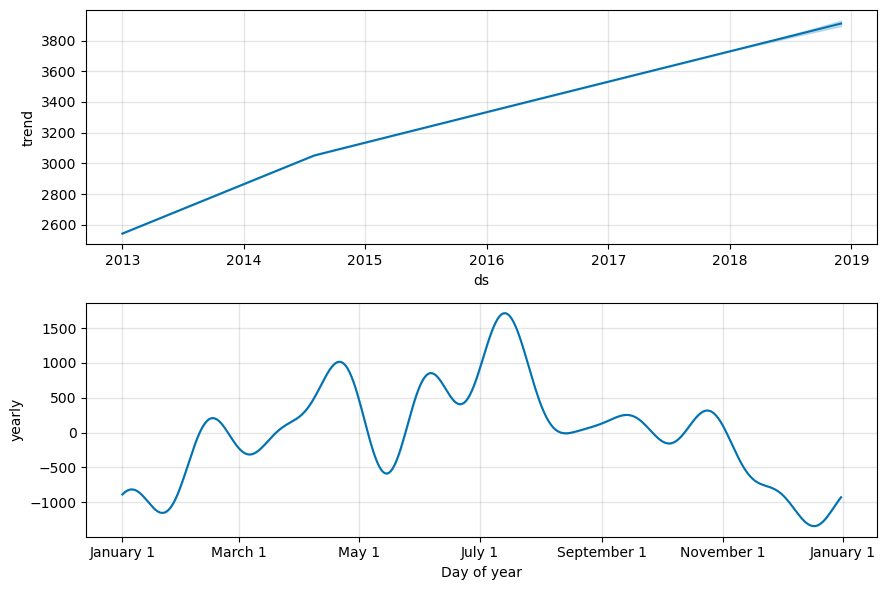

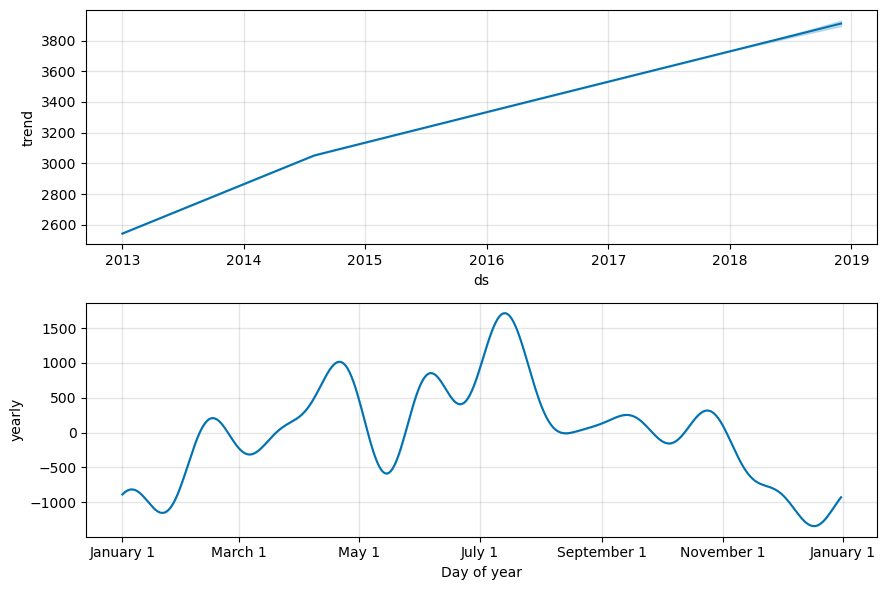

In [118]:
# Plotting the forecasted components of Store 8
s8_model.plot_components(forecast8)

In [119]:
# Getting cross validation values
s8_cv = cross_validation(s8_model,initial='730 days', period='180 days', horizon = '365 days',disable_tqdm=True)
s8_cv.head()


23:13:19 - cmdstanpy - INFO - Chain [1] start processing
23:13:39 - cmdstanpy - INFO - Chain [1] done processing
23:13:39 - cmdstanpy - INFO - Chain [1] start processing
23:13:40 - cmdstanpy - INFO - Chain [1] done processing
23:13:40 - cmdstanpy - INFO - Chain [1] start processing
23:13:40 - cmdstanpy - INFO - Chain [1] done processing
23:13:40 - cmdstanpy - INFO - Chain [1] start processing
23:13:41 - cmdstanpy - INFO - Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper            y     cutoff
0 2015-07-01  4125.789410  4103.530986  4147.433465  4107.225806 2015-06-10
1 2015-08-01  3595.334260  3526.275080  3661.707298  3646.096774 2015-06-10
2 2015-09-01  3201.402956  3072.344186  3324.433334  3360.700000 2015-06-10
3 2015-10-01  3094.017478  2901.289120  3283.572892  3155.516129 2015-06-10
4 2015-11-01  3520.701789  3257.359187  3785.261760  3398.200000 2015-06-10

In [120]:
# Saving the real values and forcasted values to a new dataframe
metric_s8=forecast8.set_index('ds')[['yhat']].join(store_8.set_index('ds').y).reset_index()
metric_s8.dropna(inplace=True)
# Mean squared error and R squared error
m_s8=mean_squared_error(metric_s8.y,metric_s8.yhat)
rm_s8=np.sqrt(m_s8)
print('The mean squared error for Store 8 :', m_s8)
print('The root mean squared error for Store 8 :', rm_s8)

The mean squared error for Store 8 : 5721.267341634001
The root mean squared error for Store 8 : 75.63905962949302


### Store 9

23:13:41 - cmdstanpy - INFO - Chain [1] start processing
23:13:42 - cmdstanpy - INFO - Chain [1] done processing


The forecasted values of Store 9 : 
           ds         yhat   yhat_lower   yhat_upper
0 2013-01-01  1423.079084  1298.119581  1547.796819
1 2013-02-01  1632.329385  1503.113320  1751.086050
2 2013-03-01  2025.887303  1904.222586  2148.702970
3 2013-04-01  2457.426612  2329.373151  2584.586831
4 2013-05-01  2660.241561  2525.883690  2798.436967


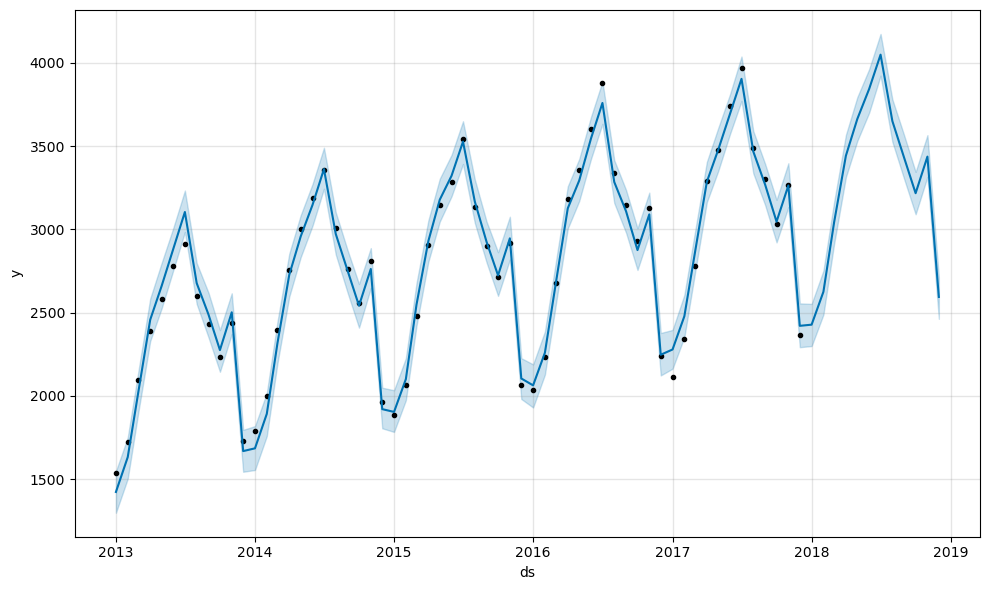

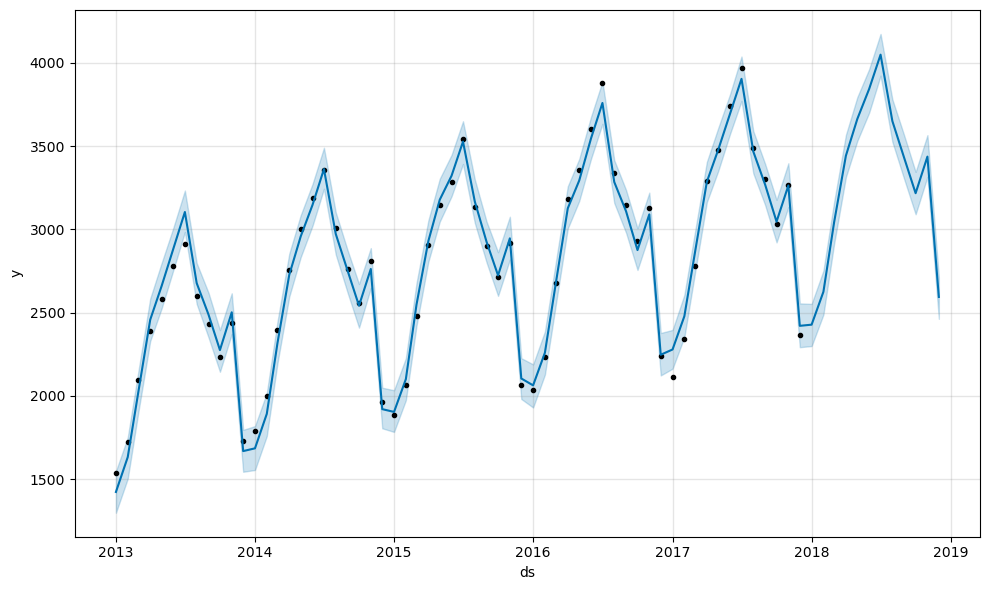

In [121]:
# Model for store 3
store_9 = store_9.rename(columns={'date': 'ds', 'store9_sales': 'y'})
s9_model = Prophet(interval_width=0.95)
s9_model.fit(store_9)

# generating 36 monthly timestamps ; here we are working with monthly data
future_dates9=s9_model.make_future_dataframe(periods=12, freq='MS')

# Getting the subset of output to the columns most relevant to forecasting
forecast9=s9_model.predict(future_dates9)
print("The forecasted values of Store 9 : \n",forecast9[['ds','yhat','yhat_lower','yhat_upper']].head())
# plot the results of forecasts for store 9
s9_model.plot(forecast9, uncertainty=True)

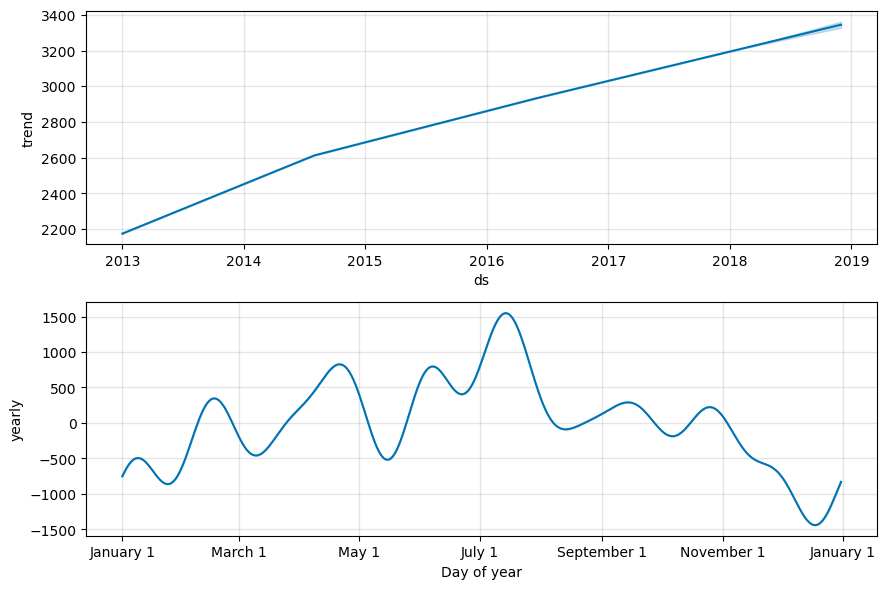

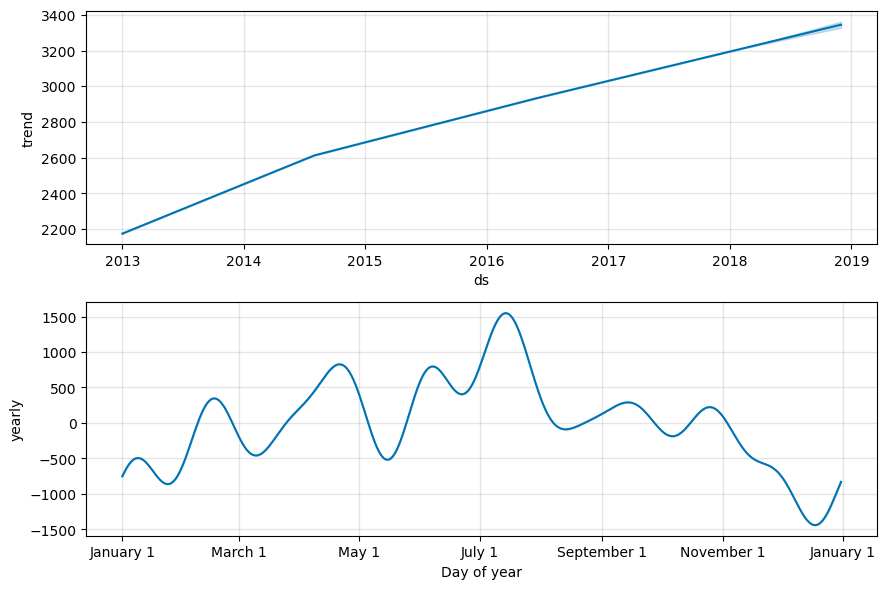

In [122]:
# Plotting the forecasted components of Store 9
s9_model.plot_components(forecast9)

In [123]:
# Getting cross validation values
s9_cv = cross_validation(s9_model,initial='730 days', period='180 days', horizon = '365 days',disable_tqdm=True)
s9_cv.head()


23:13:43 - cmdstanpy - INFO - Chain [1] start processing
23:14:03 - cmdstanpy - INFO - Chain [1] done processing
23:14:03 - cmdstanpy - INFO - Chain [1] start processing
23:14:03 - cmdstanpy - INFO - Chain [1] done processing
23:14:03 - cmdstanpy - INFO - Chain [1] start processing
23:14:04 - cmdstanpy - INFO - Chain [1] done processing
23:14:04 - cmdstanpy - INFO - Chain [1] start processing
23:14:05 - cmdstanpy - INFO - Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper            y     cutoff
0 2015-07-01  3444.819026  3430.595369  3458.692658  3541.548387 2015-06-10
1 2015-08-01  3015.875721  2971.504393  3059.765898  3132.000000 2015-06-10
2 2015-09-01  2735.478767  2649.679843  2815.773119  2901.666667 2015-06-10
3 2015-10-01  2568.775361  2438.281194  2690.853266  2712.580645 2015-06-10
4 2015-11-01  2947.986509  2775.043553  3122.188186  2918.466667 2015-06-10

In [124]:
# Saving the real values and forcasted values to a new dataframe
metric_s9=forecast9.set_index('ds')[['yhat']].join(store_9.set_index('ds').y).reset_index()
metric_s9.dropna(inplace=True)
# Mean squared error and R squared error
m_s9=mean_squared_error(metric_s9.y,metric_s9.yhat)
rm_s9= np.sqrt(m_s9)
print('The mean squared error for Store 9 :', m_s9)
print('The root mean squared error for Store 9 :', rm_s8)

The mean squared error for Store 9 : 4225.780435722923
The root mean squared error for Store 9 : 75.63905962949302


### Store 10

23:14:05 - cmdstanpy - INFO - Chain [1] start processing
23:14:05 - cmdstanpy - INFO - Chain [1] done processing


The forecasted values of Store 10 : 
           ds         yhat   yhat_lower   yhat_upper
0 2013-01-01  1511.250698  1369.194843  1640.255017
1 2013-02-01  1740.374162  1600.069024  1862.943171
2 2013-03-01  2171.365495  2031.382117  2320.076523
3 2013-04-01  2629.779832  2500.662902  2759.469666
4 2013-05-01  2843.023549  2720.288329  2968.675367


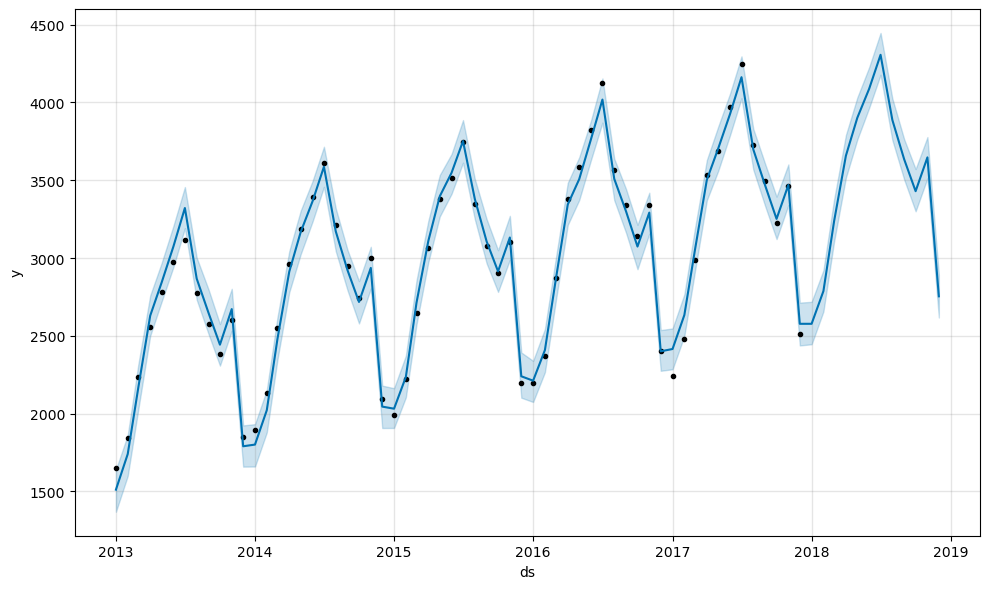

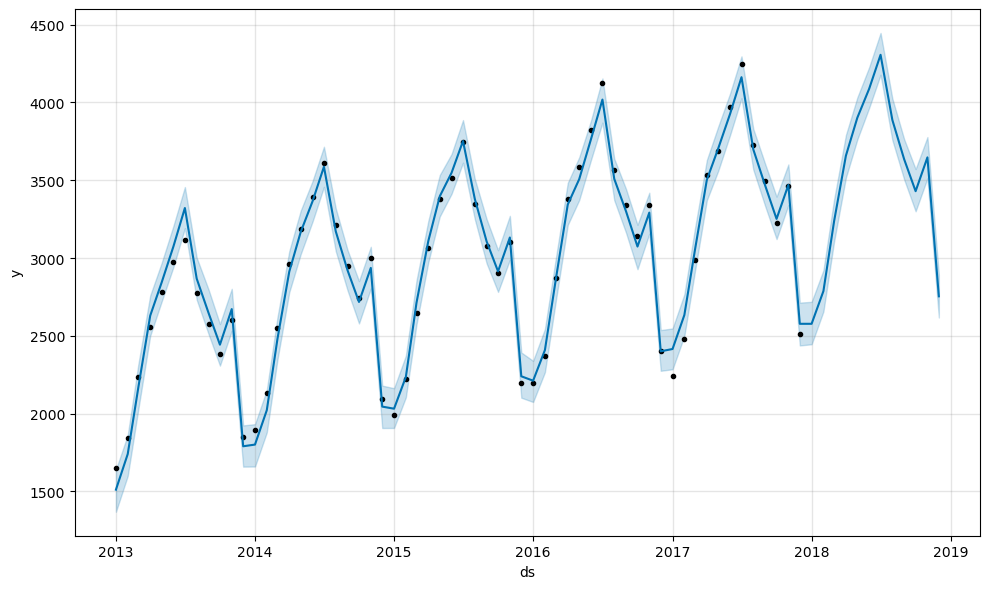

In [125]:
# Model for store 10
store_10 = store_10.rename(columns={'date': 'ds', 'store10_sales': 'y'})
s10_model = Prophet(interval_width=0.95)
s10_model.fit(store_10)

# generating 36 monthly timestamps ; here we are working with monthly data
future_dates10=s10_model.make_future_dataframe(periods=12, freq='MS')

# Getting the subset of output to the columns most relevant to forecasting
forecast10=s10_model.predict(future_dates10)
print("The forecasted values of Store 10 : \n",forecast10[['ds','yhat','yhat_lower','yhat_upper']].head())
# plot the results of forecasts for store 10
s10_model.plot(forecast10, uncertainty=True)

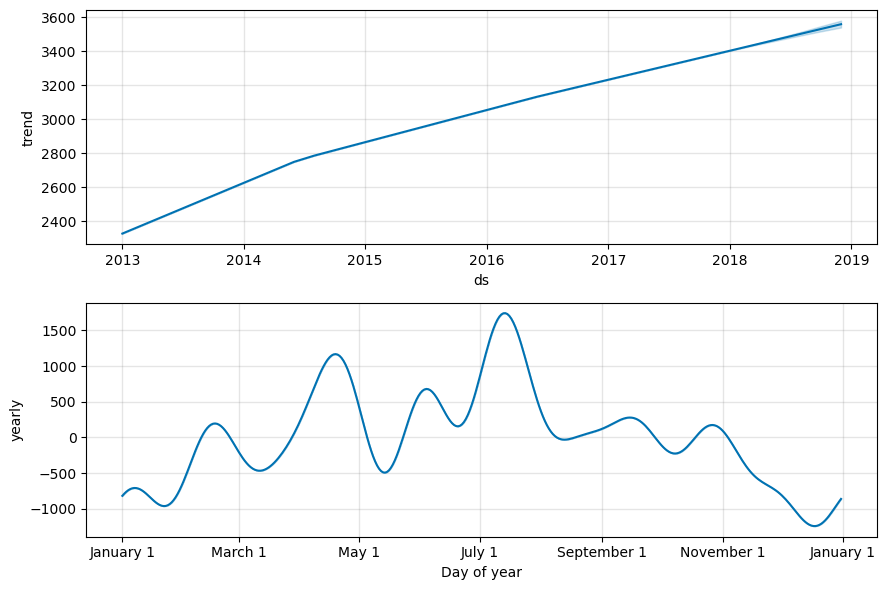

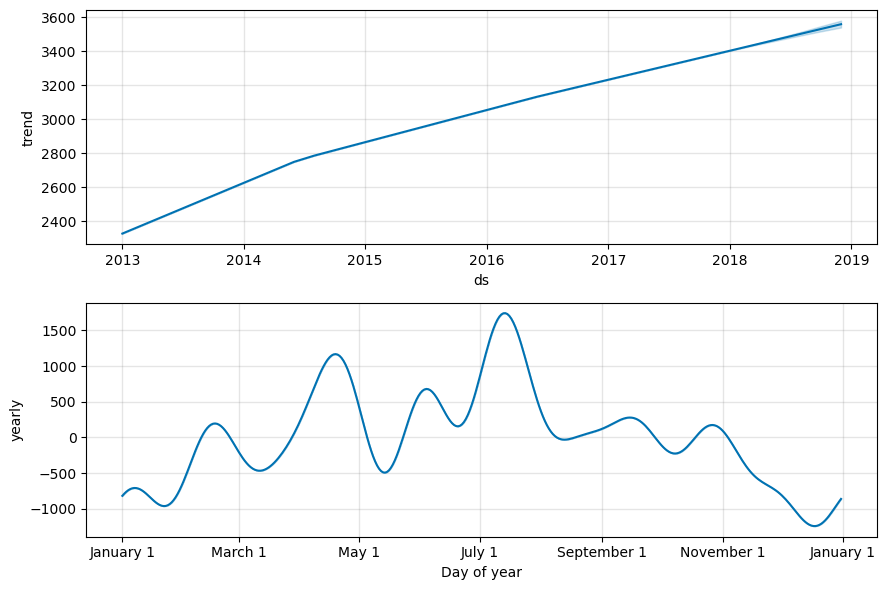

In [126]:
# Plotting the forecasted components of Store 10
s10_model.plot_components(forecast10)

In [127]:
# Getting cross validation values
s10_cv = cross_validation(s10_model,initial='730 days', period='180 days', horizon = '365 days',disable_tqdm=True)
s10_cv.head()


23:14:06 - cmdstanpy - INFO - Chain [1] start processing
23:14:23 - cmdstanpy - INFO - Chain [1] done processing
23:14:23 - cmdstanpy - INFO - Chain [1] start processing
23:14:23 - cmdstanpy - INFO - Chain [1] done processing
23:14:24 - cmdstanpy - INFO - Chain [1] start processing
23:14:24 - cmdstanpy - INFO - Chain [1] done processing
23:14:24 - cmdstanpy - INFO - Chain [1] start processing
23:14:25 - cmdstanpy - INFO - Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper            y     cutoff
0 2015-07-01  3878.078295  3824.527376  3930.790454  3743.548387 2015-06-10
1 2015-08-01  3438.590368  3270.313992  3596.613376  3344.903226 2015-06-10
2 2015-09-01  3086.241630  2796.709795  3384.112269  3074.600000 2015-06-10
3 2015-10-01  3042.289149  2584.614405  3504.158015  2904.838710 2015-06-10
4 2015-11-01  3498.610706  2832.581177  4134.935805  3102.433333 2015-06-10

In [128]:
# Saving the real values and forcasted values to a new dataframe
metric_s10=forecast10.set_index('ds')[['yhat']].join(store_10.set_index('ds').y).reset_index()
metric_s10.dropna(inplace=True)
# Mean squared error and R squared error
m_s10=mean_squared_error(metric_s10.y,metric_s10.yhat)
rm_s10=np.sqrt(m_s10)
print('The mean squared error for Store 10 :', m_s10)
print('The root mean squared error for Store 10 :', rm_s10)

The mean squared error for Store 10 : 4769.089822592592
The root mean squared error for Store 10 : 69.05859702160616


In [129]:
print("THE METRICS OF PROPHET MODELS FOR ALL STORES")
model_names=['Store 1','Store 2','Store 3','Store 4','Store 5','Store 6','Store 7','Store 8','Store 9','Store 10']
mean_error_P=[m_s1,m_s2,m_s3,m_s4,m_s5,m_s6,m_s7,m_s8,m_s9,m_s10]
rm_error_P=[rm_s1,rm_s2,rm_s3,rm_s4,rm_s5,rm_s6,rm_s7,rm_s8,rm_s9,rm_s10]
df = pd.DataFrame(list(zip(model_names,mean_error_P,rm_error_P)), columns = ['Model', 'MSE','RMSE'])
df

THE METRICS OF PROPHET MODELS FOR ALL STORES


Model          MSE       RMSE
0   Store 1  3287.220000  57.330000
1   Store 2  6692.464162  81.807482
2   Store 3  5037.582790  70.975931
3   Store 4  4120.014960  64.187343
4   Store 5  2315.793788  48.122695
5   Store 6  2303.690248  47.996773
6   Store 7  1901.748671  43.609043
7   Store 8  5721.267342  75.639060
8   Store 9  4225.780436  65.006003
9  Store 10  4769.089823  69.058597

### Comparing the forecast in sales of all stores

In [130]:
store1_names = ['store1_%s' % column for column in forecast1.columns]
store2_names = ['store2_%s' % column for column in forecast2.columns]
store3_names = ['store3_%s' % column for column in forecast3.columns]
store4_names = ['store4_%s' % column for column in forecast4.columns]
store5_names = ['store5_%s' % column for column in forecast5.columns]
store6_names = ['store6_%s' % column for column in forecast6.columns]
store7_names = ['store7_%s' % column for column in forecast7.columns]
store8_names = ['store8_%s' % column for column in forecast8.columns]
store9_names = ['store9_%s' % column for column in forecast9.columns]
store10_names = ['store10_%s' % column for column in forecast10.columns]

merge_forecast1 = forecast1.copy()
merge_forecast2 = forecast2.copy()
merge_forecast3 = forecast3.copy()
merge_forecast4 = forecast4.copy()
merge_forecast5 = forecast5.copy()
merge_forecast6 = forecast6.copy()
merge_forecast7 = forecast7.copy()
merge_forecast8 = forecast8.copy()
merge_forecast9 = forecast9.copy()
merge_forecast10 = forecast10.copy()

merge_forecast1.columns = store1_names
merge_forecast2.columns = store2_names
merge_forecast3.columns = store3_names
merge_forecast4.columns = store4_names
merge_forecast5.columns = store5_names
merge_forecast6.columns = store6_names
merge_forecast7.columns = store7_names
merge_forecast8.columns = store8_names
merge_forecast9.columns = store9_names
merge_forecast10.columns = store10_names

forecast=merge_forecast1.merge(merge_forecast2,how='inner',left_on='store1_ds',right_on='store2_ds').merge(merge_forecast3,how='inner',left_on='store2_ds',right_on='store3_ds').merge(merge_forecast4,how='inner',left_on='store3_ds',right_on='store4_ds').merge(merge_forecast5,how='inner',left_on='store4_ds',right_on='store5_ds').merge(merge_forecast6,how='inner',left_on='store5_ds',right_on='store6_ds').merge(merge_forecast7,how='inner',left_on='store6_ds',right_on='store7_ds').merge(merge_forecast8,how='inner',left_on='store7_ds',right_on='store8_ds').merge(merge_forecast9,how='inner',left_on='store8_ds',right_on='store9_ds').merge(merge_forecast10,how='inner',left_on='store9_ds',right_on='store10_ds')

forecast = forecast.rename(columns={'store1_ds': 'Date'}).drop(['store2_ds','store3_ds','store4_ds','store5_ds','store6_ds','store7_ds','store8_ds','store9_ds','store10_ds'], axis=1)
forecast.head()

Date  store1_trend  store1_yhat_lower  store1_yhat_upper  \
0 2013-01-01   1874.738336        1112.388584        1333.607266   
1 2013-02-01   1894.713796        1286.545657        1505.206592   
2 2013-03-01   1912.756148        1629.560358        1856.207721   
3 2013-04-01   1932.731609        2000.154804        2227.405245   
4 2013-05-01   1952.062700        2172.162960        2407.518811   

   store1_trend_lower  store1_trend_upper  store1_additive_terms  \
0         1874.738336         1874.738336            -652.274913   
1         1894.713796         1894.713796            -498.620843   
2         1912.756148         1912.756148            -167.560546   
3         1932.731609         1932.731609             181.634528   
4         1952.062700         1952.062700             338.710993   

   store1_additive_terms_lower  store1_additive_terms_upper  store1_yearly  \
0                  -652.274913                  -652.274913    -652.274913   
1                  -498.620843                  -498.620843    -498.620843   
2                  -167.560546                  -167.560546    -167.560546   
3                   181.634528                   181.634528     181.634528   
4                   338.710993                   338.710993     338.710993   

   ...  store10_additive_terms  store10_additive_terms_lower  \
0  ...             -816.924449                   -816.924449   
1  ...             -613.118089                   -613.118089   
2  ...             -204.993817                   -204.993817   
3  ...              228.103416                    228.103416   
4  ...              416.846709                    416.846709   

   store10_additive_terms_upper  store10_yearly  store10_yearly_lower  \
0                   -816.924449     -816.924449           -816.924449   
1                   -613.118089     -613.118089           -613.118089   
2                   -204.993817     -204.993817           -204.993817   
3                    228.103416      228.103416            228.103416   
4                    416.846709      416.846709            416.846709   

   store10_yearly_upper  store10_multiplicative_terms  \
0           -816.924449                           0.0   
1           -613.118089                           0.0   
2           -204.993817                           0.0   
3            228.103416                           0.0   
4            416.846709                           0.0   

   store10_multiplicative_terms_lower  store10_multiplicative_terms_upper  \
0                                 0.0                                 0.0   
1                                 0.0                                 0.0   
2                                 0.0                                 0.0   
3                                 0.0                                 0.0   
4                                 0.0                                 0.0   

   store10_yhat  
0   1511.250698  
1   1740.374162  
2   2171.365495  
3   2629.779832  
4   2843.023549  

[5 rows x 151 columns]

#### Visualization of trend and forecast

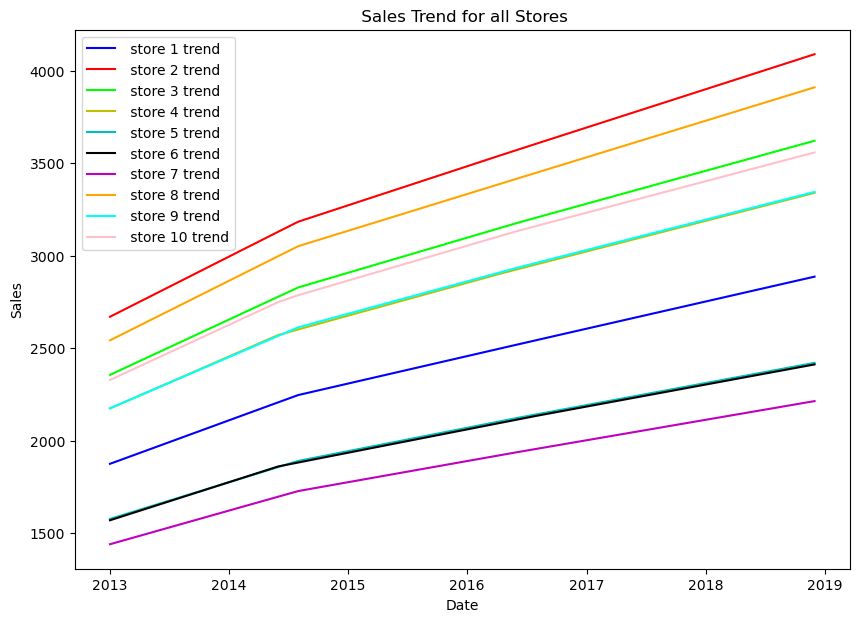

In [131]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['store1_trend'], 'b-',label=' store 1 trend')
plt.plot(forecast['Date'], forecast['store2_trend'], 'r-',label=' store 2 trend')
plt.plot(forecast['Date'], forecast['store3_trend'], 'lime',label=' store 3 trend')
plt.plot(forecast['Date'], forecast['store4_trend'], 'y-',label=' store 4 trend')
plt.plot(forecast['Date'], forecast['store5_trend'], 'c-',label=' store 5 trend')
plt.plot(forecast['Date'], forecast['store6_trend'], 'k-',label=' store 6 trend')
plt.plot(forecast['Date'], forecast['store7_trend'], 'm',label=' store 7 trend')
plt.plot(forecast['Date'], forecast['store8_trend'], 'orange',label=' store 8 trend')
plt.plot(forecast['Date'], forecast['store9_trend'], 'aqua',label=' store 9 trend')
plt.plot(forecast['Date'], forecast['store10_trend'], 'pink',label=' store 10 trend')
plt.legend(loc='best'); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title(' Sales Trend for all Stores');

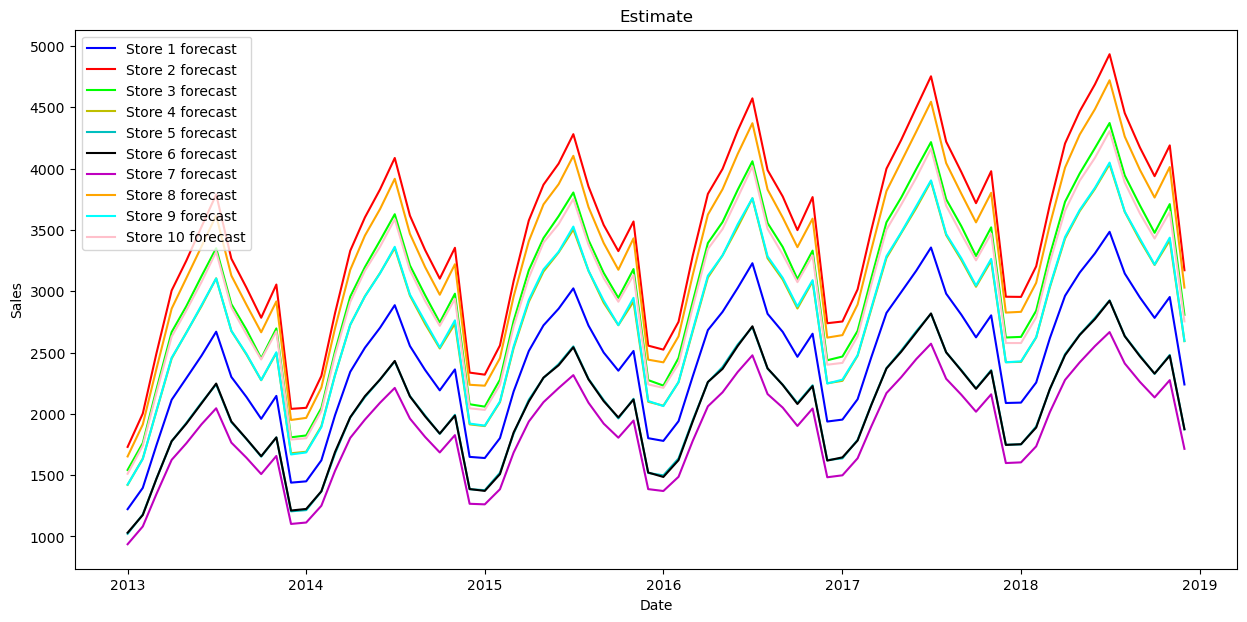

In [132]:
plt.figure(figsize=(15, 7))
plt.plot(forecast['Date'], forecast['store1_yhat'], 'b-',label='Store 1 forecast')
plt.plot(forecast['Date'], forecast['store2_yhat'], 'r-',label='Store 2 forecast')
plt.plot(forecast['Date'], forecast['store3_yhat'], 'lime',label='Store 3 forecast')
plt.plot(forecast['Date'], forecast['store4_yhat'], 'y-',label='Store 4 forecast')
plt.plot(forecast['Date'], forecast['store5_yhat'], 'c-',label='Store 5 forecast')
plt.plot(forecast['Date'], forecast['store6_yhat'], 'k-',label='Store 6 forecast')
plt.plot(forecast['Date'], forecast['store7_yhat'], 'm',label='Store 7 forecast')
plt.plot(forecast['Date'], forecast['store8_yhat'], 'orange',label='Store 8 forecast')
plt.plot(forecast['Date'], forecast['store9_yhat'], 'aqua',label='Store 9 forecast')
plt.plot(forecast['Date'], forecast['store10_yhat'], 'pink',label='Store 10 forecast')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Estimate');

After comapring different merics values for all models, it's clear that the SAXIMAX models have better performance than Prophet models.